<a href="https://colab.research.google.com/github/Astro-CMalhas/Malhas-et-al.-in-prep/blob/main/Paper_Plotter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*italicized text*# New Section

In [ ]:
def errorpropdiv(a,b,errA,errB):
    totalerr = (a/b)*(np.sqrt(((errA**2)/(a**2))+((errB**2)/b)))
    return totalerr
print ("error on Si EW:", errorpropdiv(1.483,.909,.125,.15) )

error on Si EW: 0.2911923798100022


# Importing & constants


In [ ]:
from google.colab import drive
import os
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from scipy.integrate import quad
from scipy import integrate as intg
import sympy as sp
from scipy import stats
from scipy.interpolate import UnivariateSpline
import pandas as pd
from scipy.stats import linregress
from scipy.stats import norm
import os
import seaborn as sns
from matplotlib import pyplot as plt, patches
#!pip statistics
import statistics
histplot = 0
plt.rcParams['figure.dpi'] = 75
c= 2.99e5
mksize = 34
T = .9
x0= 1393.76
x1= 1190.416
x2= 1193.28
x3= 1304.37
x4= 1334.532
x5= 1402.770
x6= 1260.42
x7=1302.168
x8=1206.51
x9=1121.967
x10=1125.442
x11=1143.220
x12=1144.926

folder = os.path.join('/content/drive/MyDrive/CSV_for_gal')
#drive.mount('/content/drive', force_remount=True)
drive.mount('/content/drive', force_remount=True)
images_dir = '/content/drive/MyDrive/Project'

Mounted at /content/drive


# Just Functions


In [ ]:
def QuickLoader (Gal):
    wave1 = pd.DataFrame(Gal, columns= ['WAVE'])
    err1 = pd.DataFrame(Gal, columns= ['ERR'])
    flux1 = pd.DataFrame(Gal, columns= ['FLUX'])
    cont1 = pd.DataFrame(Gal, columns= ['CONT'])
    wave01 = pd.DataFrame.to_numpy(wave1)
    error01 = pd.DataFrame.to_numpy(err1)
    flux01 = pd.DataFrame.to_numpy(flux1)
    cont01 = pd.DataFrame.to_numpy(cont1)
    error02 = ((error01.flatten()))
    flux = ((flux01.flatten()))
    wave = ((wave01.flatten()))
    cont = ((cont01.flatten()))
    error = error02/cont
    Gal_master = [flux,wave,cont,error]
    return Gal_master
def Tablemaker(GalNames,ListData):
  for i in range (len(GalNames)):
    FocusLine = ListData[i]
    print (GalNames[i], "&" ,*FocusLine)
#####Confidence Interval Stuff
def plot_ci_manual(t, s_err, n, x, x2, y2, ax=None):
    """Return an axes of confidence bands using a simple approach.

    Notes
    -----
    .. math:: \left| \: \hat{\mu}_{y|x0} - \mu_{y|x0} \: \right| \; \leq \; T_{n-2}^{.975} \; \hat{\sigma} \; \sqrt{\frac{1}{n}+\frac{(x_0-\bar{x})^2}{\sum_{i=1}^n{(x_i-\bar{x})^2}}}
    .. math:: \hat{\sigma} = \sqrt{\sum_{i=1}^n{\frac{(y_i-\hat{y})^2}{n-2}}}

    References
    ----------
    .. [1] M. Duarte.  "Curve fitting," Jupyter Notebook.
       http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/CurveFitting.ipynb

    """
    if ax is None:
        ax = plt.gca()

    ci = t * s_err * np.sqrt(1/n + (x2 - np.mean(x))**2 / np.sum((x - np.mean(x))**2))
    ax1.fill_between(x2, y2 + ci, y2 - ci, color="#b9cfe7", edgecolor="black")

    return ax
def equation(a, b):
    """Return a 1D polynomial."""
    return np.polyval(a, b)

def MC_Spline(transition,vrange,splinerange,splineduty):
    checkspline = splineduty
    v90_out = np.empty(0)
    vcen_out = np.empty(0)
    ew_out = np.empty(0)
    allresults = np.empty(0)
    print (splineduty)
    #ones
    for testtrial in range(trialcount):
        testerror1 = np.random.normal(error_MC,error, size=np.size(error))
        fluxMClooped = FC+testerror1
        cutoff = splinerange
        cont_region = ((wave > cutoff[0]) & (wave < cutoff[1])) | ((wave > cutoff[2]) & (wave < cutoff[3]))
        spline_med= UnivariateSpline(wave[cont_region], fluxMClooped[cont_region])
        #if splineduty ==1:
        spline_fit= spline_med(wave)
        #elif splineduty == 0:
          #The 3110 is just for NGC6090, for some reasont he len(error_mc wasnt working, probably cause I have it poorly defined somewhere else
          #You might want to more properly define it for a larger data set, I dont have time ):
          #spline_fit= np.ones(3110, dtype=int)
        #spline_fit= np.ones(trialcount, dtype=int)
        flux_cont = fluxMClooped/spline_fit
        #error_cont = error/spline_fit
        #flux_MC = flux_cont(splinerange,fluxMClooped)
        testout = v90calc(wave,flux_cont,transition,vrange)
        v90_out = np.append(v90_out,testout[0])
        vcen_out = np.append(vcen_out,testout[1])
        ew_out = np.append(ew_out,testout[2])
    truev90 = v90_out.mean()
    v90_err = (v90_out.std())
    truevcen = vcen_out.mean()
    vcen_err = (vcen_out.std())
    trueew = ew_out.mean()
    ew_err = (ew_out.std())
    allout = truev90,v90_err,truevcen,vcen_err,trueew,ew_err
    if histplot ==1:
      fig = plt.figure(figsize=(4,2))
      fig.suptitle('Histograms', fontsize=12, y = 1)
      print (v90_out)
      ax1=fig.add_subplot(1,2,1)
      ax1.hist(v90_out, bins=7)
      plt.xlabel('V-90', fontsize= 12)
      #ax1.title ("V90 Hist")
      ax2=fig.add_subplot(1,2,2)
      ax2.hist(vcen_out, bins=7)
      plt.xlabel('Vcen', fontsize= 12)
      #ax2.title ("Vcen Hist")
      plt.show()
    return allout



#def MC_Spline(transition,vrange,splinerange,splineduty):
#   checkspline = splineduty
#   v90_out = np.empty(0)
#   vcen_out = np.empty(0)
#   ew_out = np.empty(0)
#   allresults = np.empty(0)
#   print (splineduty)
#
#   cutoff = splinerange
#   cont_region = ((wave > cutoff[0]) & (wave < cutoff[1])) | ((wave > cutoff[2]) & (wave < cutoff[3]))
#   #below We do the spline fitting over the specified region for the flux/cont
#
#   #below we do the spline fitting over the error in the same region as above.
#
#   #print (error_splined)
#   #ones
#   for testtrial in range(trialcount):
#       testerror1 = np.random.normal(error_MC,error, size=np.size(error))
#
#
#       spline_med_err= UnivariateSpline(wave[cont_region], testerror1[cont_region])
#       spline_fit_err= spline_med_err(wave)
#       error_splined = (error/((spline_fit_err)))
#
#
#
#       #FC_err = FC+error_splined
#       spline_med= UnivariateSpline(wave[cont_region], FC[cont_region])
#       spline_fit= spline_med(wave)
#       FC_splined = (FC/spline_fit)
#
#       FC_err =FC_splined +error_splined
#
#
#       fluxMClooped = FC_err
#       #print ("mean before error:", np.mean(FC_splined), "after error:", np.mean(fluxMClooped))
#       testout = v90calc(wave,fluxMClooped,transition,vrange)
#       v90_out = np.append(v90_out,testout[0])
#        vcen_out = np.append(vcen_out,testout[1])
#        ew_out = np.append(ew_out,testout[2])
#    truev90 = v90_out.mean()
#    v90_err = (v90_out.std())
#    truevcen = vcen_out.mean()
#    vcen_err = (vcen_out.std())
#    trueew = ew_out.mean()
#    ew_err = (ew_out.std())
#    allout = truev90,v90_err,truevcen,vcen_err,trueew,ew_err
#    if histplot ==1:
#      fig = plt.figure(figsize=(4,2))
#      fig.suptitle('Histograms', fontsize=12, y = 1)
#      print (v90_out)
#      ax1=fig.add_subplot(1,2,1)
#      ax1.hist(v90_out, bins=7)
#      plt.xlabel('V-90', fontsize= 12)
#      #ax1.title ("V90 Hist")
#      ax2=fig.add_subplot(1,2,2)
#      ax2.hist(vcen_out, bins=7)
#      plt.xlabel('Vcen', fontsize= 12)
#      #ax2.title ("Vcen Hist")
#      plt.show()
#    return allout
def read_text_file(file_path):
    with open(file_path, 'r') as f:
        collapsevariable = 5
def splinefit(cutoff):
    cont_region = ((wave > cutoff[0]) & (wave < cutoff[1])) | ((wave > cutoff[2]) & (wave < cutoff[3]))
    spline_med= UnivariateSpline(wave[cont_region], FC[cont_region])
    spline_fit= spline_med(wave)
    flux_cont = FC/spline_fit
    return flux_cont
def errorpropdiv(a,b,errA,errB):
    totalerr = (a/b)*(np.sqrt(((errA**2)/(a**2))+((errB**2)/b)))
    rounderr = np.round(totalerr,decimals = 3)
    calcedval = (a/b)
    strval = (np.round(calcedval,decimals = 3))
    strval2 = str(strval)
    strval3 = str(rounderr)
    strval4 = strval2+u"\u00B1"+strval3
    return strval4
def errorpropSub(a,b,errA,errB):
    totalerr = (np.sqrt(((a**2))+((errB**2))))
    rounderr = np.round(totalerr,decimals = 3)
    calcedval = (a-b)
    strval = (np.round(calcedval,decimals = 3))
    strval2 = str(strval)
    strval3 = str(rounderr)
    strval4 = strval2+u"\u00B1"+strval3
    return strval4
def v90calc(wave,flux,line,vrange):
    vrange_upper = vrange[0]
    vrange_lower= vrange[1]
    velocity= c*(wave-line)/line

    velocityrange = (flux>T) & (velocity>vrange_lower)  & (velocity<vrange_upper) & (velocity < -70)
    v90array= (velocity[velocityrange])
    v90 = v90array.max()

    Wvelocityrange = ((flux<T) & (velocity<vrange_upper) & (velocity>vrange_lower))
    wvel=np.sum((1-flux[Wvelocityrange])*(velocity[Wvelocityrange]))/(np.sum(1-flux[Wvelocityrange]))

    EWvelocityrange = ((flux<T) & (velocity<vrange_upper) & (velocity>vrange_lower))
    #print (wave[EWvelocityrange])
    equivelentwidth= np.trapz(1-flux[EWvelocityrange],wave[EWvelocityrange],
                              (wave[EWvelocityrange][0],wave[EWvelocityrange][-1]))
    Allval = [v90,wvel,equivelentwidth]
    return Allval

def TrendGetter(m1,m2,order):

  deltaslope = m1/m2
  print (order[12:17])
  print ("Original Fit/Combined Data Fit:", deltaslope)
  return deltaslope

def TrendGetter2(m1,m2):

  deltaslope = m1/m2
  #print (order[12:17])
  print (deltaslope,"&")
  return deltaslope

def TrendGetter5(GalParam,OutflowParam,MyGalParam,MyOutParam):
  for i in range (len(transorder)):
          addedGalParam = np.append(GalParam[i],MyGalParam)
          addedOutflowParam= np.append( OutflowParam[i],MyOutParam[i])


          TauInital,P_Initial= stats.kendalltau(GalParam[i],OutflowParam[i])
          TauCombined,P_Combined= stats.kendalltau(addedGalParam,addedOutflowParam)
          #deltaP = P_Initial-P_Combined
          Pvalues = (P_Initial,P_Combined)

          #zscore = stats.norm.ppf(Pvalues)


          zscore2 =   stats.norm.ppf(P_Initial)
          zscore3 =  stats.norm.ppf(P_Combined)

          zscore = (zscore2,zscore3)
          #print (zscore[0],zscore[1])
          #print (zscore2,zscore3)
          deltaz = (zscore[0]-zscore[1])
          datacomb2= (zscore, zscore,deltaz)
          #datacomb = ( SFRV90Relations[1],SFRV90Relations[3],SFRV90Relations[4],SFRV90Relations[0],SFRV90Relations[2],SFRV90Relations[5])
          #print (zscore)
          print( transorder[i],"&",zscore[0],"&",zscore[1])
          #print (datacomb)
  return datacomb2
def TrendGetter3(GalParam,OutflowParam,MyGalParam,MyOutParam):
  fullcombine = []
  for i in range (len(transorder)):
          addedGalParam = np.append(GalParam[i],MyGalParam)
          addedOutflowParam= np.append( OutflowParam[i],MyOutParam[i])
          TauInital,P_Initial= stats.kendalltau(GalParam[i],OutflowParam[i])
          TauCombined,P_Combined= stats.kendalltau(addedGalParam,addedOutflowParam)
          #deltaP = P_Initial-P_Combined
          Pvalues = (P_Initial,P_Combined)
          zscoreMassive =   stats.norm.ppf(P_Initial)
          zscoreCombined=  stats.norm.ppf(P_Combined)
          #deltaz = (zscore[0]-zscore[1])
          datacomb2= (zscoreMassive, zscoreCombined)

  return datacomb2
def TrendGetter4(GalParam,OutflowParam,MyGalParam,MyOutParam):
  fullcombine = []
  for i in range (len(transorder)):

          addedGalParam = np.append(GalParam[i],MyGalParam)
          addedOutflowParam= np.append( OutflowParam[i],MyOutParam[i])


          TauInital,P_Initial= stats.kendalltau(GalParam[i],OutflowParam[i])
          TauCombined,P_Combined= stats.kendalltau(addedGalParam,addedOutflowParam)




          Samplevariable = (P_Initial,P_Combined)
          #zscore = stats.norm.cdf(Samplevariable)
          zscore2 =   stats.norm.ppf(P_Initial)
          zscore3 =  stats.norm.ppf(P_Combined)

          zscore = (zscore2,zscore3)
          deltatau = TauInital-TauCombined
          deltaP = P_Initial-P_Combined



          SigmaInital = zscore2
          SigmaComb=zscore3
          datacomb = (TauInital, P_Initial,TauCombined,P_Combined,deltaP,deltatau,np.abs(SigmaInital),np.abs(SigmaComb))
          fullcombine.append(datacomb)
          #datacomb = ( SFRV90Relations[1],SFRV90Relations[3],SFRV90Relations[4],SFRV90Relations[0],SFRV90Relations[2],SFRV90Relations[5])
          #print (zscore)
         # print( transorder[i],"&",P_Initial,"&",P_Combined,"&",deltaP,"&",TauInital,"&",TauCombined,"&",deltatau)

          #print( transorder[i],"&",P_Initial,"&",P_Combined,"&",SigmaInital,"&",SigmaComb)
          #print (datacomb)

  return fullcombine

def TrendGetter6(GalParam,OutflowParam,MyGalParam,MyOutParam):
  for i in range (len(transorder)):

          #From the 4 given arrays add the newly calculated values to the old data.
          #galparam is the host galaxy paramater while outflowparam is the outflow property (v90 or W) we are examining
          addedGalParam = np.append(GalParam[i],MyGalParam)
          addedOutflowParam= np.append( OutflowParam[i],MyOutParam[i])

          #Below we generate fits that give us the original slope and original intercept from the high-mass sample then get the slope of the combined data.
          #Slopes
          origslope,origint=np.polyfit(GalParam[i], OutflowParam[i], 1)
          newslope,newint = np.polyfit(addedGalParam, addedOutflowParam, 1)
          deltaslope = origslope-newslope

          #datacomb = ( SFRV90Relations[1],SFRV90Relations[3],SFRV90Relations[4],SFRV90Relations[0],SFRV90Relations[2],SFRV90Relations[5])
          #print (zscore)(format(OrigSigma, ".3f"))
          print( transorder[i],"&",(format(origslope, ".3f")),"&",(format(origint, ".3f")),"&",(format(newslope, ".3f")),"&",(format(newint, ".3f")), "&", (format(deltaslope, ".3f")))
          #print (datacomb)




In [ ]:
j =1
k=2
for i in range(3):
  j +=k
  k += j
  print (k)

5
13
34


# Loading in Values


In [ ]:
#colors
#right now
#myGalColor = "#DE85FF"
#JohnGalColor = "#FF595E"
transorder = ["Si IV", "Si III", "Si II","OI"]

#test some other colors
#replationline = '#000000'
#secrelationline = '#91ACCA'
#myGalColor = "#456990"
#JohnGalColor = "#A52422"

replationline = '#000000'
secrelationline = '#1C7293'
myGalColor = "#044FC8"
JohnGalColor = "#A52422"
arrowcolor ='#96C9DC'
topedgecolor = '#19535F'
bottomarrowcolor = '#AFD5AA'
bottomedgecolor= '#04773B'

toplinecolor = '#19535F'

In [ ]:
mydata_massarr = [7.34,7.2,7.81,8.99,7.73]
mydata_sfrTRUELIN = []
mydata_sfrarr = [-0.69897,-0.744727494896694,-0.3372421683184259,-.42,-.79588]
small_line = ([1393.76,"Si IV 1393.755",.513],
              [1334.532,"C II 1334.532",.129],[1302.168,"O I 1302.168",5.2e-2],
            [1206.51,"Si III 1206.51",1.67],[1304.37,"Si II 1304.37",.797])


In [ ]:

SBS0926 =pd.read_csv ('/content/drive/MyDrive/CSV_for_gal/SBS0926+606A.csv')
CG274= pd.read_csv ('/content/drive/MyDrive/CSV_for_gal/CG274.csv')
IC2779 = pd.read_csv ('/content/drive/MyDrive/CSV_for_gal/IC2779.csv')
Shoc22 = pd.read_csv ('/content/drive/MyDrive/CSV_for_gal/Shoc22.csv')
Ask208 = pd.read_csv ('/content/drive/MyDrive/CSV_for_gal/ASK208.csv')
NGC6090 = pd.read_csv ('/content/drive/MyDrive/CSV_for_gal/NGC6090.csv')
AllGal = [SBS0926,CG274,IC2779, Shoc22, Ask208]


SBS0926_master = QuickLoader(SBS0926)
CG274_master = QuickLoader(CG274)
IC2779_master = QuickLoader(IC2779)
Shoc22_master = QuickLoader(Shoc22)
Ask208_master = QuickLoader(Ask208)
NGC6090_master = QuickLoader(NGC6090)
#print (Shoc22_master )
allfiles = ( SBS0926_master,CG274_master, IC2779_master,Shoc22_master,Ask208_master, NGC6090_master)


In [ ]:
v90IVerr= np.genfromtxt("/content/drive/MyDrive/CSV_for_gal/v90IVerr.txt",delimiter='\t')
v90IVerr= np.genfromtxt("/content/drive/MyDrive/CSV_for_gal/v90IVerr.txt",delimiter='\t')
v90IIIerr= np.genfromtxt("/content/drive/MyDrive/CSV_for_gal/v90IIIerr.txt",delimiter='\t')
v90IIerr= np.genfromtxt("/content/drive/MyDrive/CSV_for_gal/v90IIerr.txt",delimiter='\t')
v90Ierr= np.genfromtxt("/content/drive/MyDrive/CSV_for_gal/v90Ierr.txt",delimiter='\t')
johnv90OI= np.genfromtxt("/content/drive/MyDrive/CSV_for_gal/v90O.txt",delimiter='\t')
sfrOI=np.genfromtxt("/content/drive/MyDrive/CSV_for_gal/JohnSFRO.txt",delimiter='\t')
Mass_OI=np.genfromtxt("/content/drive/MyDrive/CSV_for_gal/JohnmassO.txt",delimiter='\t')
johnvcen= np.genfromtxt("/content/drive/MyDrive/CSV_for_gal/columndata.txt",delimiter='\t')
johnv90siIII= np.genfromtxt("/content/drive/MyDrive/CSV_for_gal/v901.txt",delimiter='\t')
sfrsiIII=np.genfromtxt("/content/drive/MyDrive/CSV_for_gal/sfr2.txt",delimiter='\t')
Mass_siIII=np.genfromtxt("/content/drive/MyDrive/CSV_for_gal/JohnmasssiIII.txt",delimiter='\t')
johnv90siII= np.genfromtxt("/content/drive/MyDrive/CSV_for_gal/v90siII.txt",delimiter='\t')
sfrsiII=np.genfromtxt("/content/drive/MyDrive/CSV_for_gal/JohnSFRsiII.txt",delimiter='\t')
Mass_siII=np.genfromtxt("/content/drive/MyDrive/CSV_for_gal/JohnmassSiII.txt",delimiter='\t')
johnv90siIV= np.genfromtxt("/content/drive/MyDrive/CSV_for_gal/v90SiIV.txt",delimiter='\t')
sfrsiIV=np.genfromtxt("/content/drive/MyDrive/CSV_for_gal/JohnSFRsiIV.txt",delimiter='\t')
Mass_siIV=np.genfromtxt("/content/drive/MyDrive/CSV_for_gal/JohnmasssiIV.txt",delimiter='\t')
johnv90= np.genfromtxt("/content/drive/MyDrive/CSV_for_gal/v901.txt",delimiter='\t')
johnEWSiII= np.genfromtxt("/content/drive/MyDrive/CSV_for_gal/EWsi2.txt",delimiter='\t')
johnEWO= np.genfromtxt("/content/drive/MyDrive/CSV_for_gal/EWO.txt",delimiter='\t')
johnEWSiIII= np.genfromtxt("/content/drive/MyDrive/CSV_for_gal/EWsi3.txt",delimiter='\t')
johnEWSiIV= np.genfromtxt("/content/drive/MyDrive/CSV_for_gal/EWsi4.txt",delimiter='\t')
sfr=np.genfromtxt("/content/drive/MyDrive/CSV_for_gal/sfr2.txt",delimiter='\t')
siIVerr= np.genfromtxt("/content/drive/MyDrive/CSV_for_gal/si_IVerror.txt",delimiter='\t')
siIIIerr= np.genfromtxt("/content/drive/MyDrive/CSV_for_gal/si-IIIerror.txt",delimiter='\t')
siIIerr= np.genfromtxt("/content/drive/MyDrive/CSV_for_gal/Si_IIerror.txt",delimiter='\t')
O_err= np.genfromtxt("/content/drive/MyDrive/CSV_for_gal/Oerror.txt",delimiter='\t')

logsfr= np.log10(([sfr][0]))
negv90= (np.log10((-1)*([johnv90][0])))
logsfr_siIII= np.log10(([sfrsiIII][0]))
negv90_siIII= (np.log10((-1)*([johnv90siIII][0])))
logsfr_siII= np.log10(([sfrsiII][0]))
negv90_siII= (np.log10((-1)*([johnv90siII][0])))
logsfr_siIV= np.log10(([sfrsiIV][0]))
negv90_siIV= (np.log10((-1)*([johnv90siIV][0])))
logsfr_O= np.log10(([sfrOI][0]))
negv90_O= (np.log10((-1)*([johnv90OI][0])))

logIVerr = (np.absolute((1/np.log(10))*(([v90IVerr][0])/([johnv90siIV][0]))))
logIIerr = (np.absolute((1/np.log(10))*(([v90IIerr][0])/([johnv90siII][0]))))
logIerr =  (np.absolute((1/np.log(10))*(([v90Ierr][0])/([johnv90OI][0]))))
logIIIerr =  (((1/np.log(10))*((([v90IIIerr][0])/([johnv90siIII][0])))))
errtest = (np.absolute(([v90IIIerr][0])/([johnv90siIII][0])/(np.log(10))))

johnmasstot = (10.5,10.9,10.7,10.6,10.1,10.6,10.5,9.9,10,10.9,7.2,10.6,10.9,9,9.2,9.1,8.5,8.5,6.9,9.5,9.9,9.5,8.8,10,9,10.3,10.4,10.3,10.6,10.1,10.3,10.1,10.7,9.8,9.3,10.6,9,10.9,9.5,10.6,10.9,9.4,9.5)
johnsfrtot = (13.59,50.83,25.15,13.37,26.45,71.15,60.4,22.07,20.28,136.82,0.02,3.65,90.64,0.13,0.24,0.34,0.48,0.48,0.02,3.72,0.99,5.12,0.23,2.55,0.28,9.17,11.82,28.63,46.6,12.21,12.97,61.07,58.47,13.03,3.6,20.73,0.86,16.71,5.69,41.08,21.27,26.2,22.4)
truejohnsfr = (np.log10(johnsfrtot))

johndata_v90 = [negv90_siIV,negv90_siIII,negv90_siII,negv90_O]
johndata_sfr = [logsfr_siIV,logsfr_siIII,logsfr_siII,logsfr_O]
johndata_mass = [Mass_siIV,Mass_siIII,Mass_siII,Mass_OI]
johndata_v90err = [logIVerr,logIIIerr,logIIerr,logIerr]
johndata_EW = [johnEWSiIV,johnEWSiIII,johnEWSiII,johnEWO]
johndata_EWerr = [siIVerr,siIIIerr,siIIerr,O_err]


In [ ]:
#print (johndata_sfr)



```
# This is formatted as code
```

# Plotting


In [ ]:
axis_fontsz = 24
ticksz = 18
legsize = 14
txt_size = 15
#plt.style.use(['classic'])
plt.rcParams['axes.facecolor']='white'
plt.rcParams['axes.edgecolor']='black'
plt.rcParams['figure.facecolor']='white'
#!jt -t solarized1
np.set_printoptions(threshold=np.inf)
toplotname = ('SBS0926+606A [M$_{\odot}$] = 7.2','CG274 [M$_{\odot}$] = 7.34','IC2779 [M$_{\odot}$] = 7.73','Shoc22 [M$_{\odot}$] = 7.81','ASK208 [M$_{\odot}$] = 8.99', 'NGC 6090 [M$_{\odot}$] = 10.7')


# SBS 0926


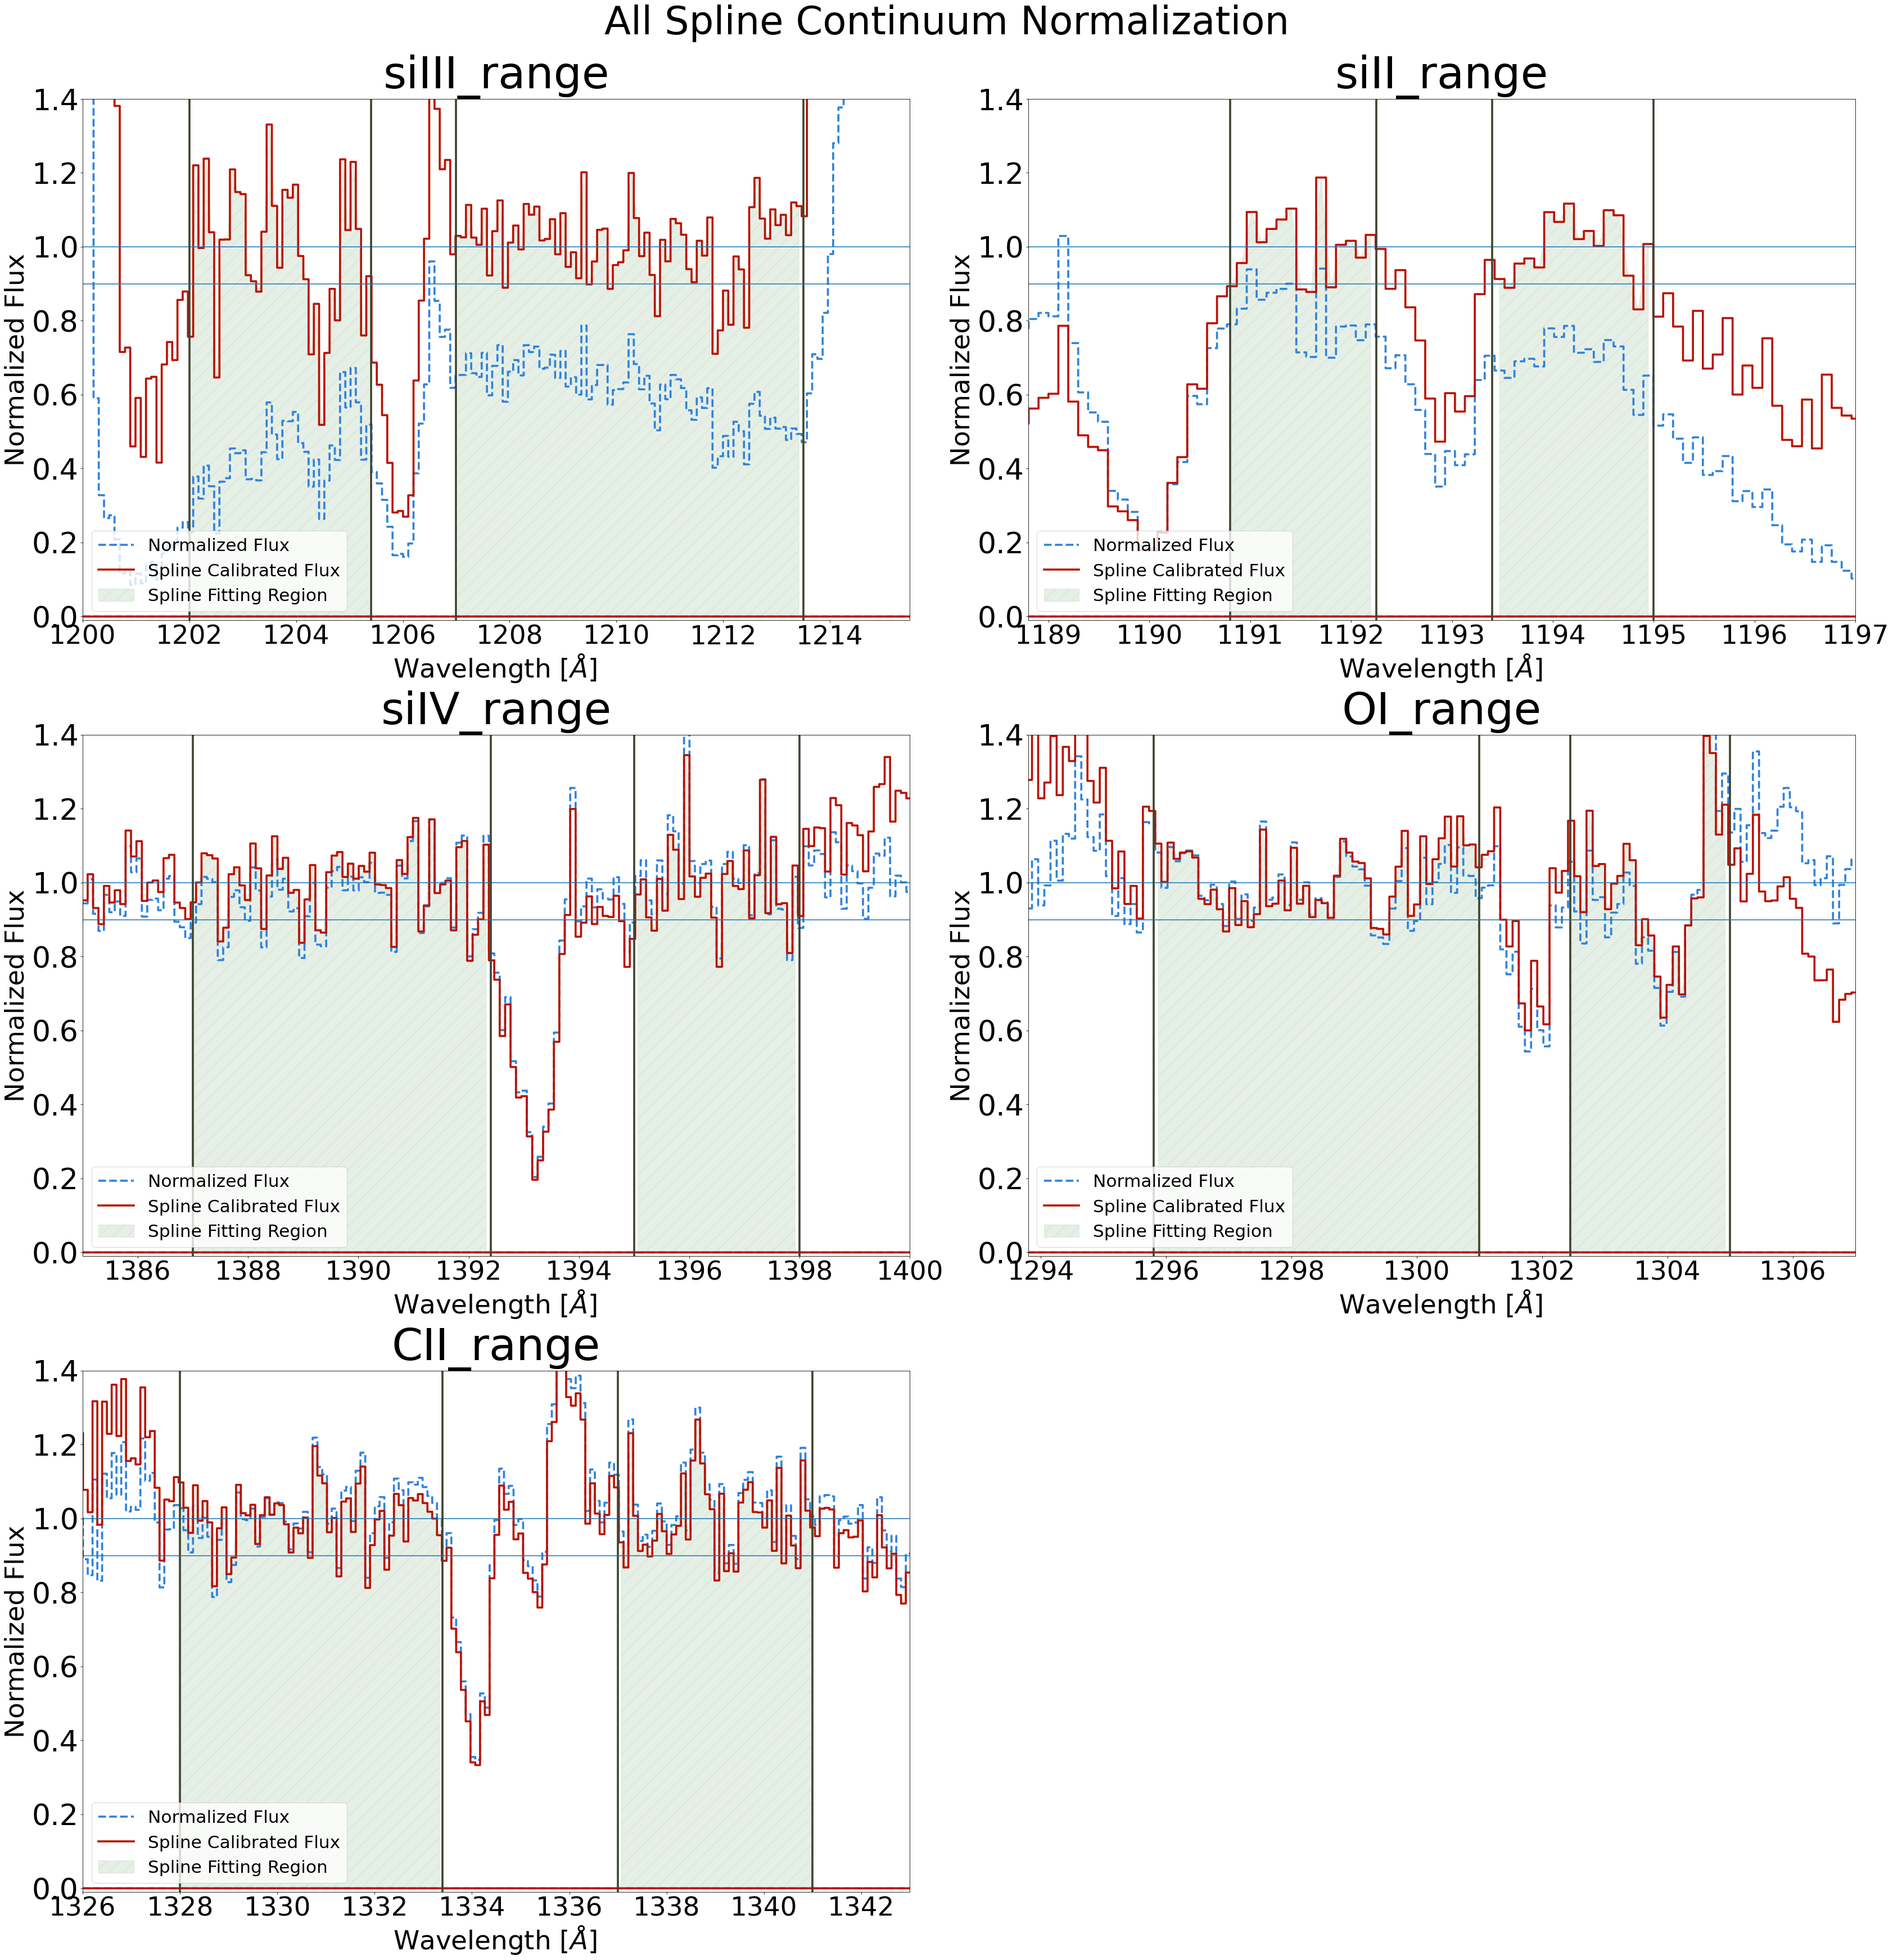

In [ ]:
#def QuickCalc(Master_file):
#Master goes in the order of flux,wave,cont,error

#SBS
[error,flux,wave,cont ]= [SBS0926_master[3],SBS0926_master[0],SBS0926_master[1],SBS0926_master[2]]
[SBS0926_SiIIIrange,SBS0926_SiIIrange,SBS0926_SiIVrange,SBS0926_OIrange,SBS0926_CIrange ]= [ (1202,1205.4,1207,1213.5) ,(1190.8,1192.25,1193.4,1195),
                                                    (1387,1392.4,1395,1398), (1295.8,1301,1302.45,1305),
                                                    (1328,1333.4,1337,1341)]


FC = flux/cont


toplot = (SBS0926_SiIIIrange,SBS0926_SiIIrange ,SBS0926_SiIVrange ,SBS0926_OIrange   ,SBS0926_CIrange   )
toplotname = ('siIII_range','siII_range' ,'siIV_range' ,'OI_range'   ,'CII_range'   )
fig = plt.figure(figsize=(45,60))
fig.suptitle('All Spline Continuum Normalization', fontsize=66, y =1)

spline_SBS0926_SiIIIrange = splinefit(SBS0926_SiIIIrange)
spline_SBS0926_SiIIrange  = splinefit(SBS0926_SiIIrange )
spline_SBS0926_SiIVrange= splinefit(SBS0926_SiIVrange )
spline_SBS0926_OIrange= splinefit(SBS0926_OIrange)
spline_SBS0926_CIrange= splinefit(SBS0926_CIrange)
for i in range (len(toplot)):
    z = i+1
    cutoff = toplot[i]
    ax=fig.add_subplot(4,2,z)
    cont_region = ((wave > cutoff[0]) & (wave < cutoff[1])) | ((wave > cutoff[2]) & (wave < cutoff[3]))
    spline_med= UnivariateSpline(wave[cont_region], FC[cont_region])
    spline_fit= spline_med(wave)
    flux_cont = FC/spline_fit
    ax.plot(wave, FC,'--',drawstyle = 'steps-mid'
             , label="Normalized Flux", linewidth = 3.5, color = '#3083DC')
    ax.plot(wave, flux_cont,'-',drawstyle = 'steps-mid', color='#BA1200'
             , label = "Spline Calibrated Flux", linewidth= 3.5 )
    flux_cont = splinefit(cutoff)
    plt.axhline(y=1)
    plt.axvline(x=( cutoff[0]), color='#3F4531',linewidth = 3.5)
    plt.axvline(x=( cutoff[1]), color='#3F4531',linewidth = 3.5)
    plt.axvline(x=( cutoff[2]), color = '#3F4531',linewidth = 3.5)
    plt.axvline(x=( cutoff[3]), color = '#3F4531',linewidth = 3.5)
    ax.fill_between(wave, flux_cont, 0,where = (cont_region)
                     ,facecolor="orange",color='#84B082',alpha=0.2
                     , hatch = '/', label = "Spline Fitting Region")
    xlim1,xlim2 =   ( cutoff[0] -2),  (cutoff[3]+2)
    ax.set_xlim(xlim1,xlim2)
    ax.set_ylim(-.01,1.4)
    ax.set_xlabel(r'Wavelength [$\AA$] ',fontdict = {'fontsize' :45} )
    ax.set_ylabel( 'Normalized Flux', fontsize =45)
    ax.tick_params(axis='x', labelsize=45)
    ax.tick_params(axis='y', labelsize=50)
    plt.axhline(y=.9)
    leg = ax.legend(prop={"size":30}, loc = 3)
    ax.set_title(toplotname[i], fontsize =76)
    #plt.axvline(x=MWlines[2], color = "black", linestyle = '--', label = "MW 1193 line")
    plt.tight_layout()
#plt.savefig("splinerange")
plt.show()

In [ ]:
SiIV_calc = v90calc(wave,spline_SBS0926_SiIVrange,x0,(200,-400))
print ("SiIV V90,Wvel,EW",SiIV_calc)
CI_calc = v90calc(wave,spline_SBS0926_CIrange,x4,(100,-400))
print ("Carbon 1334 V90,Wvel,EW:", CI_calc)

SiII_calc = v90calc(wave,spline_SBS0926_SiIIrange,x2,(200,-400))
print ("Si II 1193 v90:",SiII_calc)

O_calc = v90calc(wave,spline_SBS0926_OIrange,x7,(200,-400) )
print ("Oxygen 1302 v90:",O_calc)

SiIII_calc = v90calc(wave,spline_SBS0926_SiIIIrange,x8,(100,-400))
print ("SiIII 1206 v90:",SiIII_calc)

SiIV V90,Wvel,EW [-309.6491504993436, -139.77440064665157, 0.8241440941018675]
Carbon 1334 V90,Wvel,EW: [-224.96717950559764, -117.61945763531504, 0.42931779272095427]
Si II 1193 v90: [-198.12558661840018, -94.76742876794748, 0.3823151242054502]
Oxygen 1302 v90: [-203.32591493567634, -84.0391236278756, 0.176048774883051]
SiIII 1206 v90: [-283.97949457525834, -157.3572006917447, 0.5300691335789117]


<ipython-input-21-1a936d509641>:40: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


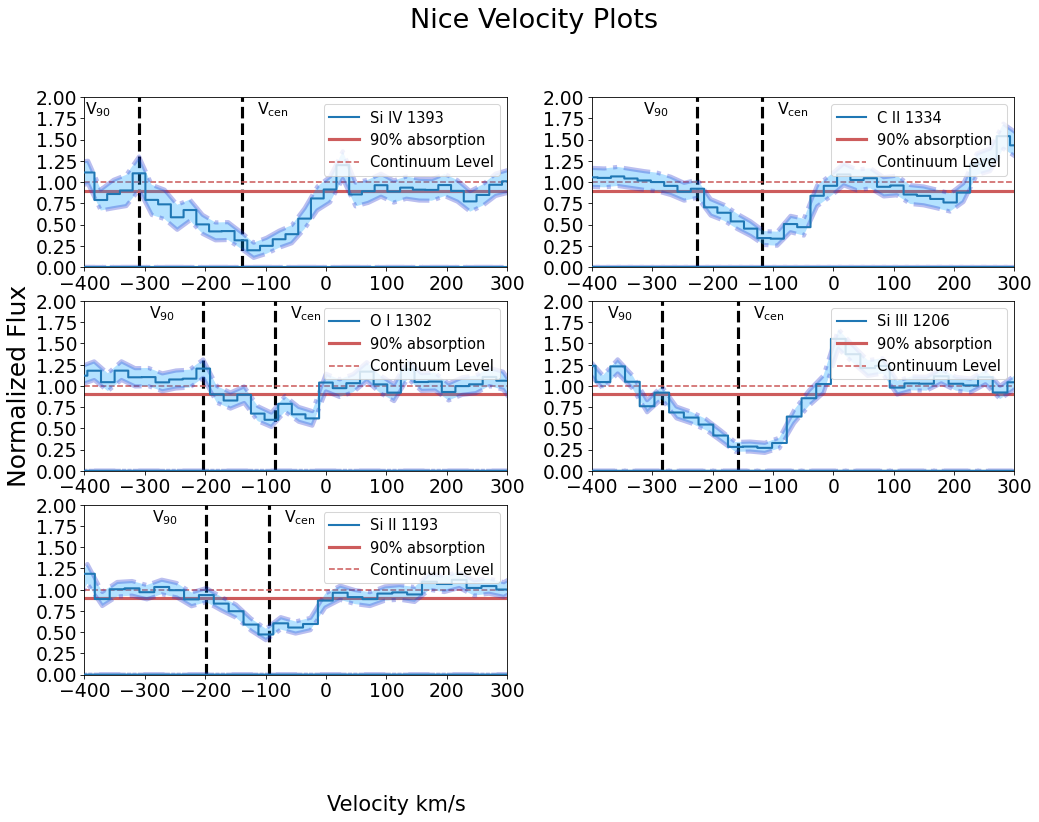

In [ ]:
small_line = ([1393.76,"Si IV 1393",.513],
              [1334.532,"C II 1334",.129],[1302.168,"O I 1302",5.2e-2],
            [1206.51,"Si III 1206",1.67],[1193.28,"Si II 1193",.797])
small_props = [SiIV_calc,CI_calc,O_calc,SiIII_calc,SiII_calc]
small_flux = [spline_SBS0926_SiIVrange,spline_SBS0926_CIrange,spline_SBS0926_OIrange,spline_SBS0926_SiIIIrange,spline_SBS0926_SiIIrange]
fig = plt.figure(figsize=(16,10))
fig.suptitle('Nice Velocity Plots', fontsize=26, y = 1)


for i in range(len(small_line)):
    line = (small_line[i][0])
    vel = c*(wave-line)/line
    xaxis,yaxis = vel,small_flux[i]
    z = i+1
    title = (small_line[i][1])
    #print (title)
    ax=fig.add_subplot(3,2,z)
    ax.plot(xaxis, yaxis, label = title ,drawstyle = 'steps-mid', linewidth= 2, zorder = 3)

    plt.fill_between(xaxis, yaxis-error, yaxis+error,
    alpha=0.3, edgecolor='#1B2ACC', facecolor='#089FFF',
    linewidth=4, linestyle='dashdot', antialiased=True)

    ax.axvline (x= small_props[i][0], color = 'black', linewidth = '3', zorder = 0, linestyle='--')
    ax.axvline (x=small_props[i][1], color = 'black', linewidth = '3',  zorder = 0, linestyle='--')
    plt.text(small_props[i][1] +25,1.8,r'$\rm V_{\rm cen}$', fontsize = txt_size)
    plt.text(small_props[i][0] - 90,1.8,r'$\rm V_{\rm 90}$', fontsize = txt_size)
    if i == 2:
        ax.set_ylabel("Normalized Flux", fontsize = axis_fontsz)
        plt.text(1,-4,'Velocity km/s', fontsize = 20)

    plt.yticks(fontsize=ticksz)
    plt.xticks(fontsize=ticksz)
    ax.set_xlim([-400,300])
    ax.set_ylim([.0,2])
    ax.axhline (y=.9,color = '#CD5C5C', label = '90% absorption ', linewidth = 3, zorder = 0)
    ax.axhline(y=1, color = '#CD5C5C', linestyle = 'dashed', label = "Continuum Level", zorder = 0)
    leg = ax.legend(prop={"size":legsize}, loc = 1)
    #ax.set_title(title, fontsize =35)
plt.tight_layout()
#plt.savefig("Figure3 All Vel for 1 Gal")
plt.show()


In [ ]:


error_MC = np.zeros(3276)
error_MC = (error_MC+0.0)
trialcount = (1000)
allresults = np.empty(0)

#print ('Si IV \/')
testSi_IV = MC_Spline(x0,(100,-500),SBS0926_SiIVrange,1)
#print ('C I \/')
testCI = MC_Spline(x4,(100,-480),SBS0926_CIrange,1)
##print ('Si III \/')
testSi_III = MC_Spline(x8,(200,-700),SBS0926_SiIIIrange,1)
#print ('OI \/')
testO_I = MC_Spline(x7,(200,-420),SBS0926_OIrange,1)
##print ('Si II \/')
testSi_II = MC_Spline(x2,(200,-400),SBS0926_SiIIrange,1)






errSi_III2 = (np.absolute((1/np.log(10))*((testSi_III[1])/(testSi_III[0]))))
errSi_II = (np.absolute((1/np.log(10))*((testSi_II[1])/(testSi_II[0]))))
errSi_IV = (np.absolute((1/np.log10(10))*(([testSi_IV[1]][0])/([testSi_IV[0]][0]))))
errOI = (np.absolute((1/np.log10(10))*(([testO_I[1]][0])/([testO_I[0]][0]))))

#Take Values of Interest in order of [EW,v90] Si IV,Si III, Si II, O I
SBS0926_v90=[ np.log10(np.absolute(testSi_IV[0])),np.log10(np.absolute(testSi_III[0])),np.log10(np.absolute(testSi_II[0])),np.log10(np.absolute(testO_I[0]))]
SBS0926_error=[errSi_IV,errSi_III2,errSi_II,errOI,testSi_IV[5],testSi_IV[5],testSi_II[5],testO_I[5]]
SBS0926_EW= [testSi_IV[4],testSi_III[4],testSi_II[4],testO_I[4]]
#EW error values are in the error array 4-7 in the same order as v90

SBS09262_plot = [SBS0926_v90,SBS0926_EW,SBS0926_error]
print ("Overleaf Copy and Paste")
print (int(testO_I[0]), u"\u00B1",int(testO_I[1]),"&",
       int(testSi_II[0]), u"\u00B1",int(testSi_II[1]),"&",
       int(testSi_III[0]), u"\u00B1",int(testSi_III[1]),"&",
       int(testSi_IV[0]), u"\u00B1",int(testSi_IV[1]),"&",
       int(testCI[0]), u"\u00B1",int(testCI[1]))
print ("V-cen")
print (int(testO_I[2]), u"\u00B1",int(testO_I[3]),"&",
       int(testSi_II[2]), u"\u00B1",int(testSi_II[3]),"&",
       int(testSi_III[2]), u"\u00B1",int(testSi_III[3]),"&",
       int(testSi_IV[2]), u"\u00B1",int(testSi_IV[3]),"&",
       int(testCI[2]), u"\u00B1",int(testCI[3]))

#print (int(testO_I[2]), u"\u00B1",testO_I[3],"&",int(testSi_II[2]), u"\u00B1",testSi_II[3],"&",int(testSi_III[2]), u"\u00B1",testSi_III[3],"&",int(testSi_IV[2]), u"\u00B1",testSi_IV[3],"&",int(testCI[2]), u"\u00B1",testCI[3])
print("EW")
print (np.round(testO_I[4],decimals = 3), u"\u00B1",(np.round(testO_I[5],decimals = 3)),"&",
       (np.round(testSi_II[4],decimals = 3)), u"\u00B1",(np.round(testSi_II[5],decimals = 3)),"&",
       (np.round(testSi_III[4],decimals = 3)), u"\u00B1",(np.round(testSi_III[5],decimals = 3)),"&",
       (np.round(testSi_IV[4],decimals = 3)), u"\u00B1",(np.round(testSi_IV[5],decimals = 3)),"&",
       (np.round(testCI[4],decimals = 3)), u"\u00B1",(np.round(testCI[5],decimals = 3)))
#print (testO_I[4], u"\u00B1",testO_I[5],"&",testSi_II[4], u"\u00B1",testSi_II[5],"&",testSi_III[4], u"\u00B1",testSi_III[5],"&",testSi_IV[4], u"\u00B1",testSi_IV[5],"&",testCI[4], u"\u00B1",testCI[5])
#print ("&", errorpropdiv(testSi_II[4],testO_I[4],testSi_II[5],testO_I[5]),
#                         "&" ,errorpropdiv(testSi_IV[4],testO_I[4],testSi_IV[5],testO_I[5]),
#                         "&",errorpropdiv(testSi_IV[4],testSi_II[4],testSi_IV[5],testSi_II[5]),
#                         "&",errorpropdiv(testSi_IV[4],testSi_III[4],testSi_IV[5],testSi_III[5]))



SBS_OverV90 = (int(testO_I[0]), u"\u00B1",int(testO_I[1]),"&",
       int(testSi_II[0]), u"\u00B1",int(testSi_II[1]),"&",
       int(testSi_III[0]), u"\u00B1",int(testSi_III[1]),"&",
       int(testSi_IV[0]), u"\u00B1",int(testSi_IV[1]),"&",
       int(testCI[0]), u"\u00B1",int(testCI[1]))
SBS_OverVcen = (int(testO_I[0]), u"\u00B1",int(testO_I[1]),"&",
       int(testSi_II[0]), u"\u00B1",int(testSi_II[1]),"&",
       int(testSi_III[0]), u"\u00B1",int(testSi_III[1]),"&",
       int(testSi_IV[0]), u"\u00B1",int(testSi_IV[1]),"&",
       int(testCI[0]), u"\u00B1",int(testCI[1]))
SBS_OverEW = (np.round(testO_I[4],decimals = 3), u"\u00B1",(np.round(testO_I[5],decimals = 3)),"&",
       (np.round(testSi_II[4],decimals = 3)), u"\u00B1",(np.round(testSi_II[5],decimals = 3)),"&",
       (np.round(testSi_III[4],decimals = 3)), u"\u00B1",(np.round(testSi_III[5],decimals = 3)),"&",
       (np.round(testSi_IV[4],decimals = 3)), u"\u00B1",(np.round(testSi_IV[5],decimals = 3)),"&",
       (np.round(testCI[4],decimals = 3)), u"\u00B1",(np.round(testCI[5],decimals = 3)))
SBS0926_EWratio = ("&", errorpropdiv(testSi_II[4],testO_I[4],testSi_II[5],testO_I[5]),
                         "&" ,errorpropdiv(testSi_IV[4],testO_I[4],testSi_IV[5],testO_I[5]),
                         "&",errorpropdiv(testSi_IV[4],testSi_II[4],testSi_IV[5],testSi_II[5]),
                         "&",errorpropdiv(testSi_IV[4],testSi_III[4],testSi_IV[5],testSi_III[5]))

1
1
1
1
1
Overleaf Copy and Paste
-160 ± 28 & -199 ± 32 & -302 ± 27 & -296 ± 26 & -240 ± 23
V-cen
-73 ± 17 & -87 ± 18 & -242 ± 17 & -153 ± 11 & -124 ± 10
EW
0.329 ± 0.095 & 0.472 ± 0.076 & 0.969 ± 0.124 & 0.952 ± 0.083 & 0.573 ± 0.094


In [ ]:
#print ((SBS0926_OVEREW[3]))

# CG 274


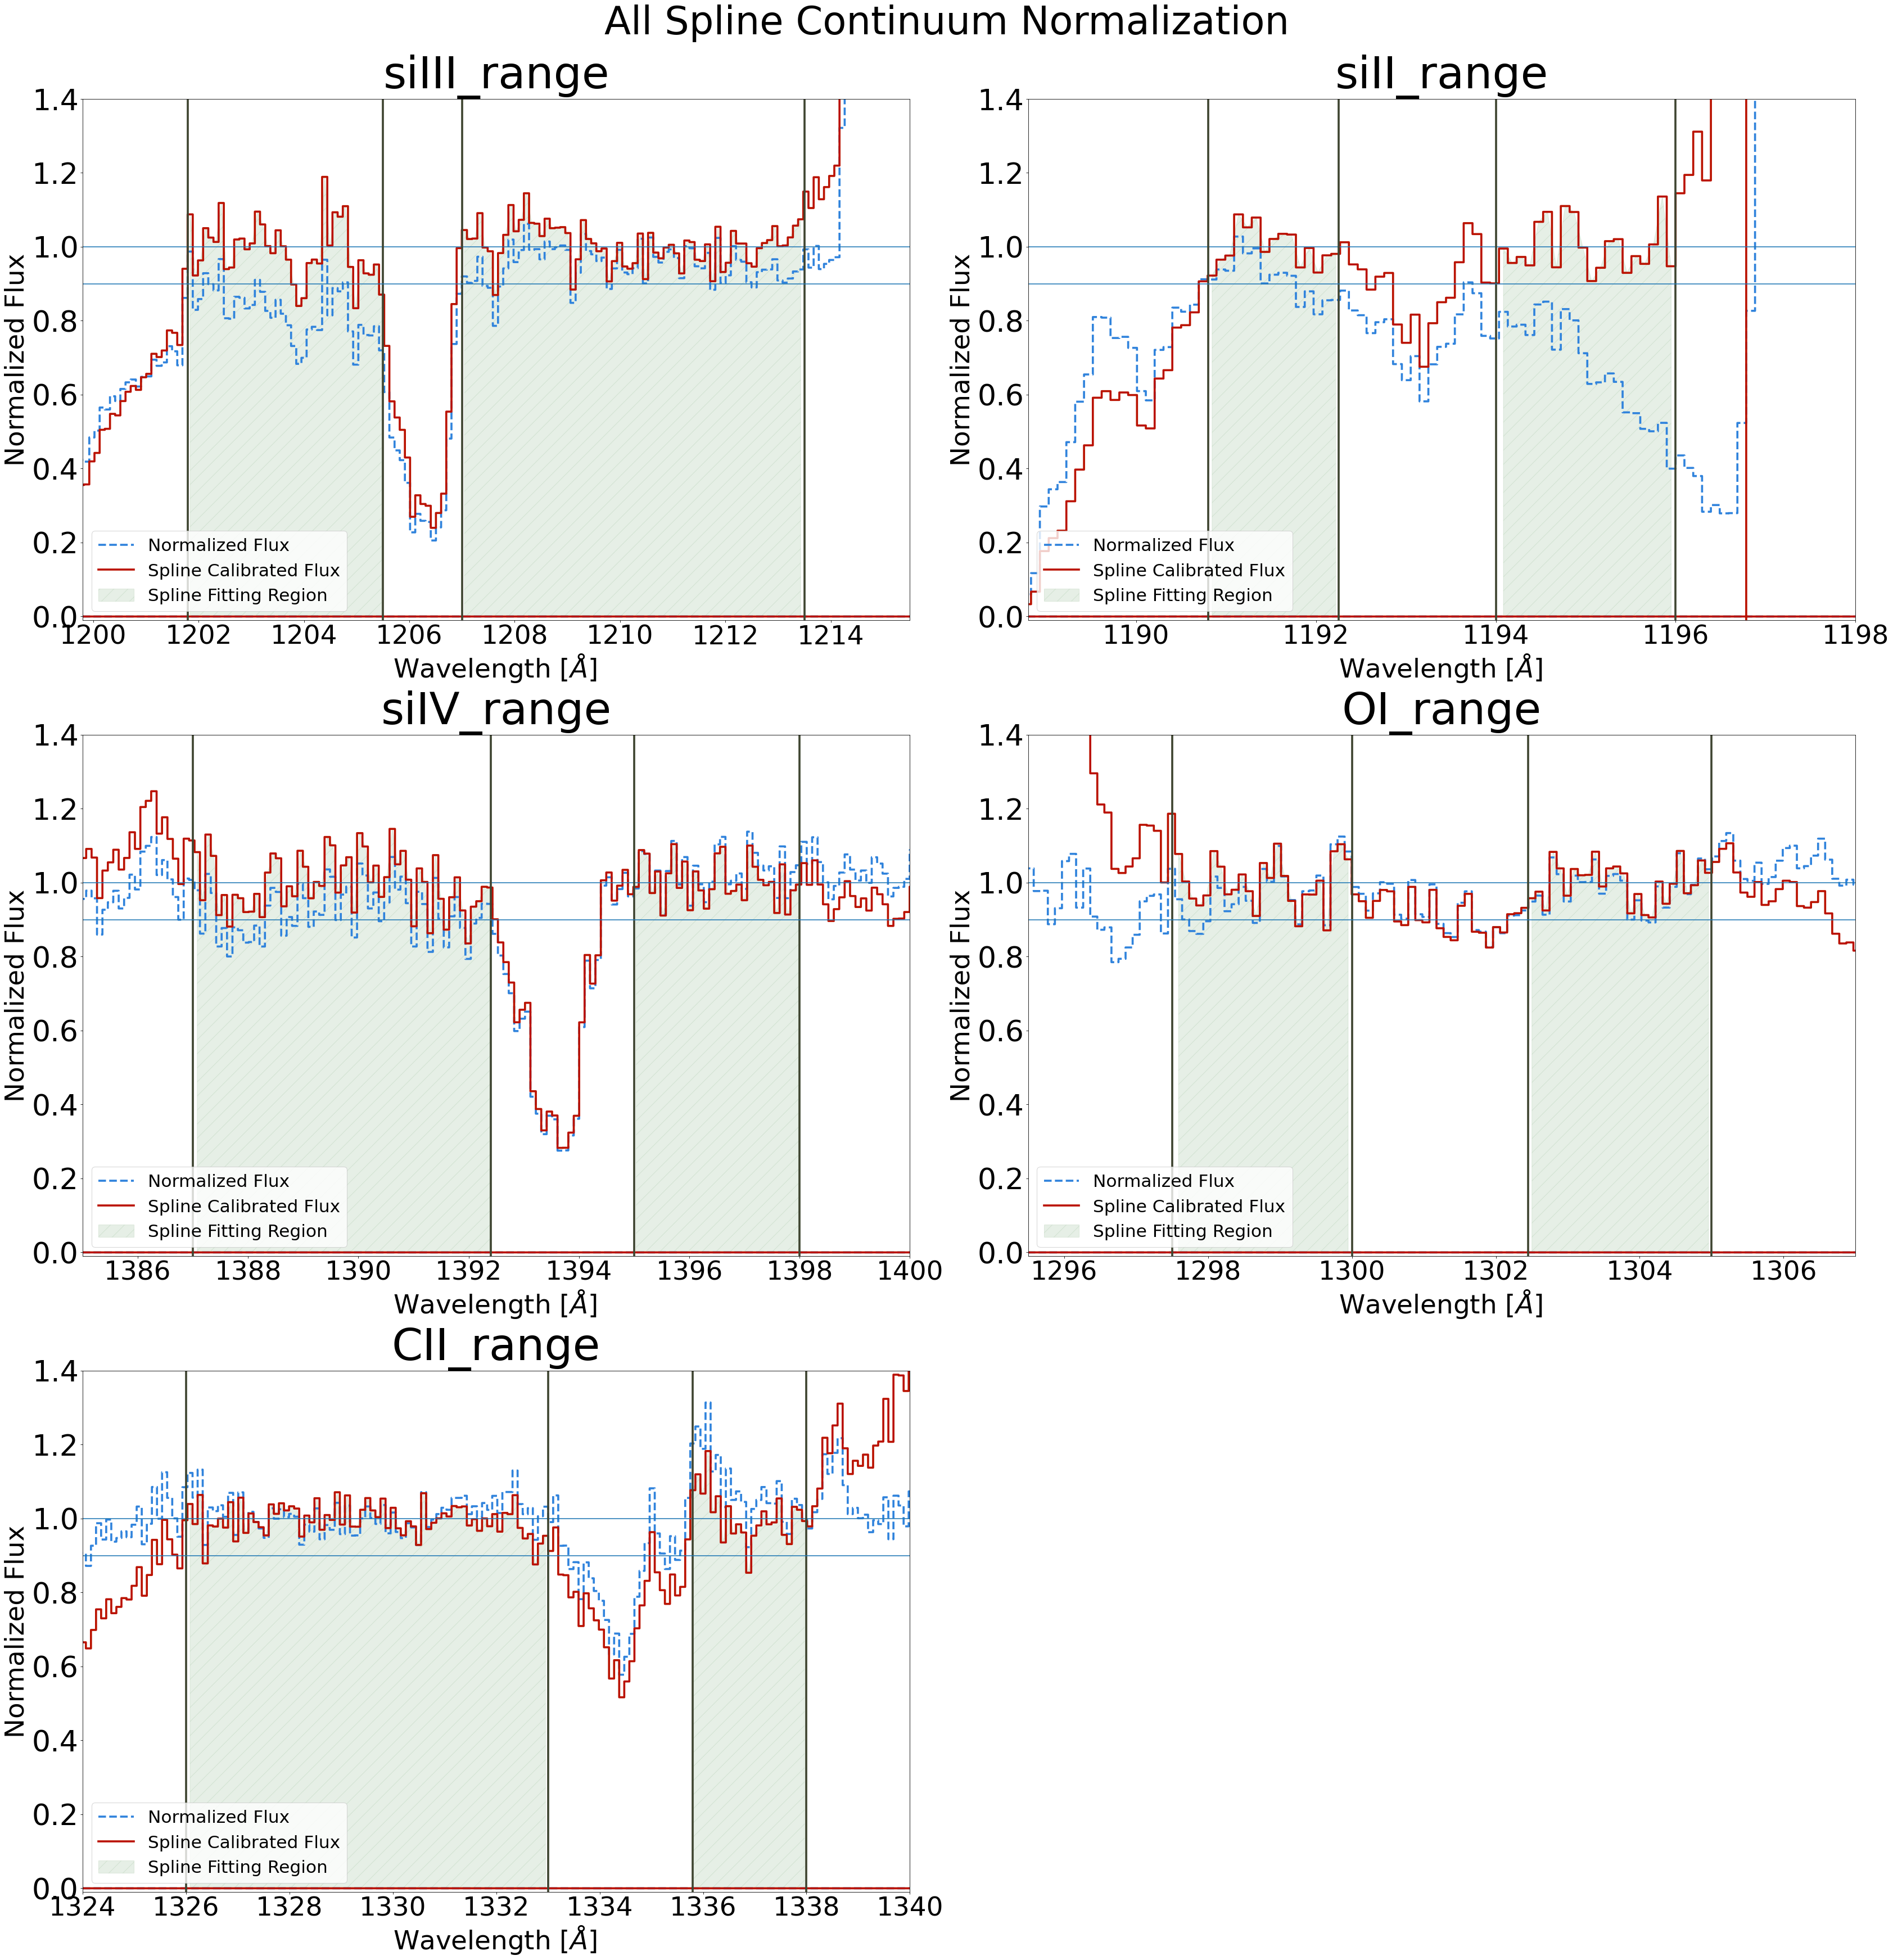

In [ ]:
#def QuickCalc(Master_file):
#Master goes in the order of flux,wave,cont,error
#CG274
[error,flux,wave,cont ]= [CG274_master[3],CG274_master[0],CG274_master[1],CG274_master[2]]
[siIIIrange_CG274,siIIrange_CG274,siIVrange_CG274,OIrange_CG274,CIrange_CG274 ]= [(1201.8,1205.5,1207,1213.5),(1190.8,1192.25,1194,1196),
                                                                                  (1387,1392.4,1395,1398),
                                                                                  (1297.5,1300,1302.45,1305),(1326,1333,1335.8,1338)]
FC = flux/cont
toplot = (siIIIrange_CG274,siIIrange_CG274 ,siIVrange_CG274 ,OIrange_CG274   ,CIrange_CG274   )
toplotname = ('siIII_range','siII_range' ,'siIV_range' ,'OI_range'   ,'CII_range'   )
fig = plt.figure(figsize=(45,60))
fig.suptitle('All Spline Continuum Normalization', fontsize=66, y =1)

spline_siIIIrange_CG274 = splinefit(siIIIrange_CG274)
spline_siIIrange_CG274  = splinefit(siIIrange_CG274 )
spline_siIVrange_CG274= splinefit(siIVrange_CG274 )
spline_OIrange_CG274= splinefit(OIrange_CG274)
spline_CIrange_CG274= splinefit(CIrange_CG274)
for i in range (len(toplot)):
    z = i+1
    cutoff = toplot[i]
    ax=fig.add_subplot(4,2,z)
    cont_region = ((wave > cutoff[0]) & (wave < cutoff[1])) | ((wave > cutoff[2]) & (wave < cutoff[3]))
    spline_med= UnivariateSpline(wave[cont_region], FC[cont_region])
    spline_fit= spline_med(wave)
    flux_cont = FC/spline_fit
    ax.plot(wave, FC,'--',drawstyle = 'steps-mid'
             , label="Normalized Flux", linewidth = 3.5, color = '#3083DC')
    ax.plot(wave, flux_cont,'-',drawstyle = 'steps-mid', color='#BA1200'
             , label = "Spline Calibrated Flux", linewidth= 3.5 )
    flux_cont = splinefit(cutoff)
    plt.axhline(y=1)
    plt.axvline(x=( cutoff[0]), color='#3F4531',linewidth = 3.5)
    plt.axvline(x=( cutoff[1]), color='#3F4531',linewidth = 3.5)
    plt.axvline(x=( cutoff[2]), color = '#3F4531',linewidth = 3.5)
    plt.axvline(x=( cutoff[3]), color = '#3F4531',linewidth = 3.5)
    ax.fill_between(wave, flux_cont, 0,where = (cont_region)
                     ,facecolor="orange",color='#84B082',alpha=0.2
                     , hatch = '/', label = "Spline Fitting Region")
    xlim1,xlim2 =   ( cutoff[0] -2),  (cutoff[3]+2)
    ax.set_xlim(xlim1,xlim2)
    ax.set_ylim(-.01,1.4)
    ax.set_xlabel(r'Wavelength [$\AA$] ',fontdict = {'fontsize' :45} )
    ax.set_ylabel( 'Normalized Flux', fontsize =45)
    ax.tick_params(axis='x', labelsize=45)
    ax.tick_params(axis='y', labelsize=50)
    plt.axhline(y=.9)
    leg = ax.legend(prop={"size":30}, loc = 3)
    ax.set_title(toplotname[i], fontsize =76)
    #plt.axvline(x=MWlines[2], color = "black", linestyle = '--', label = "MW 1193 line")
    plt.tight_layout()
#plt.savefig("splinerange")
plt.show()

In [ ]:


SiIV_calc = v90calc(wave,spline_siIVrange_CG274,x0,(100,-400))
print ("SiIV V90,Wvel,EW",SiIV_calc)
CI_calc = v90calc(wave,spline_CIrange_CG274,x4,(100,-400))
print ("Carbon 1334 V90,Wvel,EW:", CI_calc)

SiII_calc = v90calc(wave,spline_siIIrange_CG274,x2,(100,-400))
print ("Si II 1193 v90:",SiII_calc)

O_calc = v90calc(wave,spline_OIrange_CG274,x7,(200,-190) )
print ("Oxygen 1302 v90:",O_calc)

SiIII_calc = v90calc(wave,spline_siIIIrange_CG274,x8,(100,-500))
print ("SiIII 1206 v90:",SiIII_calc)

SiIV V90,Wvel,EW [-274.421786390788, -70.55850586567152, 0.8744713042754053]
Carbon 1334 V90,Wvel,EW: [-309.75702043858655, -88.57799338554459, 0.5629555400253491]
Si II 1193 v90: [-118.2774922901317, -37.035357648026086, 0.17558838534880772]
Oxygen 1302 v90: [-126.42807686868235, -79.62042262928527, 0.0980355707037328]
SiIII 1206 v90: [-281.0192580252168, -78.64430499439874, 0.8333740355137443]


<ipython-input-26-88be69f662cf>:40: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


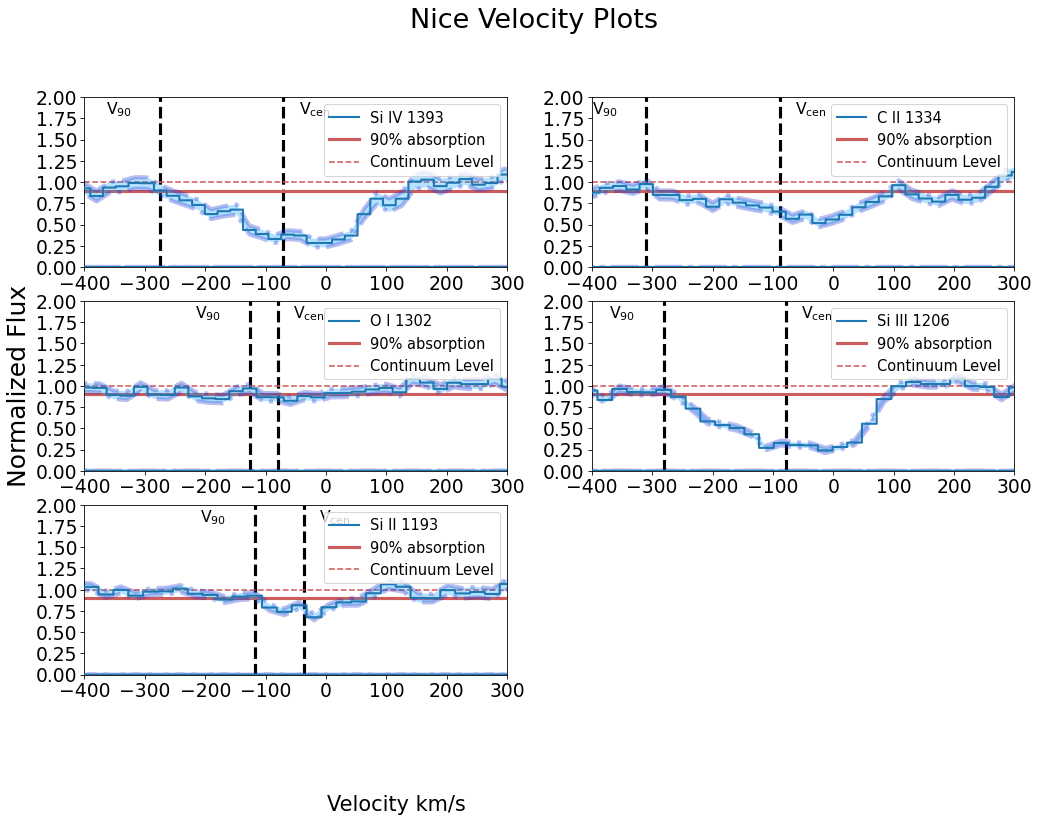

In [ ]:
small_line = ([1393.76,"Si IV 1393",.513],
              [1334.532,"C II 1334",.129],[1302.168,"O I 1302",5.2e-2],
            [1206.51,"Si III 1206",1.67],[1193.28,"Si II 1193",.797])
small_props = [SiIV_calc,CI_calc,O_calc,SiIII_calc,SiII_calc]
small_flux = [spline_siIVrange_CG274,spline_CIrange_CG274,spline_OIrange_CG274,spline_siIIIrange_CG274,spline_siIIrange_CG274]
fig = plt.figure(figsize=(16,10))
fig.suptitle('Nice Velocity Plots', fontsize=26, y = 1)


for i in range(len(small_line)):
    line = (small_line[i][0])
    vel = c*(wave-line)/line
    xaxis,yaxis = vel,small_flux[i]
    z = i+1
    title = (small_line[i][1])
    #print (title)
    ax=fig.add_subplot(3,2,z)
    ax.plot(xaxis, yaxis, label = title ,drawstyle = 'steps-mid', linewidth= 2, zorder = 3)

    plt.fill_between(xaxis, yaxis-error, yaxis+error,
    alpha=0.3, edgecolor='#1B2ACC', facecolor='#089FFF',
    linewidth=4, linestyle='dashdot', antialiased=True)

    ax.axvline (x= small_props[i][0], color = 'black', linewidth = '3', zorder = 0, linestyle='--')
    ax.axvline (x=small_props[i][1], color = 'black', linewidth = '3',  zorder = 0, linestyle='--')
    plt.text(small_props[i][1] +25,1.8,r'$\rm V_{\rm cen}$', fontsize = txt_size)
    plt.text(small_props[i][0] - 90,1.8,r'$\rm V_{\rm 90}$', fontsize = txt_size)
    if i == 2:
        ax.set_ylabel("Normalized Flux", fontsize = axis_fontsz)
        plt.text(1,-4,'Velocity km/s', fontsize = 20)

    plt.yticks(fontsize=ticksz)
    plt.xticks(fontsize=ticksz)
    ax.set_xlim([-400,300])
    ax.set_ylim([.0,2])
    ax.axhline (y=.9,color = '#CD5C5C', label = '90% absorption ', linewidth = 3, zorder = 0)
    ax.axhline(y=1, color = '#CD5C5C', linestyle = 'dashed', label = "Continuum Level", zorder = 0)
    leg = ax.legend(prop={"size":legsize}, loc = 1)
    #ax.set_title(title, fontsize =35)
plt.tight_layout()
#plt.savefig("Figure3 All Vel for 1 Gal")
plt.show()



In [ ]:

error_MC = np.zeros(3276)
trialcount = (1000)
allresults = np.empty(0)


testSi_IV = MC_Spline(x0,(100,-400),siIVrange_CG274,1)

testCI = MC_Spline(x4,(100,-480),CIrange_CG274,1)

testSi_III = MC_Spline(x8,(100,-500),siIIIrange_CG274,1)

testO_I = MC_Spline(x7,(200,-320),OIrange_CG274,1)

testSi_II = MC_Spline(x2,(200,-400),siIIrange_CG274,1)







errSi_III2 = (np.absolute((1/np.log(10))*((testSi_III[1])/(testSi_III[0]))))
errSi_II = (np.absolute((1/np.log(10))*((testSi_II[1])/(testSi_II[0]))))
errSi_IV = (np.absolute((1/np.log10(10))*(([testSi_IV[1]][0])/([testSi_IV[0]][0]))))
errOI = (np.absolute((1/np.log10(10))*(([testO_I[1]][0])/([testO_I[0]][0]))))

#Take Values of Interest in order of [EW,v90] Si IV,Si III, Si II, O I
CG274_v90=[ np.log10(np.absolute(testSi_IV[0])),np.log10(np.absolute(testSi_III[0])),np.log10(np.absolute(testSi_II[0])),np.log10(np.absolute(testO_I[0]))]
CG274_error=[errSi_IV,errSi_III2,errSi_II,errOI,testSi_IV[5],testSi_IV[5],testSi_II[5],testO_I[5]]
CG274_EW= [testSi_IV[4],testSi_III[4],testSi_II[4],testO_I[4]]
#EW error values are in the error array 4-7 in the same order as v90

CG2742_plot = [CG274_v90,CG274_EW,CG274_error]
print ("Overleaf Copy and Paste")
print (int(testO_I[0]), u"\u00B1",int(testO_I[1]),"&",
       int(testSi_II[0]), u"\u00B1",int(testSi_II[1]),"&",
       int(testSi_III[0]), u"\u00B1",int(testSi_III[1]),"&",
       int(testSi_IV[0]), u"\u00B1",int(testSi_IV[1]),"&",
       int(testCI[0]), u"\u00B1",int(testCI[1]))
print ("V-cen")
print (int(testO_I[2]), u"\u00B1",int(testO_I[3]),"&",
       int(testSi_II[2]), u"\u00B1",int(testSi_II[3]),"&",
       int(testSi_III[2]), u"\u00B1",int(testSi_III[3]),"&",
       int(testSi_IV[2]), u"\u00B1",int(testSi_IV[3]),"&",
       int(testCI[2]), u"\u00B1",int(testCI[3]))

#print (int(testO_I[2]), u"\u00B1",testO_I[3],"&",int(testSi_II[2]), u"\u00B1",testSi_II[3],"&",int(testSi_III[2]), u"\u00B1",testSi_III[3],"&",int(testSi_IV[2]), u"\u00B1",testSi_IV[3],"&",int(testCI[2]), u"\u00B1",testCI[3])
print("EW")
print (np.round(testO_I[4],decimals = 3), u"\u00B1",(np.round(testO_I[5],decimals = 3)),"&",
       (np.round(testSi_II[4],decimals = 3)), u"\u00B1",(np.round(testSi_II[5],decimals = 3)),"&",
       (np.round(testSi_III[4],decimals = 3)), u"\u00B1",(np.round(testSi_III[5],decimals = 3)),"&",
       (np.round(testSi_IV[4],decimals = 3)), u"\u00B1",(np.round(testSi_IV[5],decimals = 3)),"&",
       (np.round(testCI[4],decimals = 3)), u"\u00B1",(np.round(testCI[5],decimals = 3)))
#print (testO_I[4], u"\u00B1",testO_I[5],"&",testSi_II[4], u"\u00B1",testSi_II[5],"&",testSi_III[4], u"\u00B1",testSi_III[5],"&",testSi_IV[4], u"\u00B1",testSi_IV[5],"&",testCI[4], u"\u00B1",testCI[5])

print ("&", errorpropdiv(testSi_II[4],testO_I[4],testSi_II[5],testO_I[5]),
                         "&" ,errorpropdiv(testSi_IV[4],testO_I[4],testSi_IV[5],testO_I[5]),
                         "&",errorpropdiv(testSi_IV[4],testSi_II[4],testSi_IV[5],testSi_II[5]),
                         "&",errorpropdiv(testSi_IV[4],testSi_III[4],testSi_IV[5],testSi_III[5]))


CG_OverV90 = (int(testO_I[0]), u"\u00B1",int(testO_I[1]),"&",
       int(testSi_II[0]), u"\u00B1",int(testSi_II[1]),"&",
       int(testSi_III[0]), u"\u00B1",int(testSi_III[1]),"&",
       int(testSi_IV[0]), u"\u00B1",int(testSi_IV[1]),"&",
       int(testCI[0]), u"\u00B1",int(testCI[1]))
CG_OverVcen = (int(testO_I[0]), u"\u00B1",int(testO_I[1]),"&",
       int(testSi_II[0]), u"\u00B1",int(testSi_II[1]),"&",
       int(testSi_III[0]), u"\u00B1",int(testSi_III[1]),"&",
       int(testSi_IV[0]), u"\u00B1",int(testSi_IV[1]),"&",
       int(testCI[0]), u"\u00B1",int(testCI[1]))
CG_OverEW = (np.round(testO_I[4],decimals = 3), u"\u00B1",(np.round(testO_I[5],decimals = 3)),"&",
       (np.round(testSi_II[4],decimals = 3)), u"\u00B1",(np.round(testSi_II[5],decimals = 3)),"&",
       (np.round(testSi_III[4],decimals = 3)), u"\u00B1",(np.round(testSi_III[5],decimals = 3)),"&",
       (np.round(testSi_IV[4],decimals = 3)), u"\u00B1",(np.round(testSi_IV[5],decimals = 3)),"&",
       (np.round(testCI[4],decimals = 3)), u"\u00B1",(np.round(testCI[5],decimals = 3)))
CG_EWratio = ("&", errorpropdiv(testSi_II[4],testO_I[4],testSi_II[5],testO_I[5]),
                         "&" ,errorpropdiv(testSi_IV[4],testO_I[4],testSi_IV[5],testO_I[5]),
                         "&",errorpropdiv(testSi_IV[4],testSi_II[4],testSi_IV[5],testSi_II[5]),
                         "&",errorpropdiv(testSi_IV[4],testSi_III[4],testSi_IV[5],testSi_III[5]))

1
1
1
1
1
Overleaf Copy and Paste
-114 ± 25 & -131 ± 26 & -278 ± 16 & -277 ± 19 & -298 ± 28
V-cen
-103 ± 26 & -36 ± 20 & -82 ± 4 & -75 ± 6 & -95 ± 9
EW
0.224 ± 0.049 & 0.269 ± 0.068 & 0.836 ± 0.029 & 0.866 ± 0.042 & 0.569 ± 0.038
& 1.199±0.328 & 3.867±0.444 & 3.226±0.451 & 1.036±0.06


# IC 2779


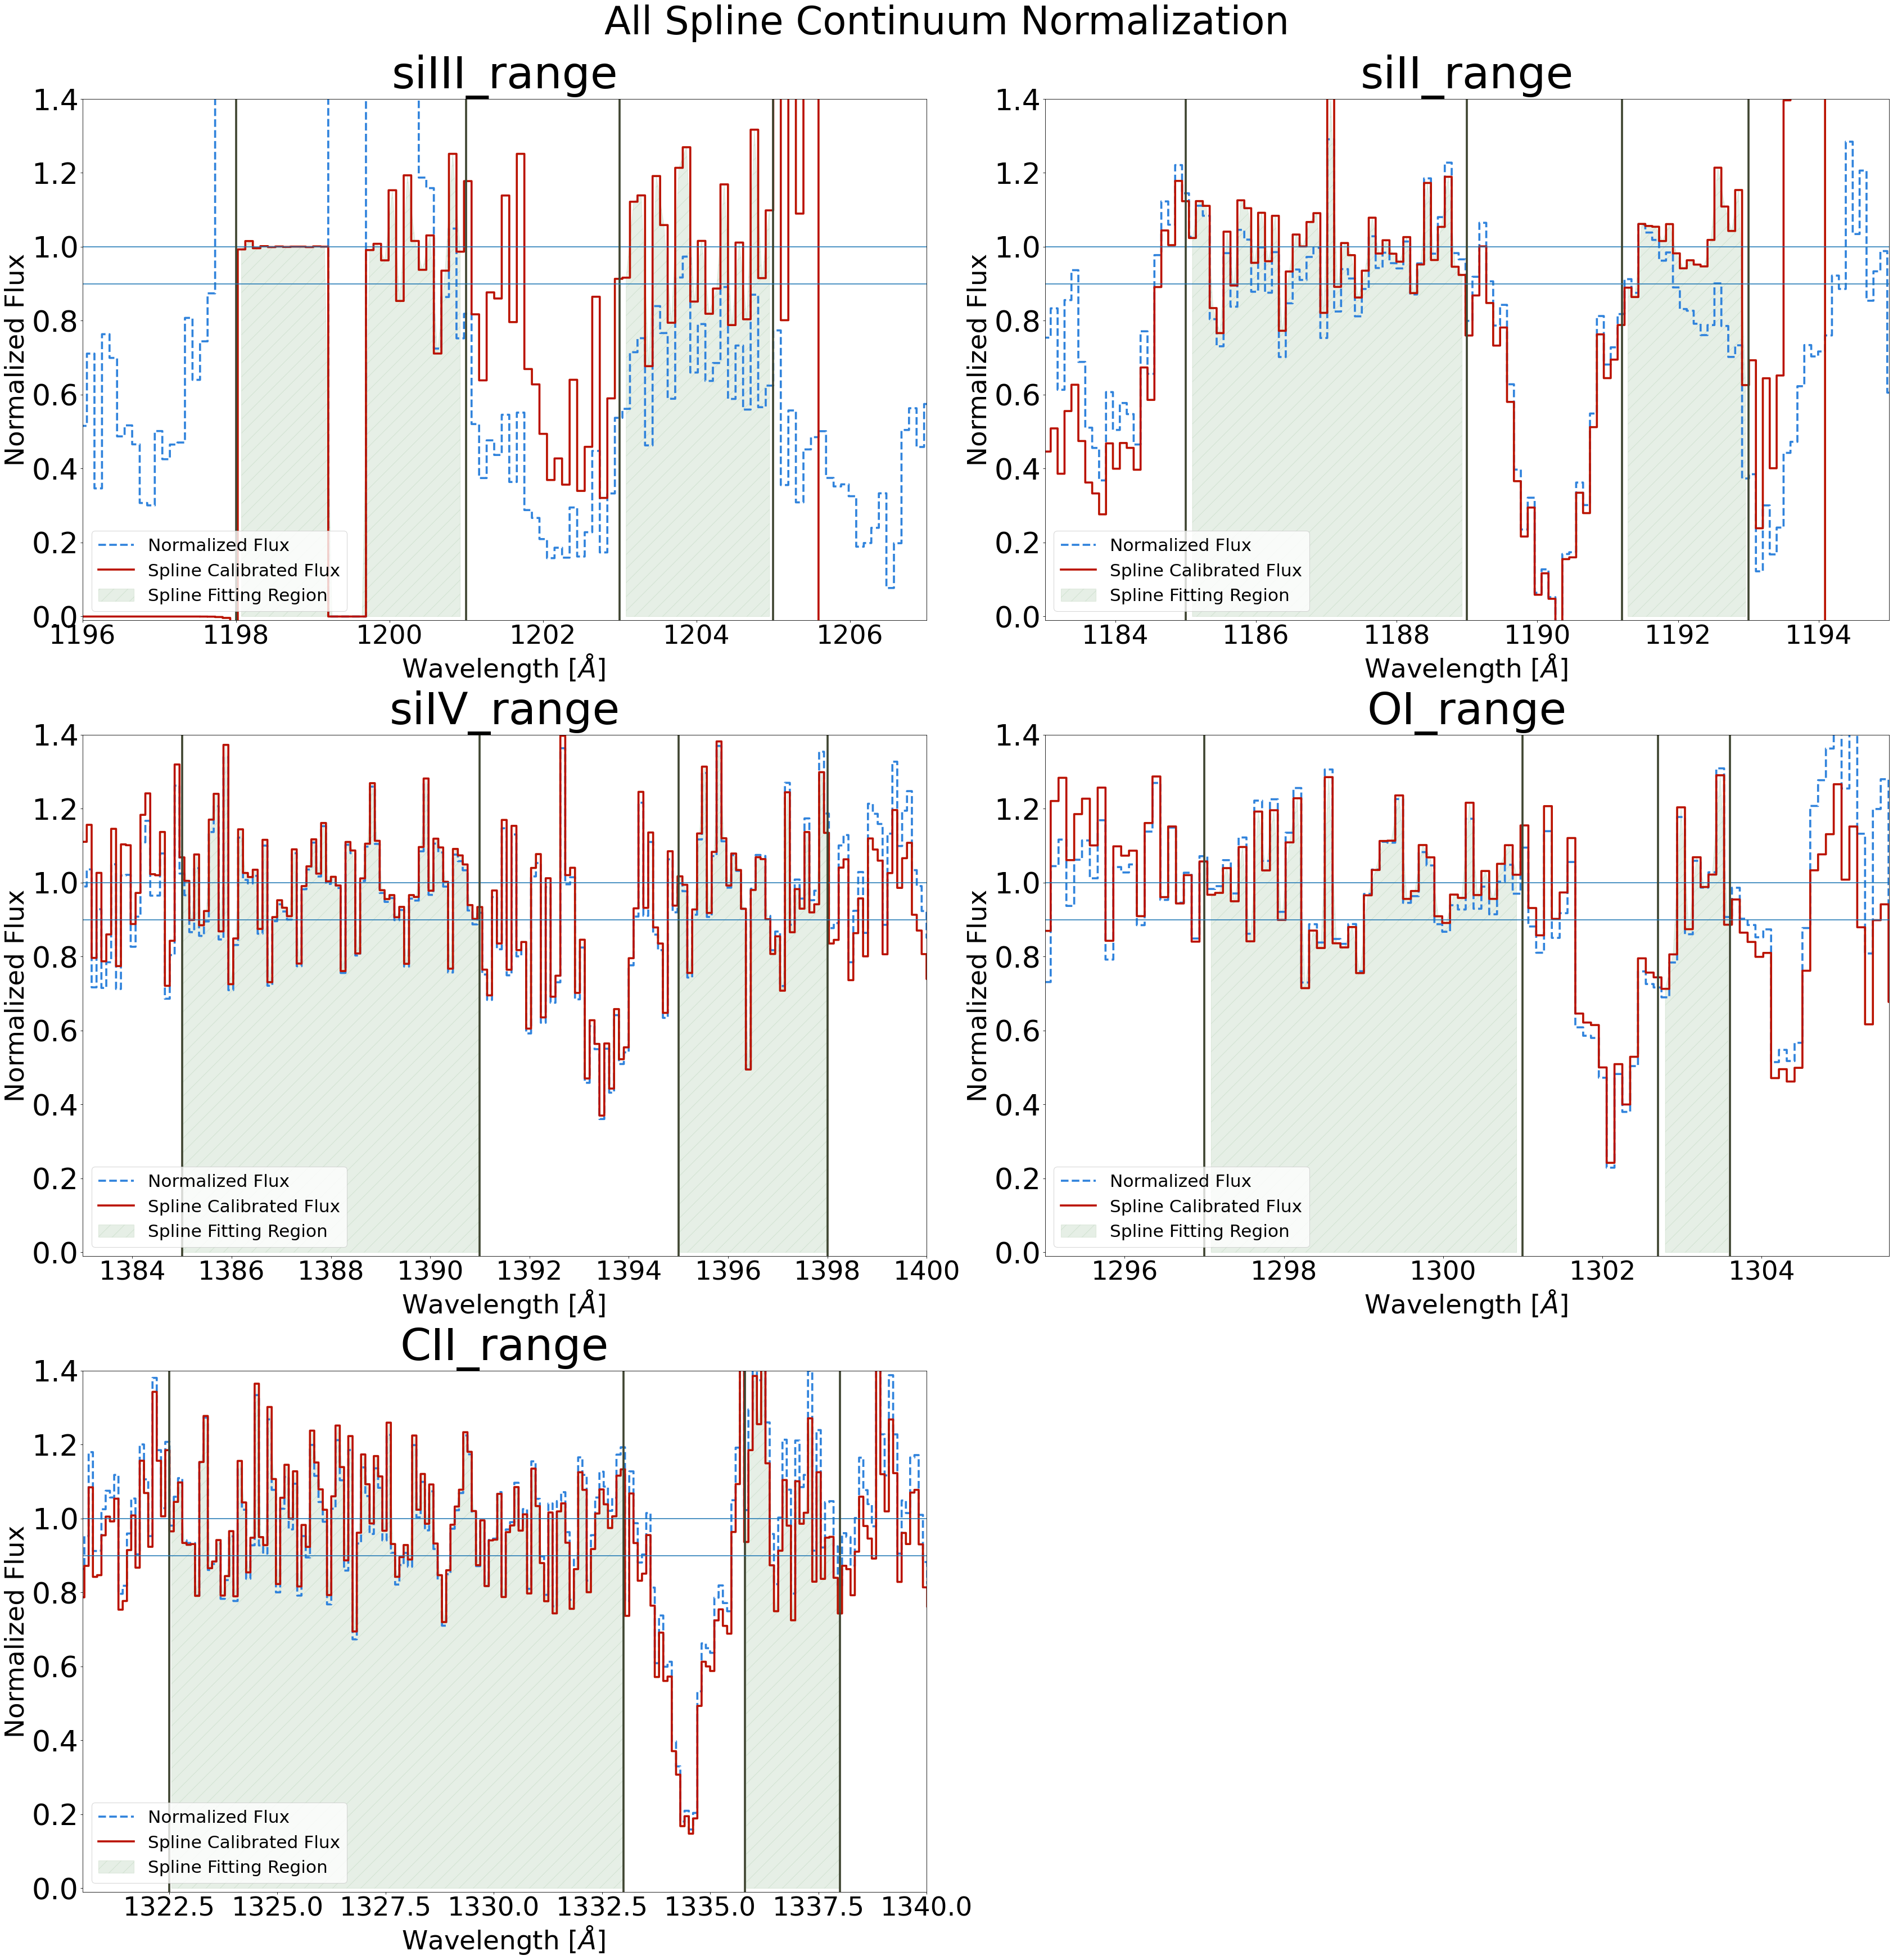

In [ ]:
#def QuickCalc(Master_file):
#Master goes in the order of flux,wave,cont,error
#IC2779
[error,flux,wave,cont ]= [IC2779_master[3],IC2779_master[0],IC2779_master[1],IC2779_master[2]]
[siIIIrange_IC2779,siIIrange_IC2779,siIVrange_IC2779,OIrange_IC2779,CIrange_IC2779 ]= [  (1198,1201,1203,1205), (1185,1189,1191.2,1193), (1385,1391,1395,1398), (1297,1301,1302.7,1303.6), (1322.5,1333,1335.8,1338)]



FC = flux/cont

toplot = (siIIIrange_IC2779,siIIrange_IC2779 ,siIVrange_IC2779 ,OIrange_IC2779   ,CIrange_IC2779   )
toplotname = ('siIII_range','siII_range' ,'siIV_range' ,'OI_range'   ,'CII_range'   )
fig = plt.figure(figsize=(45,60))
fig.suptitle('All Spline Continuum Normalization', fontsize=66, y =1)

spline_siIIIrange_IC2779 = splinefit(siIIIrange_IC2779)
spline_siIIrange_IC2779  = splinefit(siIIrange_IC2779 )
spline_siIVrange_IC2779= splinefit(siIVrange_IC2779 )
spline_OIrange_IC2779= splinefit(OIrange_IC2779)
spline_CIrange_IC2779= splinefit(CIrange_IC2779)
for i in range (len(toplot)):
    z = i+1
    cutoff = toplot[i]
    ax=fig.add_subplot(4,2,z)
    cont_region = ((wave > cutoff[0]) & (wave < cutoff[1])) | ((wave > cutoff[2]) & (wave < cutoff[3]))
    spline_med= UnivariateSpline(wave[cont_region], FC[cont_region])
    spline_fit= spline_med(wave)
    flux_cont = FC/spline_fit
    ax.plot(wave, FC,'--',drawstyle = 'steps-mid'
             , label="Normalized Flux", linewidth = 3.5, color = '#3083DC')
    ax.plot(wave, flux_cont,'-',drawstyle = 'steps-mid', color='#BA1200'
             , label = "Spline Calibrated Flux", linewidth= 3.5 )
    flux_cont = splinefit(cutoff)
    plt.axhline(y=1)
    plt.axvline(x=( cutoff[0]), color='#3F4531',linewidth = 3.5)
    plt.axvline(x=( cutoff[1]), color='#3F4531',linewidth = 3.5)
    plt.axvline(x=( cutoff[2]), color = '#3F4531',linewidth = 3.5)
    plt.axvline(x=( cutoff[3]), color = '#3F4531',linewidth = 3.5)
    ax.fill_between(wave, flux_cont, 0,where = (cont_region)
                     ,facecolor="orange",color='#84B082',alpha=0.2
                     , hatch = '/', label = "Spline Fitting Region")
    xlim1,xlim2 =   ( cutoff[0] -2),  (cutoff[3]+2)
    ax.set_xlim(xlim1,xlim2)
    ax.set_ylim(-.01,1.4)
    ax.set_xlabel(r'Wavelength [$\AA$] ',fontdict = {'fontsize' :45} )
    ax.set_ylabel( 'Normalized Flux', fontsize =45)
    ax.tick_params(axis='x', labelsize=45)
    ax.tick_params(axis='y', labelsize=50)
    plt.axhline(y=.9)
    leg = ax.legend(prop={"size":30}, loc = 3)
    ax.set_title(toplotname[i], fontsize =76)
    #plt.axvline(x=MWlines[2], color = "black", linestyle = '--', label = "MW 1193 line")
    plt.tight_layout()
#plt.savefig("splinerange")
plt.show()

In [ ]:
SiIV_calc = v90calc(wave,spline_siIVrange_IC2779,x0,(200,-400))
print ("SiIV V90,Wvel,EW",SiIV_calc)
CI_calc = v90calc(wave,spline_CIrange_IC2779,x4,(200,-400))
print ("Carbon 1334 V90,Wvel,EW:", CI_calc)

SiII_calc = v90calc(wave,spline_siIIrange_IC2779,x1,(100,-300))
print ("Si II 1190 v90:",SiII_calc)

O_calc = v90calc(wave,spline_OIrange_IC2779,x7,(200,-400) )
print ("Oxygen 1302 v90:",O_calc)

SiIII_calc = v90calc(wave,spline_siIIIrange_IC2779,x8,(200,-500))
print ("SiIII 1206 v90:",SiIII_calc)

SiIV V90,Wvel,EW [-191.42298530593018, -95.00846870881, 0.8632290461830464]
Carbon 1334 V90,Wvel,EW: [-215.42270998369938, -29.237946577173737, 0.9741477847814695]
Si II 1190 v90: [-299.32250574585413, -62.57312438453261, 1.0040070505561662]
Oxygen 1302 v90: [-127.91966935141811, 7.003039591620484, 0.5987967273207988]
SiIII 1206 v90: [-240.09017745400388, -107.10694271278788, 7.506410657045873]


<ipython-input-30-01cb6f67381b>:40: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


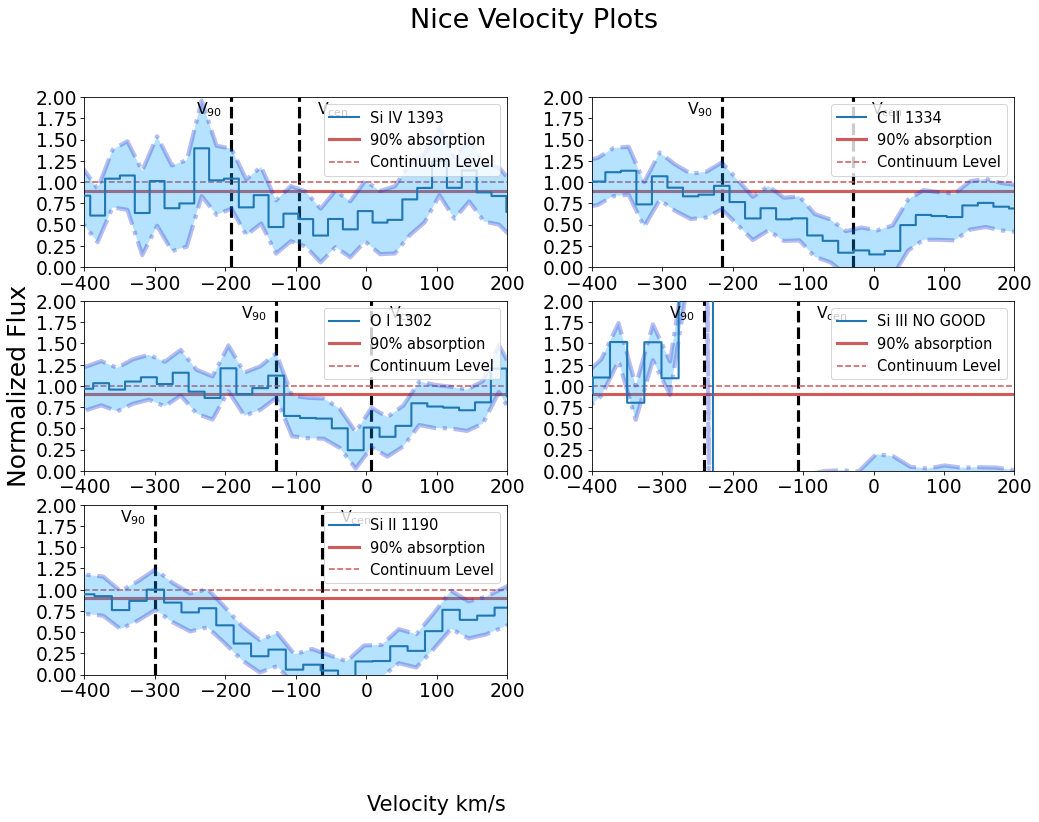

In [ ]:
small_line = ([1393.76,"Si IV 1393",.513],
              [1334.532,"C II 1334",.129],[1302.168,"O I 1302",5.2e-2],
            [1206.51,"Si III NO GOOD",1.67],[1190.416,"Si II 1190",.797])
small_props = [SiIV_calc,CI_calc,O_calc,SiIII_calc,SiII_calc]
small_flux = [spline_siIVrange_IC2779,spline_CIrange_IC2779,spline_OIrange_IC2779,spline_siIIIrange_IC2779,spline_siIIrange_IC2779]
fig = plt.figure(figsize=(16,10))
fig.suptitle('Nice Velocity Plots', fontsize=26, y = 1)


for i in range(len(small_line)):
    line = (small_line[i][0])
    vel = c*(wave-line)/line
    xaxis,yaxis = vel,small_flux[i]
    z = i+1
    title = (small_line[i][1])
    #print (title)
    ax=fig.add_subplot(3,2,z)
    ax.plot(xaxis, yaxis, label = title ,drawstyle = 'steps-mid', linewidth= 2, zorder = 3)

    plt.fill_between(xaxis, yaxis-error, yaxis+error,
    alpha=0.3, edgecolor='#1B2ACC', facecolor='#089FFF',
    linewidth=4, linestyle='dashdot', antialiased=True)

    ax.axvline (x= small_props[i][0], color = 'black', linewidth = '3', zorder = 0, linestyle='--')
    ax.axvline (x=small_props[i][1], color = 'black', linewidth = '3',  zorder = 0, linestyle='--')
    plt.text(small_props[i][1] +25,1.8,r'$\rm V_{\rm cen}$', fontsize = txt_size)
    plt.text(small_props[i][0] - 50,1.8,r'$\rm V_{\rm 90}$', fontsize = txt_size)
    if i == 2:
        ax.set_ylabel("Normalized Flux", fontsize = axis_fontsz)
        plt.text(1,-4,'Velocity km/s', fontsize = 20)

    plt.yticks(fontsize=ticksz)
    plt.xticks(fontsize=ticksz)
    ax.set_xlim([-400,200])
    ax.set_ylim([.0,2])
    ax.axhline (y=.9,color = '#CD5C5C', label = '90% absorption ', linewidth = 3, zorder = 0)
    ax.axhline(y=1, color = '#CD5C5C', linestyle = 'dashed', label = "Continuum Level", zorder = 0)
    leg = ax.legend(prop={"size":legsize}, loc = 1)
    #ax.set_title(title, fontsize =35)
plt.tight_layout()
#plt.savefig("Figure3 All Vel for 1 Gal")
plt.show()


In [ ]:

error_MC = np.zeros(3276)
trialcount = (1000)
allresults = np.empty(0)


testSi_IV = MC_Spline(x0,(100,-500),siIVrange_IC2779,1)

testCI = MC_Spline(x4,(100,-550),CIrange_IC2779,1)

#testSi_III = MC_Spline(x8,(100,-560),siIIIrange_IC2779,1)

testO_I = MC_Spline(x7,(100,-500),OIrange_IC2779,1)

testSi_II = MC_Spline(x1,(200,-600),siIIrange_IC2779,1)

print ("SI II non MC results: v90:", SiII_calc[0], "V_Cen:", SiII_calc[1], "EW:", SiII_calc[2])

print ("SI III non MC results: v90:", SiIII_calc[0], "V_Cen:", SiIII_calc[1], "EW:", SiIII_calc[2])

print ("SI IV non MC results: v90:", SiIV_calc[0], "V_Cen:", SiIV_calc[1], "EW:", SiIV_calc[2])

print ("C I non MC results: v90:", CI_calc[0], "V_Cen:", CI_calc[1], "EW:", CI_calc[2])


errSi_III2 = (np.absolute((1/np.log(10))*((testSi_III[1])/(testSi_III[0]))))
errSi_II = (np.absolute((1/np.log(10))*((testSi_II[1])/(testSi_II[0]))))
errSi_IV = (np.absolute((1/np.log10(10))*(([testSi_IV[1]][0])/([testSi_IV[0]][0]))))
errOI = (np.absolute((1/np.log10(10))*(([testO_I[1]][0])/([testO_I[0]][0]))))

#Take Values of Interest in order of [EW,v90] Si IV,Si III, Si II, O I
IC2779_v90=[ np.log10(np.absolute(testSi_IV[0])),np.log10(np.absolute(testSi_III[0])),np.log10(np.absolute(testSi_II[0])),np.log10(np.absolute(testO_I[0]))]
IC2779_error=[errSi_IV,errSi_III2,errSi_II,errOI,testSi_IV[5],testSi_IV[5],testSi_II[5],testO_I[5]]
IC2779_EW= [testSi_IV[4],testSi_III[4],testSi_II[4],testO_I[4]]
#EW error values are in the error array 4-7 in the same order as v90

IC2779_plot = [IC2779_v90,IC2779_EW,IC2779_error]
print ("Overleaf Copy and Paste")
print (int(testO_I[0]), u"\u00B1",int(testO_I[1]),"&",
       int(testSi_II[0]), u"\u00B1",int(testSi_II[1]),"&",
       int(testSi_III[0]), u"\u00B1",int(testSi_III[1]),"&",
       int(testSi_IV[0]), u"\u00B1",int(testSi_IV[1]),"&",
       int(testCI[0]), u"\u00B1",int(testCI[1]))
print ("V-cen")
print (int(testO_I[2]), u"\u00B1",int(testO_I[3]),"&",
       int(testSi_II[2]), u"\u00B1",int(testSi_II[3]),"&",
       int(testSi_III[2]), u"\u00B1",int(testSi_III[3]),"&",
       int(testSi_IV[2]), u"\u00B1",int(testSi_IV[3]),"&",
       int(testCI[2]), u"\u00B1",int(testCI[3]))

#print (int(testO_I[2]), u"\u00B1",testO_I[3],"&",int(testSi_II[2]), u"\u00B1",testSi_II[3],"&",int(testSi_III[2]), u"\u00B1",testSi_III[3],"&",int(testSi_IV[2]), u"\u00B1",testSi_IV[3],"&",int(testCI[2]), u"\u00B1",testCI[3])
print("EW")
print (np.round(testO_I[4],decimals = 3), u"\u00B1",(np.round(testO_I[5],decimals = 3)),"&",
       (np.round(testSi_II[4],decimals = 3)), u"\u00B1",(np.round(testSi_II[5],decimals = 3)),"&",
       (np.round(testSi_III[4],decimals = 3)), u"\u00B1",(np.round(testSi_III[5],decimals = 3)),"&",
       (np.round(testSi_IV[4],decimals = 3)), u"\u00B1",(np.round(testSi_IV[5],decimals = 3)),"&",
       (np.round(testCI[4],decimals = 3)), u"\u00B1",(np.round(testCI[5],decimals = 3)))
#print (testO_I[4], u"\u00B1",testO_I[5],"&",testSi_II[4], u"\u00B1",testSi_II[5],"&",testSi_III[4], u"\u00B1",testSi_III[5],"&",testSi_IV[4], u"\u00B1",testSi_IV[5],"&",testCI[4], u"\u00B1",testCI[5])

print ("&", errorpropdiv(testSi_II[4],testO_I[4],testSi_II[5],testO_I[5]),
                         "&" ,errorpropdiv(testSi_IV[4],testO_I[4],testSi_IV[5],testO_I[5]),
                         "&",errorpropdiv(testSi_IV[4],testSi_II[4],testSi_IV[5],testSi_II[5]),
                         "&",errorpropdiv(testSi_IV[4],testSi_III[4],testSi_IV[5],testSi_III[5]))


IC_OverV90 = (int(testO_I[0]), u"\u00B1",int(testO_I[1]),"&",
       int(testSi_II[0]), u"\u00B1",int(testSi_II[1]),"&",
       int(testSi_III[0]), u"\u00B1",int(testSi_III[1]),"&",
       int(testSi_IV[0]), u"\u00B1",int(testSi_IV[1]),"&",
       int(testCI[0]), u"\u00B1",int(testCI[1]))
IC_OverVcen = (int(testO_I[0]), u"\u00B1",int(testO_I[1]),"&",
       int(testSi_II[0]), u"\u00B1",int(testSi_II[1]),"&",
       int(testSi_III[0]), u"\u00B1",int(testSi_III[1]),"&",
       int(testSi_IV[0]), u"\u00B1",int(testSi_IV[1]),"&",
       int(testCI[0]), u"\u00B1",int(testCI[1]))
IC_OverEW = (np.round(testO_I[4],decimals = 3), u"\u00B1",(np.round(testO_I[5],decimals = 3)),"&",
       (np.round(testSi_II[4],decimals = 3)), u"\u00B1",(np.round(testSi_II[5],decimals = 3)),"&",
       (np.round(testSi_III[4],decimals = 3)), u"\u00B1",(np.round(testSi_III[5],decimals = 3)),"&",
       (np.round(testSi_IV[4],decimals = 3)), u"\u00B1",(np.round(testSi_IV[5],decimals = 3)),"&",
       (np.round(testCI[4],decimals = 3)), u"\u00B1",(np.round(testCI[5],decimals = 3)))
IC_EWratio = ("&", errorpropdiv(testSi_II[4],testO_I[4],testSi_II[5],testO_I[5]),
                         "&" ,errorpropdiv(testSi_IV[4],testO_I[4],testSi_IV[5],testO_I[5]),
                         "&",errorpropdiv(testSi_IV[4],testSi_II[4],testSi_IV[5],testSi_II[5]),
                         "&",errorpropdiv(testSi_IV[4],testSi_III[4],testSi_IV[5],testSi_III[5]))

1
1
1
1
SI II non MC results: v90: -299.32250574585413 V_Cen: -62.57312438453261 EW: 1.0040070505561662
SI III non MC results: v90: -240.09017745400388 V_Cen: -107.10694271278788 EW: 7.506410657045873
SI IV non MC results: v90: -191.42298530593018 V_Cen: -95.00846870881 EW: 0.8632290461830464
C I non MC results: v90: -215.42270998369938 V_Cen: -29.237946577173737 EW: 0.9741477847814695
Overleaf Copy and Paste
-126 ± 30 & -269 ± 48 & -278 ± 16 & -146 ± 46 & -190 ± 53
V-cen
-91 ± 28 & -82 ± 16 & -82 ± 4 & -154 ± 31 & -104 ± 21
EW
0.906 ± 0.147 & 1.484 ± 0.133 & 0.836 ± 0.029 & 1.237 ± 0.203 & 1.215 ± 0.144
& 1.638±0.292 & 1.365±0.307 & 0.834±0.164 & 1.479±0.247


# Shoc 22


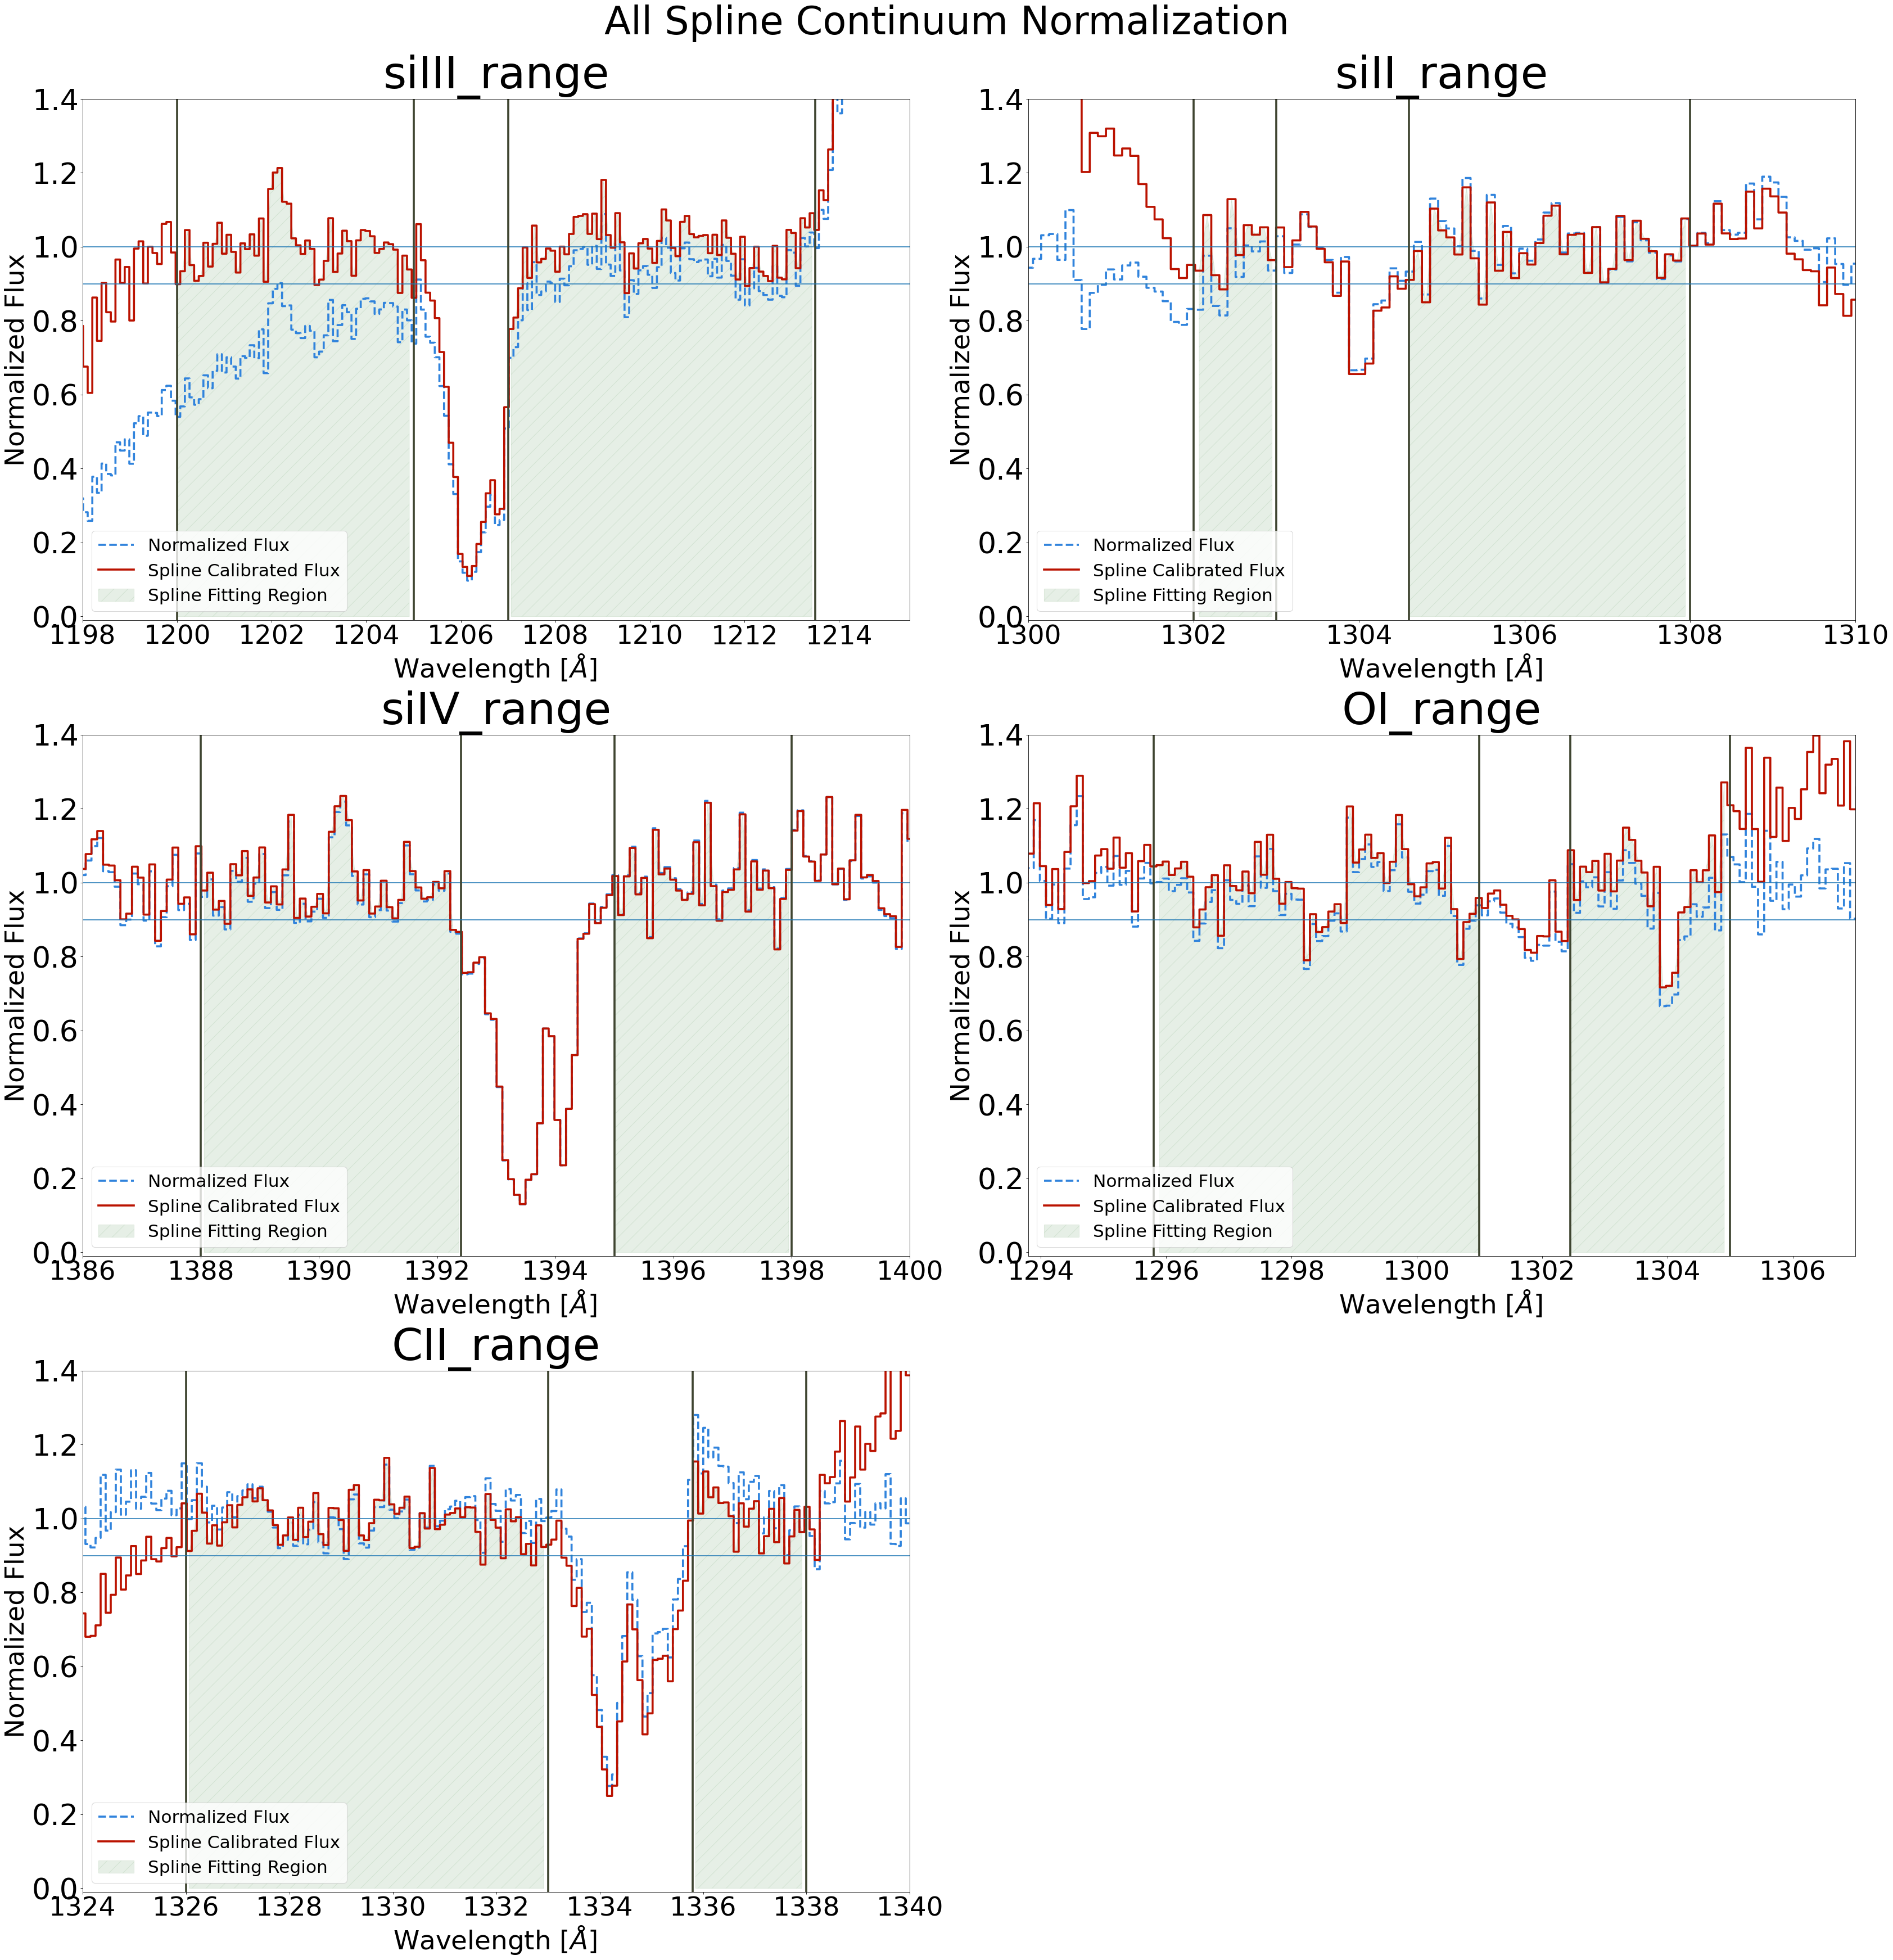

In [ ]:
#def QuickCalc(Master_file):
#Master goes in the order of flux,wave,cont,error
#Shoc22
[error,flux,wave,cont ]= [Shoc22_master[3],Shoc22_master[0],Shoc22_master[1],Shoc22_master[2]]
[siIIIrange_Shoc22,siIIrange_Shoc22,siIVrange_Shoc22,OIrange_Shoc22,CIrange_Shoc22 ]= [ (1200,1205,1207,1213.5) ,(1302,1303,1304.6,1308), (1388,1392.4,1395,1398), (1295.8,1301,1302.45,1305), (1326,1333,1335.8,1338)]



FC = flux/cont


#siIIIrange = (1201.8,1205.5,1207,1213.5)
#siIIrange  = (1190.8,1192.25,1194,1196)
#siIVrange  = (1387,1392.4,1395,1398)
#OIrange    = (1297.5,1301,1302.45,1305)
#CIrange    = (1326,1333,1335.8,1338)
toplot = (siIIIrange_Shoc22,siIIrange_Shoc22 ,siIVrange_Shoc22 ,OIrange_Shoc22   ,CIrange_Shoc22   )
toplotname = ('siIII_range','siII_range' ,'siIV_range' ,'OI_range'   ,'CII_range'   )
fig = plt.figure(figsize=(45,60))
fig.suptitle('All Spline Continuum Normalization', fontsize=66, y =1)

spline_siIIIrange_Shoc22 = splinefit(siIIIrange_Shoc22)
spline_siIIrange_Shoc22  = splinefit(siIIrange_Shoc22 )
spline_siIVrange_Shoc22= splinefit(siIVrange_Shoc22 )
spline_OIrange_Shoc22= splinefit(OIrange_Shoc22)
spline_CIrange_Shoc22= splinefit(CIrange_Shoc22)
for i in range (len(toplot)):
    z = i+1
    cutoff = toplot[i]
    ax=fig.add_subplot(4,2,z)
    cont_region = ((wave > cutoff[0]) & (wave < cutoff[1])) | ((wave > cutoff[2]) & (wave < cutoff[3]))
    spline_med= UnivariateSpline(wave[cont_region], FC[cont_region])
    spline_fit= spline_med(wave)
    flux_cont = FC/spline_fit
    ax.plot(wave, FC,'--',drawstyle = 'steps-mid'
             , label="Normalized Flux", linewidth = 3.5, color = '#3083DC')
    ax.plot(wave, flux_cont,'-',drawstyle = 'steps-mid', color='#BA1200'
             , label = "Spline Calibrated Flux", linewidth= 3.5 )
    flux_cont = splinefit(cutoff)
    plt.axhline(y=1)
    plt.axvline(x=( cutoff[0]), color='#3F4531',linewidth = 3.5)
    plt.axvline(x=( cutoff[1]), color='#3F4531',linewidth = 3.5)
    plt.axvline(x=( cutoff[2]), color = '#3F4531',linewidth = 3.5)
    plt.axvline(x=( cutoff[3]), color = '#3F4531',linewidth = 3.5)
    ax.fill_between(wave, flux_cont, 0,where = (cont_region)
                     ,facecolor="orange",color='#84B082',alpha=0.2
                     , hatch = '/', label = "Spline Fitting Region")
    xlim1,xlim2 =   ( cutoff[0] -2),  (cutoff[3]+2)
    ax.set_xlim(xlim1,xlim2)
    ax.set_ylim(-.01,1.4)
    ax.set_xlabel(r'Wavelength [$\AA$] ',fontdict = {'fontsize' :45} )
    ax.set_ylabel( 'Normalized Flux', fontsize =45)
    ax.tick_params(axis='x', labelsize=45)
    ax.tick_params(axis='y', labelsize=50)
    plt.axhline(y=.9)
    leg = ax.legend(prop={"size":30}, loc = 3)
    ax.set_title(toplotname[i], fontsize =76)
    #plt.axvline(x=MWlines[2], color = "black", linestyle = '--', label = "MW 1193 line")
    plt.tight_layout()
#plt.savefig("splinerange")
plt.show()

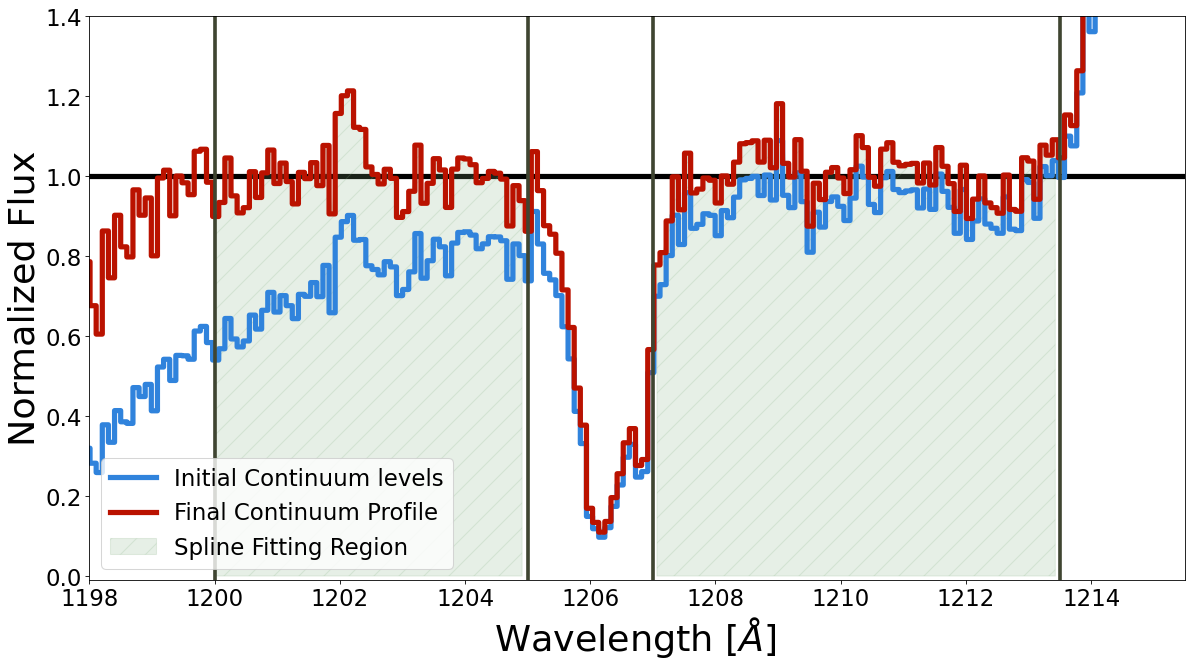

In [ ]:
#def QuickCalc(Master_file):
#Master goes in the order of flux,wave,cont,error
#Shoc22
[error,flux,wave,cont ]= [Shoc22_master[3],Shoc22_master[0],Shoc22_master[1],Shoc22_master[2]]
[siIIIrange_Shoc22,siIIrange_Shoc22,siIVrange_Shoc22,OIrange_Shoc22,CIrange_Shoc22 ]= [ (1200,1205,1207,1213.5) ,(1302,1303,1304.6,1308), (1388,1392.4,1395,1398), (1295.8,1301,1302.45,1305), (1326,1333,1335.8,1338)]



FC = flux/cont


#siIIIrange = (1201.8,1205.5,1207,1213.5)
#siIIrange  = (1190.8,1192.25,1194,1196)
#siIVrange  = (1387,1392.4,1395,1398)
#OIrange    = (1297.5,1301,1302.45,1305)
#CIrange    = (1326,1333,1335.8,1338)
toplot = (siIIIrange_Shoc22,siIIrange_Shoc22 ,siIVrange_Shoc22 ,OIrange_Shoc22   ,CIrange_Shoc22   )
toplotname = ('siIII_range','siII_range' ,'siIV_range' ,'OI_range'   ,'CII_range'   )
fig = plt.figure(figsize=(16,9))
#fig.suptitle('All Spline Continuum Normalization', fontsize=66, y =1)

spline_siIIIrange_Shoc22 = splinefit(siIIIrange_Shoc22)
spline_siIIrange_Shoc22  = splinefit(siIIrange_Shoc22 )
spline_siIVrange_Shoc22= splinefit(siIVrange_Shoc22 )
spline_OIrange_Shoc22= splinefit(OIrange_Shoc22)
spline_CIrange_Shoc22= splinefit(CIrange_Shoc22)
for i in range (1):
    z = i+1
    cutoff = toplot[i]
    ax=fig.add_subplot(1,1,1)
    cont_region = ((wave > cutoff[0]) & (wave < cutoff[1])) | ((wave > cutoff[2]) & (wave < cutoff[3]))
    spline_med= UnivariateSpline(wave[cont_region], FC[cont_region])
    spline_fit= spline_med(wave)
    flux_cont = FC/spline_fit
    ax.plot(wave, FC,'-',drawstyle = 'steps-mid'
             , label="Initial Continuum levels", linewidth = 5, color = '#3083DC')
    ax.plot(wave, flux_cont,'-',drawstyle = 'steps-mid', color='#BA1200'
             , label = "Final Continuum Profile", linewidth= 5 )
    flux_cont = splinefit(cutoff)
    plt.axhline(y=1 , color = 'black', linewidth = 5, zorder =0)
    plt.axvline(x=( cutoff[0]), color='#3F4531',linewidth = 3.5)
    plt.axvline(x=( cutoff[1]), color='#3F4531',linewidth = 3.5)
    plt.axvline(x=( cutoff[2]), color = '#3F4531',linewidth = 3.5)
    plt.axvline(x=( cutoff[3]), color = '#3F4531',linewidth = 3.5)
    ax.fill_between(wave, flux_cont, 0,where = (cont_region)
                     ,facecolor="orange",color='#84B082',alpha=0.2
                     , hatch = '/', label = "Spline Fitting Region")
    xlim1,xlim2 =   ( cutoff[0] -2),  (cutoff[3]+2)
    ax.set_xlim(xlim1,xlim2)
    ax.set_ylim(-.01,1.4)
    ax.set_xlabel(r'Wavelength [$\AA$] ',fontdict = {'fontsize' :35} )
    ax.set_ylabel( 'Normalized Flux', fontsize =35)
    ax.tick_params(axis='x', labelsize=22)
    ax.tick_params(axis='y', labelsize=22)
    #plt.axhline(y=.9)
    leg = ax.legend(prop={"size":22}, loc = 3)
    #ax.set_title(toplotname[i], fontsize =76)
    #plt.axvline(x=MWlines[2], color = "black", linestyle = '--', label = "MW 1193 line")
    plt.tight_layout()
plt.savefig("splinerange")
plt.show()

In [ ]:
SiIV_calc = v90calc(wave,spline_siIVrange_Shoc22,x0,(100,-400))
print ("SiIV V90,Wvel,EW",SiIV_calc)
CI_calc = v90calc(wave,spline_CIrange_Shoc22,x4,(100,-400))
print ("Carbon 1334 V90,Wvel,EW:", CI_calc)

SiII_calc = v90calc(wave,spline_siIIrange_Shoc22,x3,(100,-400))
print ("Si II 1193 v90:",SiII_calc)

O_calc = v90calc(wave,spline_OIrange_Shoc22,x7,(100,-400) )
print ("Oxygen 1302 v90:",O_calc)

SiIII_calc = v90calc(wave,spline_siIIIrange_Shoc22,x8,(100,-500))
print ("SiIII 1206 v90:",SiIII_calc)

SiIV V90,Wvel,EW [-340.4338623579413, -76.46910046534195, 0.9517496875588277]
Carbon 1334 V90,Wvel,EW: [-295.78893574673816, -60.06684497617699, 0.7017895023423757]
Si II 1193 v90: [-123.99020216655518, -65.22917005883006, 0.18042060405243301]
Oxygen 1302 v90: [-135.8184965380803, -106.04015098225254, 0.22287696781543237]
SiIII 1206 v90: [-323.45757598362553, -74.82140671019523, 1.0161764643842988]


<ipython-input-35-c5a42cd1822d>:40: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


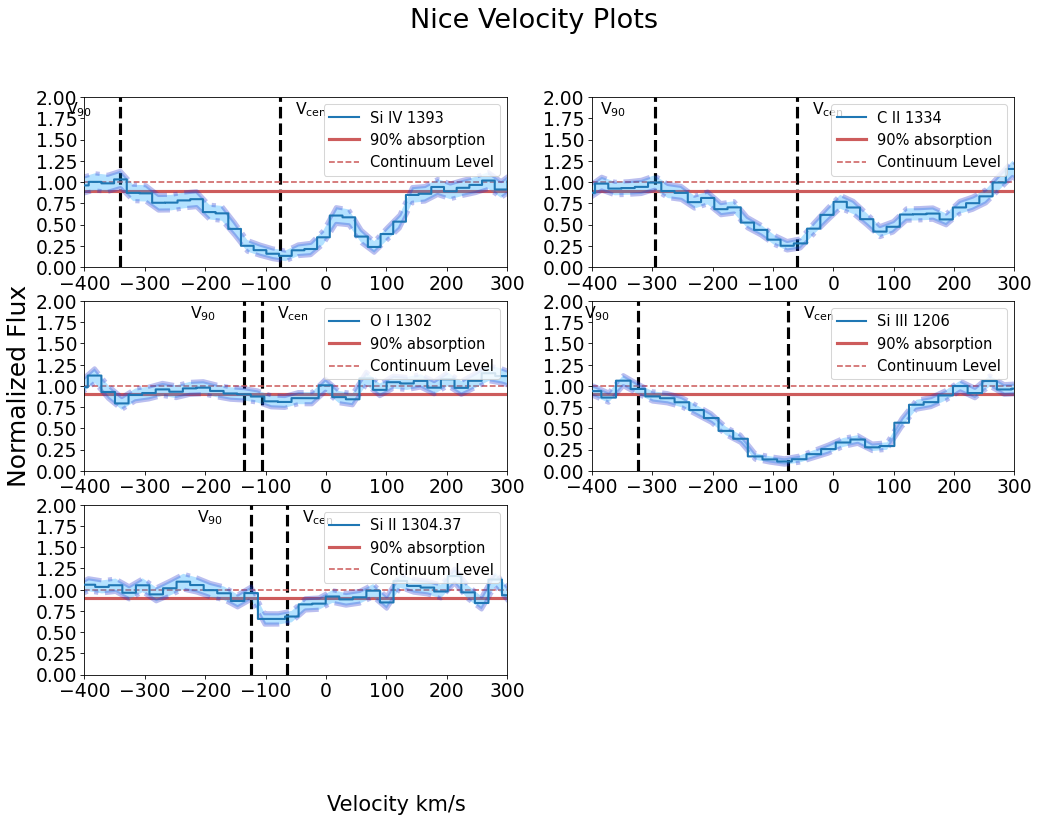

In [ ]:
small_line = ([1393.76,"Si IV 1393",.513],
              [1334.532,"C II 1334",.129],[1302.168,"O I 1302",5.2e-2],
            [1206.51,"Si III 1206",1.67],[1304.37,"Si II 1304.37",.797])
small_props = [SiIV_calc,CI_calc,O_calc,SiIII_calc,SiII_calc]
small_flux = [spline_siIVrange_Shoc22,spline_CIrange_Shoc22,spline_OIrange_Shoc22,spline_siIIIrange_Shoc22,spline_siIIrange_Shoc22]
fig = plt.figure(figsize=(16,10))
fig.suptitle('Nice Velocity Plots', fontsize=26, y = 1)


for i in range(len(small_line)):
    line = (small_line[i][0])
    vel = c*(wave-line)/line
    xaxis,yaxis = vel,small_flux[i]
    z = i+1
    title = (small_line[i][1])
    #print (title)
    ax=fig.add_subplot(3,2,z)
    ax.plot(xaxis, yaxis, label = title ,drawstyle = 'steps-mid', linewidth= 2, zorder = 3)

    plt.fill_between(xaxis, yaxis-error, yaxis+error,
    alpha=0.3, edgecolor='#1B2ACC', facecolor='#089FFF',
    linewidth=4, linestyle='dashdot', antialiased=True)

    ax.axvline (x= small_props[i][0], color = 'black', linewidth = '3', zorder = 0, linestyle='--')
    ax.axvline (x=small_props[i][1], color = 'black', linewidth = '3',  zorder = 0, linestyle='--')
    plt.text(small_props[i][1] +25,1.8,r'$\rm V_{\rm cen}$', fontsize = txt_size)
    plt.text(small_props[i][0] - 90,1.8,r'$\rm V_{\rm 90}$', fontsize = txt_size)
    if i == 2:
        ax.set_ylabel("Normalized Flux", fontsize = axis_fontsz)
        plt.text(1,-4,'Velocity km/s', fontsize = 20)

    plt.yticks(fontsize=ticksz)
    plt.xticks(fontsize=ticksz)
    ax.set_xlim([-400,300])
    ax.set_ylim([.0,2])
    ax.axhline (y=.9,color = '#CD5C5C', label = '90% absorption ', linewidth = 3, zorder = 0)
    ax.axhline(y=1, color = '#CD5C5C', linestyle = 'dashed', label = "Continuum Level", zorder = 0)
    leg = ax.legend(prop={"size":legsize}, loc = 1)
    #ax.set_title(title, fontsize =35)
plt.tight_layout()
#plt.savefig("Figure3 All Vel for 1 Gal")
plt.show()


In [ ]:

error_MC = np.zeros(3276)
trialcount = (1000)
allresults = np.empty(0)

#Here is where I call the function that does all the calculations for the galaxy
testSi_IV = MC_Spline(x0,(100,-400),siIVrange_Shoc22,1)
testCI = MC_Spline(x4,(100,-480),CIrange_Shoc22,1)
testSi_III = MC_Spline(x8,(100,-500),siIIIrange_Shoc22,1)
testO_I = MC_Spline(x7,(200,-420),OIrange_Shoc22,1)
testSi_II = MC_Spline(x3,(200,-500),siIIrange_Shoc22,1)

errOI = (np.absolute((1/np.log10(10))*(([testO_I[1]][0])/([testO_I[0]][0]))))
errSi_III2 = (np.absolute((1/np.log(10))*((testSi_III[1])/(testSi_III[0]))))
errSi_II = (np.absolute((1/np.log(10))*((testSi_II[1])/(testSi_II[0]))))
errSi_IV = (np.absolute((1/np.log10(10))*(([testSi_IV[1]][0])/([testSi_IV[0]][0]))))


#Take Values of Interest in order of [EW,v90] Si IV,Si III, Si II, O I
Shoc22_v90=[ np.log10(np.absolute(testSi_IV[0])),np.log10(np.absolute(testSi_III[0])),np.log10(np.absolute(testSi_II[0])),np.log10(np.absolute(testO_I[0]))]
Shoc22_error=[errSi_IV,errSi_III2,errSi_II,errOI,testSi_IV[5],testSi_IV[5],testSi_II[5],testO_I[5]]
Shoc22_EW= [testSi_IV[4],testSi_III[4],testSi_II[4],testO_I[4]]
#EW error values are in the error array 4-7 in the same order as v90

Shoc22_plot = [Shoc22_v90,Shoc22_EW,Shoc22_error]
print ("Overleaf Copy and Paste")
print (int(testO_I[0]), u"\u00B1",int(testO_I[1]),"&",
       int(testSi_II[0]), u"\u00B1",int(testSi_II[1]),"&",
       int(testSi_III[0]), u"\u00B1",int(testSi_III[1]),"&",
       int(testSi_IV[0]), u"\u00B1",int(testSi_IV[1]),"&",
       int(testCI[0]), u"\u00B1",int(testCI[1]))
print ("V-cen")
print (int(testO_I[2]), u"\u00B1",int(testO_I[3]),"&",
       int(testSi_II[2]), u"\u00B1",int(testSi_II[3]),"&",
       int(testSi_III[2]), u"\u00B1",int(testSi_III[3]),"&",
       int(testSi_IV[2]), u"\u00B1",int(testSi_IV[3]),"&",
       int(testCI[2]), u"\u00B1",int(testCI[3]))

#print (int(testO_I[2]), u"\u00B1",testO_I[3],"&",int(testSi_II[2]), u"\u00B1",testSi_II[3],"&",int(testSi_III[2]), u"\u00B1",testSi_III[3],"&",int(testSi_IV[2]), u"\u00B1",testSi_IV[3],"&",int(testCI[2]), u"\u00B1",testCI[3])
print("EW")
print (np.round(testO_I[4],decimals = 3), u"\u00B1",(np.round(testO_I[5],decimals = 3)),"&",
       (np.round(testSi_II[4],decimals = 3)), u"\u00B1",(np.round(testSi_II[5],decimals = 3)),"&",
       (np.round(testSi_III[4],decimals = 3)), u"\u00B1",(np.round(testSi_III[5],decimals = 3)),"&",
       (np.round(testSi_IV[4],decimals = 3)), u"\u00B1",(np.round(testSi_IV[5],decimals = 3)),"&",
       (np.round(testCI[4],decimals = 3)), u"\u00B1",(np.round(testCI[5],decimals = 3)))
#print (testO_I[4], u"\u00B1",testO_I[5],"&",testSi_II[4], u"\u00B1",testSi_II[5],"&",testSi_III[4], u"\u00B1",testSi_III[5],"&",testSi_IV[4], u"\u00B1",testSi_IV[5],"&",testCI[4], u"\u00B1",testCI[5])
print ("&", errorpropdiv(testSi_II[4],testO_I[4],testSi_II[5],testO_I[5]),
                         "&" ,errorpropdiv(testSi_IV[4],testO_I[4],testSi_IV[5],testO_I[5]),
                         "&",errorpropdiv(testSi_IV[4],testSi_II[4],testSi_IV[5],testSi_II[5]),
                         "&",errorpropdiv(testSi_IV[4],testSi_III[4],testSi_IV[5],testSi_III[5]))

Shoc22_OverV90 = (int(testO_I[0]), u"\u00B1",int(testO_I[1]),"&",
       int(testSi_II[0]), u"\u00B1",int(testSi_II[1]),"&",
       int(testSi_III[0]), u"\u00B1",int(testSi_III[1]),"&",
       int(testSi_IV[0]), u"\u00B1",int(testSi_IV[1]),"&",
       int(testCI[0]), u"\u00B1",int(testCI[1]))
Shoc22_OverVcen = (int(testO_I[0]), u"\u00B1",int(testO_I[1]),"&",
       int(testSi_II[0]), u"\u00B1",int(testSi_II[1]),"&",
       int(testSi_III[0]), u"\u00B1",int(testSi_III[1]),"&",
       int(testSi_IV[0]), u"\u00B1",int(testSi_IV[1]),"&",
       int(testCI[0]), u"\u00B1",int(testCI[1]))
Shoc22_OverEW = (np.round(testO_I[4],decimals = 3), u"\u00B1",(np.round(testO_I[5],decimals = 3)),"&",
       (np.round(testSi_II[4],decimals = 3)), u"\u00B1",(np.round(testSi_II[5],decimals = 3)),"&",
       (np.round(testSi_III[4],decimals = 3)), u"\u00B1",(np.round(testSi_III[5],decimals = 3)),"&",
       (np.round(testSi_IV[4],decimals = 3)), u"\u00B1",(np.round(testSi_IV[5],decimals = 3)),"&",
       (np.round(testCI[4],decimals = 3)), u"\u00B1",(np.round(testCI[5],decimals = 3)))
Shoc22_EWratio = ("&", errorpropdiv(testSi_II[4],testO_I[4],testSi_II[5],testO_I[5]),
                         "&" ,errorpropdiv(testSi_IV[4],testO_I[4],testSi_IV[5],testO_I[5]),
                         "&",errorpropdiv(testSi_IV[4],testSi_II[4],testSi_IV[5],testSi_II[5]),
                         "&",errorpropdiv(testSi_IV[4],testSi_III[4],testSi_IV[5],testSi_III[5]))


1
1
1
1
1
Overleaf Copy and Paste
-132 ± 30 & -133 ± 20 & -301 ± 27 & -289 ± 46 & -268 ± 29
V-cen
-130 ± 31 & -90 ± 26 & -76 ± 6 & -77 ± 6 & -76 ± 9
EW
0.319 ± 0.057 & 0.447 ± 0.099 & 1.032 ± 0.041 & 0.977 ± 0.047 & 0.822 ± 0.047
& 1.4±0.342 & 3.059±0.341 & 2.185±0.341 & 0.947±0.059


# **Ask208**


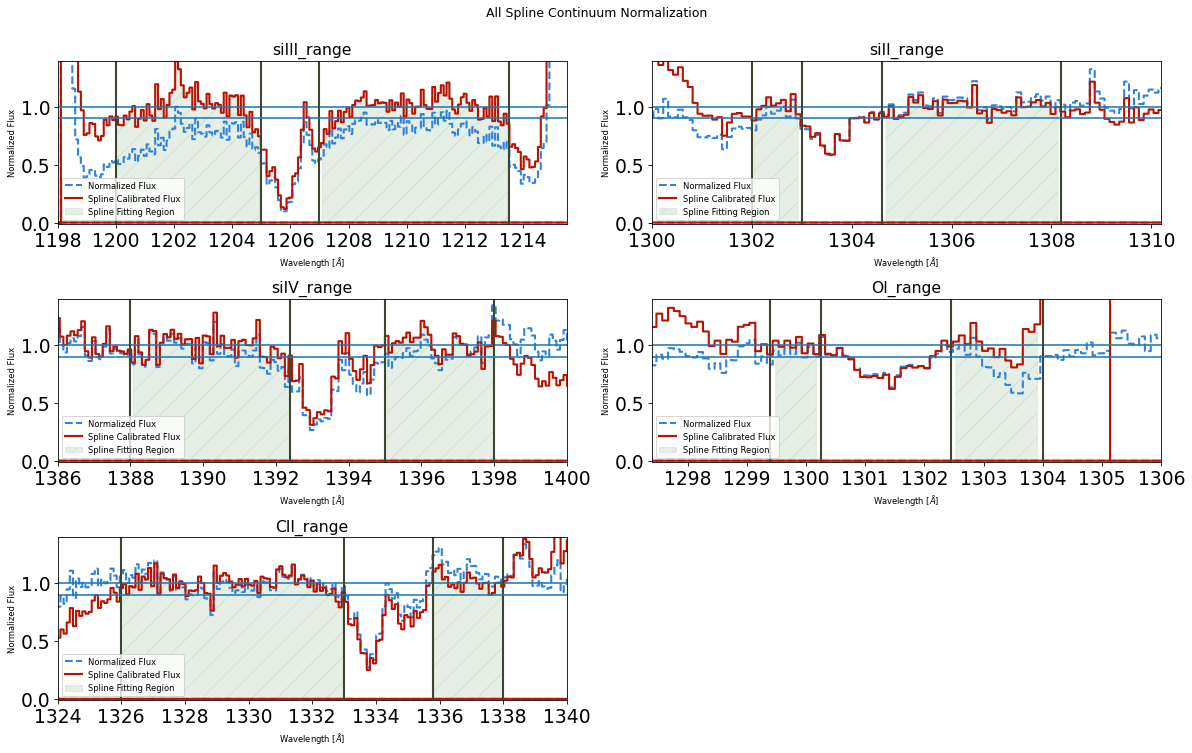

In [ ]:

#Master goes in the order of flux,wave,cont,error

[error,flux,wave,cont ]= [Ask208_master[3],Ask208_master[0],Ask208_master[1],Ask208_master[2]]
[siIIIrange_ASK208,siIIrange_ASK208,siIVrange_ASK208,OIrange_ASK208,CIrange_ASK208 ]= [ (1200,1205,1207,1213.5) ,(1302,1303,1304.6,1308.2), (1388,1392.4,1395,1398), (1299.4,1300.25,1302.45,1304), (1326,1333,1335.8,1338)]



FC = flux/cont


toplot = (siIIIrange_ASK208,siIIrange_ASK208 ,siIVrange_ASK208 ,OIrange_ASK208   ,CIrange_ASK208   )
toplotname = ('siIII_range','siII_range' ,'siIV_range' ,'OI_range'   ,'CII_range'   )
fig = plt.figure(figsize=(16,10))
fig.suptitle('All Spline Continuum Normalization', fontsize=12, y =1)

spline_siIIIrange_ASK208 = splinefit(siIIIrange_ASK208)
spline_siIIrange_ASK208  = splinefit(siIIrange_ASK208 )
spline_siIVrange_ASK208= splinefit(siIVrange_ASK208 )
spline_OIrange_ASK208= splinefit(OIrange_ASK208)
spline_CIrange_ASK208= splinefit(CIrange_ASK208)

for i in range (len(toplot)):
    z = i+1
    cutoff = toplot[i]
    ax=fig.add_subplot(3,2,z)
    cont_region = ((wave > cutoff[0]) & (wave < cutoff[1])) | ((wave > cutoff[2]) & (wave < cutoff[3]))
    spline_med= UnivariateSpline(wave[cont_region], FC[cont_region])
    spline_fit= spline_med(wave)
    flux_cont = FC/spline_fit
    ax.plot(wave, FC,'--',drawstyle = 'steps-mid'
             , label="Normalized Flux", linewidth = 2, color = '#3083DC')
    ax.plot(wave, flux_cont,'-',drawstyle = 'steps-mid', color='#BA1200'
             , label = "Spline Calibrated Flux", linewidth= 2 )
    flux_cont = splinefit(cutoff)
    plt.axhline(y=1)
    plt.axvline(x=( cutoff[0]), color='#3F4531',linewidth = 2)
    plt.axvline(x=( cutoff[1]), color='#3F4531',linewidth = 2)
    plt.axvline(x=( cutoff[2]), color = '#3F4531',linewidth = 2)
    plt.axvline(x=( cutoff[3]), color = '#3F4531',linewidth = 2)
    ax.fill_between(wave, flux_cont, 0,where = (cont_region)
                     ,facecolor="orange",color='#84B082',alpha=0.2
                     , hatch = '/', label = "Spline Fitting Region")
    xlim1,xlim2 =   ( cutoff[0] -2),  (cutoff[3]+2)
    ax.set_xlim(xlim1,xlim2)
    ax.set_ylim(-.01,1.4)
    ax.set_xlabel(r'Wavelength [$\AA$] ',fontdict = {'fontsize' :8} )
    ax.set_ylabel( 'Normalized Flux', fontsize =8)
    ax.tick_params(axis='x', labelsize=ticksz)
    ax.tick_params(axis='y', labelsize=ticksz)
    plt.axhline(y=.9)
    leg = ax.legend(prop={"size":8}, loc = 3)
    ax.set_title(toplotname[i], fontsize =15)
    #plt.axvline(x=MWlines[2], color = "black", linestyle = '--', label = "MW 1193 line")
    plt.tight_layout()
#plt.savefig("splinerange")
plt.show()

In [ ]:

SiIV_calc = v90calc(wave,spline_siIVrange_ASK208,x0,(100,-400))
print ("SiIV V90,Wvel,EW",SiIV_calc)
CI_calc = v90calc(wave,spline_CIrange_ASK208,x4,(100,-400))
print ("Carbon 1334 V90,Wvel,EW:", CI_calc)

SiII_calc = v90calc(wave,spline_siIIrange_ASK208,x3,(100,-400))
print ("Si II 1304 v90:",SiII_calc)

O_calc = v90calc(wave,spline_OIrange_ASK208,x7,(100,-400) )
print ("Oxygen 1302 v90:",O_calc)

SiIII_calc = v90calc(wave,spline_siIIIrange_ASK208,x8,(100,-500))
print ("SiIII 1206 v90:",SiIII_calc)

SiIV V90,Wvel,EW [-292.6800166456113, -139.84566857598244, 0.7602070156728102]
Carbon 1334 V90,Wvel,EW: [-348.1490889689911, -145.29994234521536, 0.8103664886295079]
Si II 1304 v90: [-83.46243780517362, -180.76057177042415, 0.36018166912770383]
Oxygen 1302 v90: [-344.7011445527597, -179.1083071992783, 0.31028739199064675]
SiIII 1206 v90: [-463.055838741504, -188.71990625684992, 1.0844418488537606]


<ipython-input-39-2afc3c8d8eef>:40: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


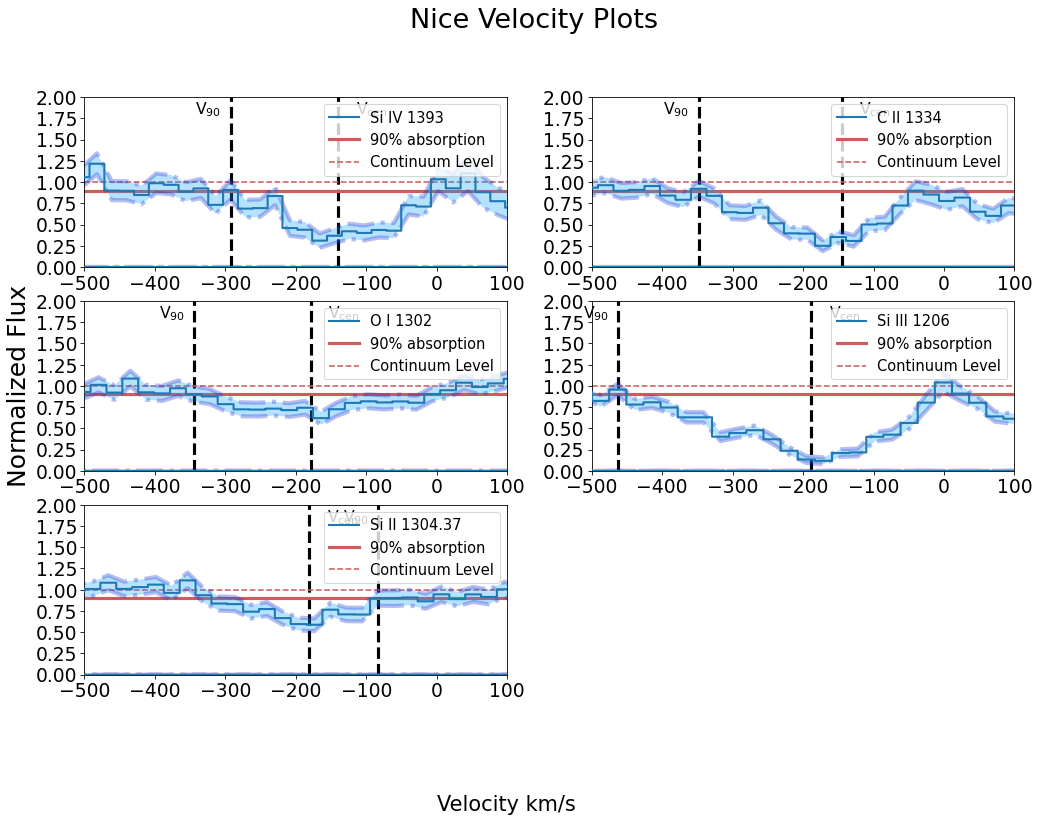

In [ ]:
small_line = ([1393.76,"Si IV 1393",.513],
              [1334.532,"C II 1334",.129],[1302.168,"O I 1302",5.2e-2],
            [1206.51,"Si III 1206",1.67],[1304.37,"Si II 1304.37",.797])
small_props = [SiIV_calc,CI_calc,O_calc,SiIII_calc,SiII_calc]
small_flux = [spline_siIVrange_ASK208,spline_CIrange_ASK208,spline_OIrange_ASK208,spline_siIIIrange_ASK208,spline_siIIrange_ASK208]
fig = plt.figure(figsize=(16,10))
fig.suptitle('Nice Velocity Plots', fontsize=26, y = 1)


for i in range(len(small_line)):
    line = (small_line[i][0])
    vel = c*(wave-line)/line
    xaxis,yaxis = vel,small_flux[i]
    z = i+1
    title = (small_line[i][1])
    #print (title)
    ax=fig.add_subplot(3,2,z)
    ax.plot(xaxis, yaxis, label = title ,drawstyle = 'steps-mid', linewidth= 2, zorder = 3)

    plt.fill_between(xaxis, yaxis-error, yaxis+error,
    alpha=0.3, edgecolor='#1B2ACC', facecolor='#089FFF',
    linewidth=4, linestyle='dashdot', antialiased=True)

    ax.axvline (x= small_props[i][0], color = 'black', linewidth = '3', zorder = 0, linestyle='--')
    ax.axvline (x=small_props[i][1], color = 'black', linewidth = '3',  zorder = 0, linestyle='--')
    plt.text(small_props[i][1] +25,1.8,r'$\rm V_{\rm cen}$', fontsize = txt_size)
    plt.text(small_props[i][0] - 50,1.8,r'$\rm V_{\rm 90}$', fontsize = txt_size)
    if i == 2:
        ax.set_ylabel("Normalized Flux", fontsize = axis_fontsz)
        plt.text(1,-4,'Velocity km/s', fontsize = 20)

    plt.yticks(fontsize=ticksz)
    plt.xticks(fontsize=ticksz)
    ax.set_xlim([-500,100])
    ax.set_ylim([.0,2])
    ax.axhline (y=.9,color = '#CD5C5C', label = '90% absorption ', linewidth = 3, zorder = 0)
    ax.axhline(y=1, color = '#CD5C5C', linestyle = 'dashed', label = "Continuum Level", zorder = 0)
    leg = ax.legend(prop={"size":legsize}, loc = 1)
    #ax.set_title(title, fontsize =35)
plt.tight_layout()
#plt.savefig("Figure3 All Vel for 1 Gal")
plt.show()


In [ ]:

error_MC = np.zeros(3276)
trialcount = (1000)
allresults = np.empty(0)

print ('Si IV \/')
testSi_IV = MC_Spline(x0,(100,-500),siIVrange_ASK208,1)
print ('C I \/')
testCI = MC_Spline(x4,(100,-550),CIrange_ASK208,1)
print ('Si III \/')
testSi_III = MC_Spline(x8,(100,-600),siIIIrange_ASK208,1)
print ('OI \/')
testO_I = MC_Spline(x7,(100,-600),OIrange_ASK208,1)
print ('Si II \/')
testSi_II = MC_Spline(x3,(200,-400),siIIrange_ASK208,1)




errOI = (np.absolute((1/np.log10(10))*(([testO_I[1]][0])/([testO_I[0]][0]))))
errSi_III2 = (np.absolute((1/np.log(10))*((testSi_III[1])/(testSi_III[0]))))
errSi_II = (np.absolute((1/np.log(10))*((testSi_II[1])/(testSi_II[0]))))
errSi_IV = (np.absolute((1/np.log10(10))*(([testSi_IV[1]][0])/([testSi_IV[0]][0]))))


#Take Values of Interest in order of [EW,v90] Si IV,Si III, Si II, O I
Ask208_v90=[ np.log10(np.absolute(testSi_IV[0])),np.log10(np.absolute(testSi_III[0])),np.log10(np.absolute(testSi_II[0])),np.log10(np.absolute(testO_I[0]))]
Ask208_error=[errSi_IV,errSi_III2,errSi_II,errOI,testSi_IV[5],testSi_IV[5],testSi_II[5],testO_I[5]]
Ask208_EW= [testSi_IV[4],testSi_III[4],testSi_II[4],testO_I[4]]
#EW error values are in the error array 4-7 in the same order as v90

Ask208_plot = [Ask208_v90,Ask208_EW,Ask208_error]
print ("Overleaf Copy and Paste")
print (int(testO_I[0]), u"\u00B1",int(testO_I[1]),"&",
       int(testSi_II[0]), u"\u00B1",int(testSi_II[1]),"&",
       int(testSi_III[0]), u"\u00B1",int(testSi_III[1]),"&",
       int(testSi_IV[0]), u"\u00B1",int(testSi_IV[1]),"&",
       int(testCI[0]), u"\u00B1",int(testCI[1]))
print ("V-cen")
print (int(testO_I[2]), u"\u00B1",int(testO_I[3]),"&",
       int(testSi_II[2]), u"\u00B1",int(testSi_II[3]),"&",
       int(testSi_III[2]), u"\u00B1",int(testSi_III[3]),"&",
       int(testSi_IV[2]), u"\u00B1",int(testSi_IV[3]),"&",
       int(testCI[2]), u"\u00B1",int(testCI[3]))

#print (int(testO_I[2]), u"\u00B1",testO_I[3],"&",int(testSi_II[2]), u"\u00B1",testSi_II[3],"&",int(testSi_III[2]), u"\u00B1",testSi_III[3],"&",int(testSi_IV[2]), u"\u00B1",testSi_IV[3],"&",int(testCI[2]), u"\u00B1",testCI[3])
print("EW")
print (np.round(testO_I[4],decimals = 3), u"\u00B1",(np.round(testO_I[5],decimals = 3)),"&",
       (np.round(testSi_II[4],decimals = 3)), u"\u00B1",(np.round(testSi_II[5],decimals = 3)),"&",
       (np.round(testSi_III[4],decimals = 3)), u"\u00B1",(np.round(testSi_III[5],decimals = 3)),"&",
       (np.round(testSi_IV[4],decimals = 3)), u"\u00B1",(np.round(testSi_IV[5],decimals = 3)),"&",
       (np.round(testCI[4],decimals = 3)), u"\u00B1",(np.round(testCI[5],decimals = 3)))
#print (testO_I[4], u"\u00B1",testO_I[5],"&",testSi_II[4], u"\u00B1",testSi_II[5],"&",testSi_III[4], u"\u00B1",testSi_III[5],"&",testSi_IV[4], u"\u00B1",testSi_IV[5],"&",testCI[4], u"\u00B1",testCI[5])
#print ("EW Ratio")


print ("& Si II/O I  &  Si IV/O I &  Si IV/Si II  & Si IV/Si III")




print ("&", errorpropdiv(testSi_II[4],testO_I[4],testSi_II[5],testO_I[5]),
                         "&" ,errorpropdiv(testSi_IV[4],testO_I[4],testSi_IV[5],testO_I[5]),
                         "&",errorpropdiv(testSi_IV[4],testSi_II[4],testSi_IV[5],testSi_II[5]),
                         "&",errorpropdiv(testSi_IV[4],testSi_III[4],testSi_IV[5],testSi_III[5]))

Ask208_OverV90 = (int(testO_I[0]), u"\u00B1",int(testO_I[1]),"&",
       int(testSi_II[0]), u"\u00B1",int(testSi_II[1]),"&",
       int(testSi_III[0]), u"\u00B1",int(testSi_III[1]),"&",
       int(testSi_IV[0]), u"\u00B1",int(testSi_IV[1]),"&",
       int(testCI[0]), u"\u00B1",int(testCI[1]))
Ask208_OverVcen = (int(testO_I[0]), u"\u00B1",int(testO_I[1]),"&",
       int(testSi_II[0]), u"\u00B1",int(testSi_II[1]),"&",
       int(testSi_III[0]), u"\u00B1",int(testSi_III[1]),"&",
       int(testSi_IV[0]), u"\u00B1",int(testSi_IV[1]),"&",
       int(testCI[0]), u"\u00B1",int(testCI[1]))
Ask208_OverEW = (np.round(testO_I[4],decimals = 3), u"\u00B1",(np.round(testO_I[5],decimals = 3)),"&",
       (np.round(testSi_II[4],decimals = 3)), u"\u00B1",(np.round(testSi_II[5],decimals = 3)),"&",
       (np.round(testSi_III[4],decimals = 3)), u"\u00B1",(np.round(testSi_III[5],decimals = 3)),"&",
       (np.round(testSi_IV[4],decimals = 3)), u"\u00B1",(np.round(testSi_IV[5],decimals = 3)),"&",
       (np.round(testCI[4],decimals = 3)), u"\u00B1",(np.round(testCI[5],decimals = 3)))
Ask208_EWratio = ("&", errorpropdiv(testSi_II[4],testO_I[4],testSi_II[5],testO_I[5]),
                         "&" ,errorpropdiv(testSi_IV[4],testO_I[4],testSi_IV[5],testO_I[5]),
                         "&",errorpropdiv(testSi_IV[4],testSi_II[4],testSi_IV[5],testSi_II[5]),
                         "&",errorpropdiv(testSi_IV[4],testSi_III[4],testSi_IV[5],testSi_III[5]))

Si IV \/
1
C I \/
1
Si III \/
1
OI \/
1
Si II \/
1
Overleaf Copy and Paste
-244 ± 128 & -190 ± 116 & -463 ± 32 & -288 ± 48 & -360 ± 35
V-cen
-202 ± 19 & -147 ± 17 & -191 ± 7 & -155 ± 13 & -160 ± 9
EW
0.489 ± 0.09 & 0.463 ± 0.058 & 1.127 ± 0.049 & 0.895 ± 0.081 & 0.928 ± 0.056
& Si II/O I  &  Si IV/O I &  Si IV/Si II  & Si IV/Si III
& 0.946±0.17 & 1.83±0.287 & 1.934±0.24 & 0.794±0.081


# NGC6090



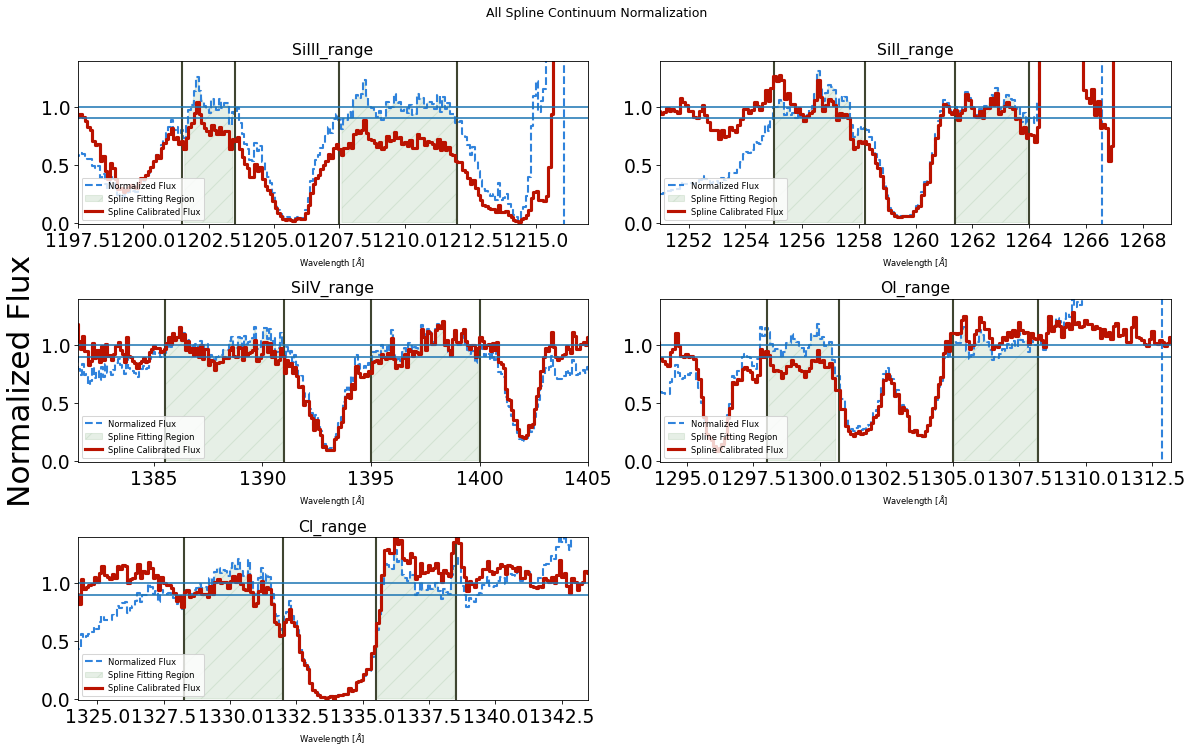

In [ ]:

#Master goes in the order of flux,wave,cont,error
def MC_Spline2(transition,vrange):
    v90_out = np.empty(0)
    vcen_out = np.empty(0)
    ew_out = np.empty(0)
    allresults = np.empty(0)

    for testtrial in range(trialcount):
        testerror1 = np.random.normal(error_MC,error, size=np.size(error))
        fluxMClooped1 = flux+testerror1
        fluxMClooped = fluxMClooped1/cont
        testout = v90calc(wave,fluxMClooped,transition,vrange)
        v90_out = np.append(v90_out,testout[0])
        vcen_out = np.append(vcen_out,testout[1])
        ew_out = np.append(ew_out,testout[2])
    truev90 = v90_out.mean()
    v90_err = (v90_out.std())
    truevcen = vcen_out.mean()
    vcen_err = (vcen_out.std())
    trueew = ew_out.mean()
    ew_err = (ew_out.std())
    allout = truev90,v90_err,truevcen,vcen_err,trueew,ew_err
    return allout
[error,flux,wave,cont ]= [NGC6090_master[3],NGC6090_master[0],NGC6090_master[1],NGC6090_master[2]]
[siIIIrange_NGC6090,siIIrange_NGC6090,siIVrange_NGC6090,OIrange_NGC6090,CIrange_NGC6090 ]= [ (1201.5,1203.5,1207.5,1212) ,(1255,1258.2,1261.4,1264),
                                                                                            (1385.5,1391,1395,1400), (1298,1300.7,1305,1308.2), (1328.25,1332,1335.5,1338.5)]
#print (wave.min())
##print (wave.max())
#print (wave)
FC = flux/cont


toplot = (siIIIrange_NGC6090,siIIrange_NGC6090 ,siIVrange_NGC6090 ,OIrange_NGC6090   ,CIrange_NGC6090   )
toplotname = ('SiIII_range','SiII_range' ,'SiIV_range' ,'OI_range'   ,'CI_range'   )
fig = plt.figure(figsize=(16,10))
fig.suptitle('All Spline Continuum Normalization', fontsize=12, y =1)

spline_siIIIrange_NGC6090 = splinefit(siIIIrange_NGC6090)
spline_siIIrange_NGC6090  = splinefit(siIIrange_NGC6090 )
spline_siIVrange_NGC6090= splinefit(siIVrange_NGC6090 )
spline_OIrange_NGC6090= splinefit(OIrange_NGC6090)
spline_CIrange_NGC6090= splinefit(CIrange_NGC6090)

for i in range (len(toplot)):
    z = i+1
    cutoff = toplot[i]
    ax=fig.add_subplot(3,2,z)

    if i == 3 or i ==0 or i ==2 or i == 4 or i ==1:
      cont_region = ((wave > cutoff[0]) & (wave < cutoff[1])) | ((wave > cutoff[2]) & (wave < cutoff[3]))
      spline_med= UnivariateSpline(wave[cont_region], FC[cont_region])
      spline_fit= spline_med(wave)
      flux_cont = FC/spline_fit
      ax.plot(wave, flux_cont,'--',drawstyle = 'steps-mid'
             , label="Normalized Flux", linewidth = 2, color = '#3083DC')
      ax.fill_between(wave, flux_cont, 0,where = (cont_region),facecolor="orange",color='#84B082',alpha=0.2 , hatch = '/', label = "Spline Fitting Region")
      plt.axvline(x=( cutoff[0]), color='#3F4531',linewidth = 2)
      plt.axvline(x=( cutoff[1]), color='#3F4531',linewidth = 2)
      plt.axvline(x=( cutoff[2]), color = '#3F4531',linewidth = 2)
      plt.axvline(x=( cutoff[3]), color = '#3F4531',linewidth = 2)


    ax.plot(wave, FC,'-',drawstyle = 'steps-mid', color='#BA1200', label = "Spline Calibrated Flux", linewidth= 3 )
    flux_cont = splinefit(cutoff)
    plt.axhline(y=1)
    xlim1,xlim2 =   ( cutoff[0] -4),  (cutoff[3]+5)
    ax.set_xlim(xlim1,xlim2)
    ax.set_ylim(-.01,1.4)
    ax.set_xlabel(r'Wavelength [$\AA$] ',fontdict = {'fontsize' :8} )
    if i == 2:
        ax.set_ylabel("Normalized Flux", fontsize = 30)
    ax.tick_params(axis='x', labelsize=ticksz)
    ax.tick_params(axis='y', labelsize=ticksz)
    plt.axhline(y=.9)
    leg = ax.legend(prop={"size":8}, loc = 3)
    ax.set_title(toplotname[i], fontsize =15)
    #plt.axvline(x=MWlines[2], color = "black", linestyle = '--', label = "MW 1193 line")
    plt.tight_layout()
#plt.savefig(f"{images_dir}/NGC6090 V90 SplineFits.png", dpi = 500)
plt.show()

In [ ]:


SiIV_calc = v90calc(wave,spline_siIVrange_NGC6090,x0,(430,-680))
print ("SiIV V90,Wvel,EW",SiIV_calc)
CI_calc = v90calc(wave,spline_CIrange_NGC6090,x4,(300,-810))
print ("Carbon 1334 V90,Wvel,EW:", CI_calc)

SiII_calc = v90calc(wave,FC,x6,(300,-680))
print ("Si II 1260 v90:",SiII_calc)

O_calc = v90calc(wave,spline_OIrange_NGC6090,x7,(150,-570) )
print ("Oxygen 1302 v90:",O_calc)

SiIII_calc = v90calc(wave,spline_siIIIrange_NGC6090,x8,(430,-1078))
print ("SiIII 1206 v90:",SiIII_calc)

SiIV V90,Wvel,EW [-480.5418436459668, -150.84865768820285, 1.7914654772971699]
Carbon 1334 V90,Wvel,EW: [-659.1509233199371, -145.0575753248332, 2.8458554408510732]
Si II 1260 v90: [-661.8508116342085, -235.13003268578296, 2.0607565112845543]
Oxygen 1302 v90: [-403.6668079694352, -134.08231152687327, 1.1672934456015707]
SiIII 1206 v90: [-716.2062477725257, -231.6462391383946, 2.306365021372953]


<ipython-input-43-e92b8c013f59>:40: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


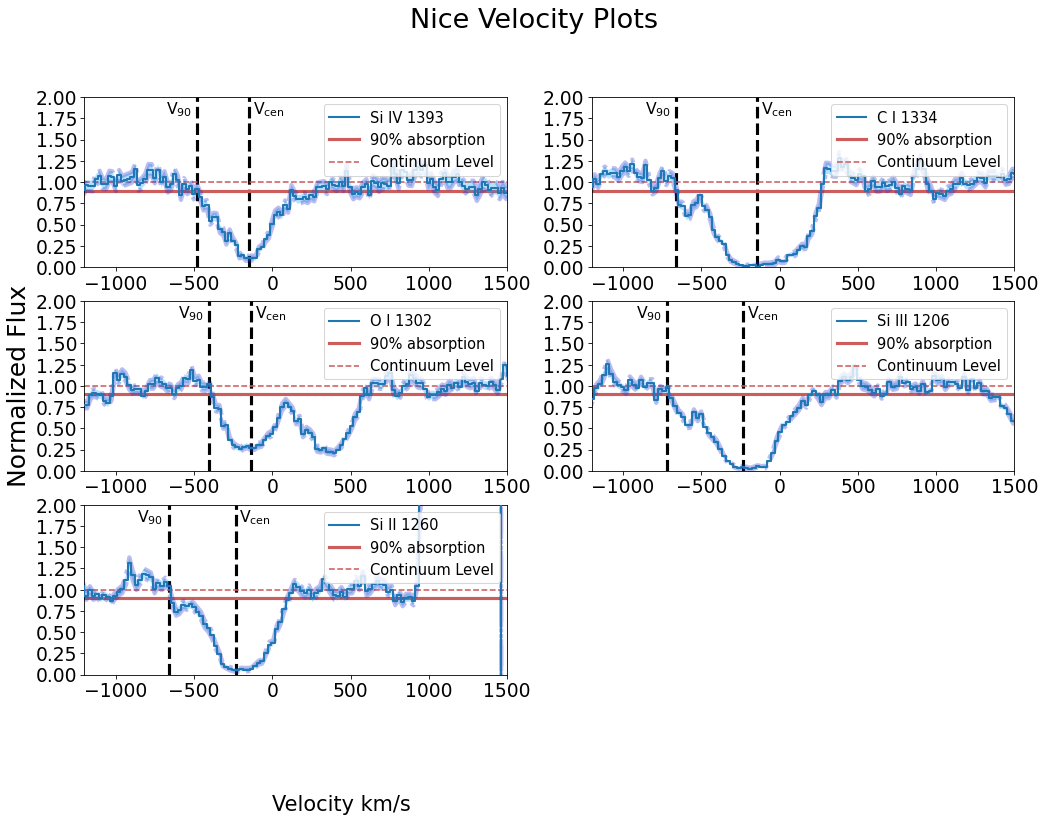

In [ ]:
small_line = ([1393.76,"Si IV 1393",.513],
              [1334.532,"C I 1334",.129],[1302.168,"O I 1302",5.2e-2],
            [1206.51,"Si III 1206",1.67],[1260.42,"Si II 1260",.797])
small_props = [SiIV_calc,CI_calc,O_calc,SiIII_calc,SiII_calc]
small_flux = [spline_siIVrange_NGC6090,spline_CIrange_NGC6090,spline_OIrange_NGC6090,spline_siIIIrange_NGC6090,spline_siIIrange_NGC6090]
fig = plt.figure(figsize=(16,10))
fig.suptitle('Nice Velocity Plots', fontsize=26, y = 1)


for i in range(len(small_line)):
    line = (small_line[i][0])
    vel = c*(wave-line)/line
    xaxis,yaxis = vel,small_flux[i]
    z = i+1
    title = (small_line[i][1])
    #print (title)
    ax=fig.add_subplot(3,2,z)
    ax.plot(xaxis, yaxis, label = title ,drawstyle = 'steps-mid', linewidth= 2, zorder = 3)

    plt.fill_between(xaxis, yaxis-error, yaxis+error,
    alpha=0.3, edgecolor='#1B2ACC', facecolor='#089FFF',
    linewidth=4, linestyle='dashdot', antialiased=True)
    v90pos = small_props[i][0]
    ax.axvline (x= small_props[i][0], color = 'black', linewidth = '3', zorder = 0, linestyle='--')
    ax.axvline (x=small_props[i][1], color = 'black', linewidth = '3',  zorder = 0, linestyle='--')
    plt.text(small_props[i][1] +25,1.8,r'$\rm V_{\rm cen}$', fontsize = txt_size)
    plt.text((v90pos - 200),1.8,r'$\rm V_{\rm 90}$', fontsize = txt_size)
    if i == 2:
        ax.set_ylabel("Normalized Flux", fontsize = axis_fontsz)
        plt.text(1,-4,'Velocity km/s', fontsize = 20)

    plt.yticks(fontsize=ticksz)
    plt.xticks(fontsize=ticksz)
    ax.set_xlim([-1200,1500])
    ax.set_ylim([.0,2])
    ax.axhline (y=.9,color = '#CD5C5C', label = '90% absorption ', linewidth = 3, zorder = 0)
    ax.axhline(y=1, color = '#CD5C5C', linestyle = 'dashed', label = "Continuum Level", zorder = 0)
    leg = ax.legend(prop={"size":legsize}, loc = 1)
    #ax.set_title(title, fontsize =35)
plt.tight_layout()
#plt.savefig(f"{images_dir}/NGC6090 V90 Plots.png", dpi = 500)

plt.show()


In [ ]:

error_MC = np.zeros(3110)
trialcount = (1000)
allresults = np.empty(0)
histplot = 0
#Put troublesome ones here and test
#testSi_IV = MC_Spline(x0,(430,-700),siIVrange_NGC6090,1)
#testSi_II = MC_Spline2(x6,(300,-800))
testSi_II = MC_Spline(x6,(100,-780),siIIrange_NGC6090,1)





testO_I = MC_Spline(x7,(150,-650),OIrange_NGC6090,1)
print ('Si IV \/')
testSi_IV = MC_Spline(x0,(430,-680),siIVrange_NGC6090,1)
print ('C I \/')
testCI = MC_Spline(x4,(300,-750),CIrange_NGC6090,1)
print ('Si II \/')
#testSi_II = MC_Spline2(x6,(300,-750))
#print ('Si III \/')
testSi_III = MC_Spline(x8,(430,-860),siIIIrange_NGC6090,1)
print ('OI \/')
#testO_I = MC_Spline(x7,(100,-600),OIrange_NGC6090,1)
#testSi_III = [1,1,1,1,1,1,1,1,1,1,1]


errOI = (np.absolute((1/np.log10(10))*(([testO_I[1]][0])/([testO_I[0]][0]))))
errSi_III2 = (np.absolute((1/np.log(10))*((testSi_III[1])/(testSi_III[0]))))
errSi_II = (np.absolute((1/np.log(10))*((testSi_II[1])/(testSi_II[0]))))
errSi_IV = (np.absolute((1/np.log10(10))*(([testSi_IV[1]][0])/([testSi_IV[0]][0]))))


#Take Values of Interest in order of [EW,v90] Si IV,Si III, Si II, O I
NGC6090_v90=[ np.log10(np.absolute(testSi_IV[0])),np.log10(np.absolute(testSi_III[0])),np.log10(np.absolute(testSi_II[0])),np.log10(np.absolute(testO_I[0]))]
NGC6090_error=[errSi_IV,errSi_III2,errSi_II,errOI,testSi_IV[5],testSi_IV[5],testSi_II[5],testO_I[5]]
NGC6090_EW= [testSi_IV[4],testSi_III[4],testSi_II[4],testO_I[4]]
#EW error values are in the error array 4-7 in the same order as v90

NGC6090_plot = [NGC6090_v90,NGC6090_EW,NGC6090_error]
print ("Overleaf Copy and Paste")
print (int(testO_I[0]), u"\u00B1",int(testO_I[1]),"&",
       int(testSi_II[0]), u"\u00B1",int(testSi_II[1]),"&",
       int(testSi_III[0]), u"\u00B1",int(testSi_III[1]),"&",
       int(testSi_IV[0]), u"\u00B1",int(testSi_IV[1]),"&",
       int(testCI[0]), u"\u00B1",int(testCI[1]))
print ("V-cen")
print (int(testO_I[2]), u"\u00B1",int(testO_I[3]),"&",
       int(testSi_II[2]), u"\u00B1",int(testSi_II[3]),"&",
       int(testSi_III[2]), u"\u00B1",int(testSi_III[3]),"&",
       int(testSi_IV[2]), u"\u00B1",int(testSi_IV[3]),"&",
       int(testCI[2]), u"\u00B1",int(testCI[3]))

#print (int(testO_I[2]), u"\u00B1",testO_I[3],"&",int(testSi_II[2]), u"\u00B1",testSi_II[3],"&",int(testSi_III[2]), u"\u00B1",testSi_III[3],"&",int(testSi_IV[2]), u"\u00B1",testSi_IV[3],"&",int(testCI[2]), u"\u00B1",testCI[3])
print("EW")
print (np.round(testO_I[4],decimals = 3), u"\u00B1",(np.round(testO_I[5],decimals = 3)),"&",
       (np.round(testSi_II[4],decimals = 3)), u"\u00B1",(np.round(testSi_II[5],decimals = 3)),"&",
       (np.round(testSi_III[4],decimals = 3)), u"\u00B1",(np.round(testSi_III[5],decimals = 3)),"&",
       (np.round(testSi_IV[4],decimals = 3)), u"\u00B1",(np.round(testSi_IV[5],decimals = 3)),"&",
       (np.round(testCI[4],decimals = 3)), u"\u00B1",(np.round(testCI[5],decimals = 3)))
#print (testO_I[4], u"\u00B1",testO_I[5],"&",testSi_II[4], u"\u00B1",testSi_II[5],"&",testSi_III[4], u"\u00B1",testSi_III[5],"&",testSi_IV[4], u"\u00B1",testSi_IV[5],"&",testCI[4], u"\u00B1",testCI[5])
#print ("EW Ratio")


print ("& Si II/O I  &  Si IV/O I &  Si IV/Si II  & Si IV/Si III")




print ("&", errorpropdiv(testSi_II[4],testO_I[4],testSi_II[5],testO_I[5]),
                         "&" ,errorpropdiv(testSi_IV[4],testO_I[4],testSi_IV[5],testO_I[5]),
                         "&",errorpropdiv(testSi_IV[4],testSi_II[4],testSi_IV[5],testSi_II[5]),
                         "&",errorpropdiv(testSi_IV[4],testSi_III[4],testSi_IV[5],testSi_III[5]))

NGC6090_OverV90 = (int(testO_I[0]), u"\u00B1",int(testO_I[1]),"&",
       int(testSi_II[0]), u"\u00B1",int(testSi_II[1]),"&",
       int(testSi_III[0]), u"\u00B1",int(testSi_III[1]),"&",
       int(testSi_IV[0]), u"\u00B1",int(testSi_IV[1]),"&",
       int(testCI[0]), u"\u00B1",int(testCI[1]))
NGC6090_OverVcen = (int(testO_I[0]), u"\u00B1",int(testO_I[1]),"&",
       int(testSi_II[0]), u"\u00B1",int(testSi_II[1]),"&",
       int(testSi_III[0]), u"\u00B1",int(testSi_III[1]),"&",
       int(testSi_IV[0]), u"\u00B1",int(testSi_IV[1]),"&",
       int(testCI[0]), u"\u00B1",int(testCI[1]))
NGC6090_OverEW = (np.round(testO_I[4],decimals = 3), u"\u00B1",(np.round(testO_I[5],decimals = 3)),"&",
       (np.round(testSi_II[4],decimals = 3)), u"\u00B1",(np.round(testSi_II[5],decimals = 3)),"&",
       (np.round(testSi_III[4],decimals = 3)), u"\u00B1",(np.round(testSi_III[5],decimals = 3)),"&",
       (np.round(testSi_IV[4],decimals = 3)), u"\u00B1",(np.round(testSi_IV[5],decimals = 3)),"&",
       (np.round(testCI[4],decimals = 3)), u"\u00B1",(np.round(testCI[5],decimals = 3)))
NGC6090_EWratio = ("&", errorpropdiv(testSi_II[4],testO_I[4],testSi_II[5],testO_I[5]),
                         "&" ,errorpropdiv(testSi_IV[4],testO_I[4],testSi_IV[5],testO_I[5]),
                         "&",errorpropdiv(testSi_IV[4],testSi_II[4],testSi_IV[5],testSi_II[5]),
                         "&",errorpropdiv(testSi_IV[4],testSi_III[4],testSi_IV[5],testSi_III[5]))

1
1
Si IV \/
1
C I \/
1
Si II \/
1
OI \/
Overleaf Copy and Paste
-397 ± 11 & -630 ± 53 & -712 ± 13 & -493 ± 27 & -647 ± 56
V-cen
-138 ± 5 & -221 ± 4 & -234 ± 6 & -149 ± 7 & -146 ± 2
EW
1.275 ± 0.089 & 1.82 ± 0.032 & 2.325 ± 0.047 & 1.881 ± 0.068 & 2.861 ± 0.027
& Si II/O I  &  Si IV/O I &  Si IV/Si II  & Si IV/Si III
& 1.427±0.115 & 1.475±0.128 & 1.034±0.045 & 0.809±0.039


# Skip for stats


In [ ]:
mydata_v90arr= ([CG274_v90[0],SBS0926_v90[0],Shoc22_v90[0],Ask208_v90[0],IC2779_v90[0]],
                [CG274_v90[1],SBS0926_v90[1],Shoc22_v90[1],Ask208_v90[1],IC2779_v90[1]],
                [CG274_v90[2],SBS0926_v90[2],Shoc22_v90[2],Ask208_v90[2],IC2779_v90[2]],
                [CG274_v90[3],SBS0926_v90[3],Shoc22_v90[3],Ask208_v90[3],IC2779_v90[3]])
mydata_ewarr= ([CG274_EW[0],SBS0926_EW[0],Shoc22_EW[0],Ask208_EW[0],IC2779_EW[0]],
                [CG274_EW[1],SBS0926_EW[1],Shoc22_EW[1],Ask208_EW[1],IC2779_EW[1]],
                [CG274_EW[2],SBS0926_EW[2],Shoc22_EW[2],Ask208_EW[2],IC2779_EW[2]],
                [CG274_EW[3],SBS0926_EW[3],Shoc22_EW[3],Ask208_EW[3],IC2779_EW[3]])
mydata_v90err= ([CG274_error[0],SBS0926_error[0],Shoc22_error[0],Ask208_error[0],IC2779_error[0]],
                [CG274_error[1],SBS0926_error[1],Shoc22_error[1],Ask208_error[1],IC2779_error[1]],
                [CG274_error[2],SBS0926_error[2],Shoc22_error[2],Ask208_error[2],IC2779_error[2]],
                [CG274_error[3],SBS0926_error[3],Shoc22_error[3],Ask208_error[3],IC2779_error[3]])
mydata_ewerr= ([CG274_error[4],SBS0926_error[4],Shoc22_error[4],Ask208_error[4],IC2779_error[4]],
                [CG274_error[5],SBS0926_error[5],Shoc22_error[5],Ask208_error[5],IC2779_error[5]],
                [CG274_error[6],SBS0926_error[6],Shoc22_error[6],Ask208_error[6],IC2779_error[6]],
                [CG274_error[7],SBS0926_error[7],Shoc22_error[7],Ask208_error[7],IC2779_error[7]])

#print ("Transition,"&",P_Initial,"&",P_Combined,"&",SigmaInital,"&",SigmaComb")
testSFRandV90 = TrendGetter4(johndata_sfr,johndata_v90,mydata_sfrarr,mydata_v90arr)

print ("Mass and V90")
#print (r"Transition,"&",P_Initial,"&",P_Combined,"&",SigmaInital,"&",SigmaComb")
testMassandV90 = TrendGetter4(johndata_mass,johndata_v90,mydata_massarr,mydata_v90arr)


print ("SFR and EW")
#print (r"Transition,"&",P_Initial,"&",P_Combined,"&",SigmaInital,"&",SigmaComb")
testSFRandEW = TrendGetter4(johndata_sfr,johndata_EW,mydata_sfrarr,mydata_ewarr)
print ("Mass and EW")

#print (r"Transition "&",P_Initial,"&",P_Combined,"&",SigmaInital,"&",SigmaComb")
testMassandEW = TrendGetter4(johndata_mass,johndata_EW,mydata_massarr,mydata_ewarr)
mydata_sfrarr_lin = [10**mydata_sfrarr[0],10**mydata_sfrarr[1],10**mydata_sfrarr[2],10**mydata_sfrarr[3],10**mydata_sfrarr[4]]
print (mydata_sfrarr_lin)
width = np.ptp(mydata_massarr)
height = np.ptp(mydata_sfrarr_lin)
johnmasstot = (10.5,10.9,10.7,10.6,10.1,10.6,10.5,9.9,10,10.9,7.2,10.6,10.9,9,9.2,9.1,8.5,8.5,6.9,9.5,9.9,9.5,8.8,10,9,10.3,10.4,10.3,10.6,10.1,10.3,10.1,10.7,9.8,9.3,10.6,9,10.9,9.5,10.6,10.9,9.4,9.5)
johnsfrtot = (13.59,50.83,25.15,13.37,26.45,71.15,60.4,22.07,20.28,136.82,0.02,3.65,90.64,0.13,0.24,0.34,0.48,0.48,0.02,3.72,0.99,5.12,0.23,2.55,0.28,9.17,11.82,28.63,46.6,12.21,12.97,61.07,58.47,13.03,3.6,20.73,0.86,16.71,5.69,41.08,21.27,26.2,22.4)
truejohnsfr = (np.log10(johnsfrtot))
Orig = [(testSFRandV90[1][-2]),((testMassandV90[1][-2])),((testSFRandEW[1][-2])),((testMassandEW[1][-2]))]
Orig1 = [(testSFRandV90[2][-2]),((testMassandV90[2][-2])),((testSFRandEW[2][-2])),((testMassandEW[2][-2]))]
Orig2 = [(testSFRandV90[3][-2]),((testMassandV90[3][-2])),((testSFRandEW[3][-2])),((testMassandEW[3][-2]))]
Orig3 = [(testSFRandV90[0][-2]),((testMassandV90[0][-2])),((testSFRandEW[0][-2])),((testMassandEW[0][-2]))]


Combined = [(testSFRandV90[1][-1]),((testMassandV90[1][-1])),((testSFRandEW[1][-1])),(testMassandEW[1][-1])]
Combined1 = [(testSFRandV90[2][-1]),((testMassandV90[2][-1])),((testSFRandEW[2][-1])),(testMassandEW[2][-1])]
Combined2= [(testSFRandV90[3][-1]),((testMassandV90[3][-1])),((testSFRandEW[3][-1])),((testMassandEW[3][-1]))]
Combined3 = [(testSFRandV90[0][-1]),((testMassandV90[0][-1])),((testSFRandEW[0][-1])),((testMassandEW[0][-1]))]



Mass and V90
SFR and EW
Mass and EW
[0.20000000199681048, 0.17999999999999997, 0.46, 0.3801893963205612, 0.16000000638979356]


# Figure 1 and 2: Mass & SFR sample + Flux/Cont plot


/usr/local/lib/python3.10/dist-packages/matplotlib/patches.py:3015: RuntimeWarning: invalid value encountered in double_scalars
  ddx, ddy = dx / dd, dy / dd


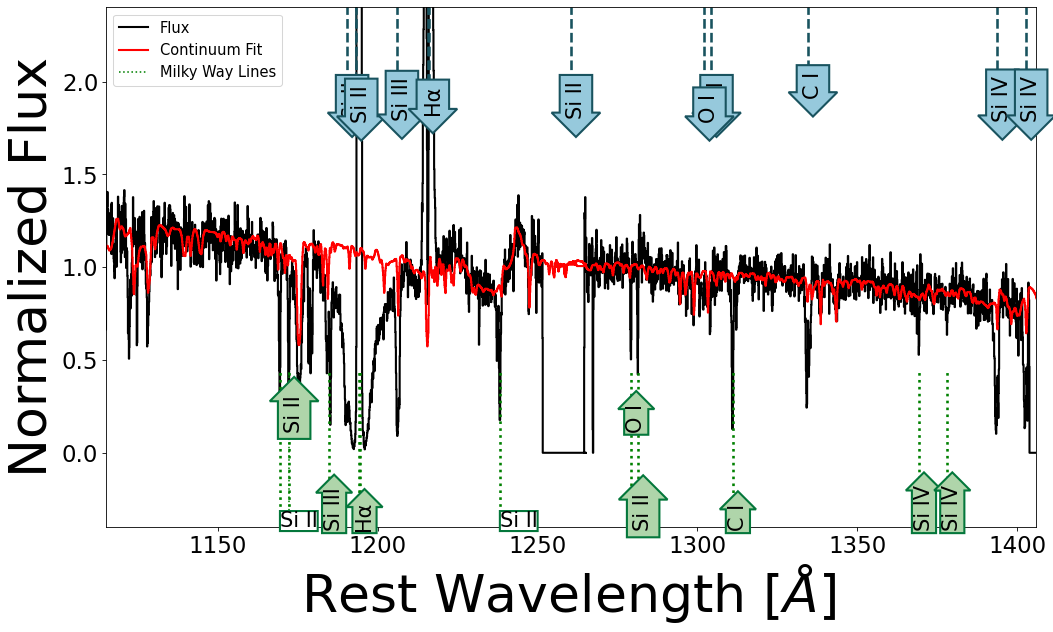

In [ ]:
small_line = ([1393.76,"Si IV 1393.755",.513],
              [1334.532,"C II 1334.532",.129],[1302.168,"O I 1302.168",5.2e-2],
            [1206.51,"Si III 1206.51",1.67],[1304.37,"Si II 1304.37",.797])

[error,flux,wave,cont ]= [Shoc22_master[3],Shoc22_master[0],Shoc22_master[1],Shoc22_master[2]]



txt_size2 = 20


fig = plt.figure(figsize=(16,9))
#plt.plot(wave,flux)
plt.plot(wave, flux,drawstyle = 'steps-mid', color = 'black', label = 'Flux', linewidth = 2)
plt.plot(wave, cont,drawstyle = 'steps-mid', color='red', label = 'Continuum Fit', linewidth = 2)

lines= np.array([1190.416, 1193.28, 1206, 1216,1215.67, 1260.42, 1302.168, 1304.37, 1334.532, 1393.76, 1402.770])
MWlines = lines/(1+.0179 )
#print (MWlines)
y_low = 1.2
testlow = .1

#Bottom
for MW in MWlines:
    plt.axvline(x=MW, color='green', ymin=0, ymax=0.3, linewidth = 2.5, linestyle = 'dotted')
    #plt.text(MW - 1.5,.01,int(MW), fontsize = txt_size2, rotation='vertical',
             ##bbox=dict(boxstyle="rarrow,pad=0.3", fc="#CD5C5C", ec="r", lw=2))
plt.axvline(x=MWlines[1], color='green', ymin=0, ymax=0.3, label = 'Milky Way Lines', linestyle = 'dotted')
toplinecolor = '#19535F'
#TOP
for VEL in lines:
    #print (VEL)
    plt.axvline(x=VEL, color=toplinecolor, ymin = 0.8, ymax = 1, linewidth = 2.5, linestyle = 'dashed')
    #plt.text(VEL-1.5,1.89,int(VEL), fontsize = txt_size2, rotation='vertical',
             #bbox=dict(boxstyle="larrow,pad=0.3", fc= arrowcolor, ec="b", lw=2))
plt.axvline(x=lines[1], color=toplinecolor, ymin = 0.8, ymax = 1, linestyle = 'dashed')



LineLabels = ['Si II', 'Si IV', 'Si III', 'C I', 'O I', 'H\u03B1']
#Dumb way to do it, but this is for the Vel Lines
arrowcolor ='#96C9DC'
topedgecolor = '#19535F'
bottomarrowcolor = '#AFD5AA'
bottomedgecolor= '#04773B'
stagger_top = 1.8
toplinecolor = '#19535F'
#Si II
top = 1.82
plt.text((lines[0])-1.5,top,LineLabels[0], fontsize = txt_size2, rotation='vertical',
             bbox=dict(boxstyle="larrow,pad=0.3",fc= arrowcolor, ec=topedgecolor, lw=2))
plt.text((lines[5])-1.5,top,LineLabels[0], fontsize = txt_size2, rotation='vertical',
             bbox=dict(boxstyle="larrow,pad=0.3", fc= arrowcolor, ec=topedgecolor, lw=2))
plt.text((lines[1])-1.5,stagger_top,LineLabels[0], fontsize = txt_size2, rotation='vertical',
             bbox=dict(boxstyle="larrow,pad=0.3", fc= arrowcolor, ec=topedgecolor, lw=2))
plt.text((lines[7])-1.5,top,LineLabels[0], fontsize = txt_size2, rotation='vertical',
             bbox=dict(boxstyle="larrow,pad=0.3", fc= arrowcolor, ec=topedgecolor, lw=2))


# Si III
plt.text((lines[2])-1.5,top-.01,LineLabels[2], fontsize = txt_size2, rotation='vertical',
             bbox=dict(boxstyle="larrow,pad=0.3", fc= arrowcolor, ec=topedgecolor, lw=2))
#Si IV
plt.text((lines[9])-1.5,top-.015,LineLabels[1], fontsize = txt_size2, rotation='vertical',
             bbox=dict(boxstyle="larrow,pad=0.3", fc= arrowcolor, ec=topedgecolor, lw=2))
plt.text((lines[10])-1.5,top-.015,LineLabels[1], fontsize = txt_size2, rotation='vertical',
             bbox=dict(boxstyle="larrow,pad=0.3", fc= arrowcolor, ec=topedgecolor, lw=2))
#O I
plt.text((lines[6])-1.5,stagger_top,LineLabels[4], fontsize = txt_size2, rotation='vertical',
             bbox=dict(boxstyle="larrow,pad=0.3", fc= arrowcolor, ec=topedgecolor, lw=2))
# C I
plt.text((lines[8])-1.5,1.93,LineLabels[3], fontsize = txt_size2, rotation='vertical',
             bbox=dict(boxstyle="larrow,pad=0.3", fc= arrowcolor, ec=topedgecolor, lw=2))
#Other
plt.text((lines[4])-1.5,top+.02,LineLabels[5], fontsize = txt_size2, rotation='vertical',
             bbox=dict(boxstyle="larrow,pad=0.3", fc= arrowcolor, ec=topedgecolor, lw=2))

#Still dumb but here is the MW contaminant lines
#Si II
bottom = -.4
stagger_bottom = .13
plt.text((MWlines[0]),bottom,LineLabels[0], fontsize = txt_size2, rotation='horizontal',
             bbox=dict(boxstyle="round,pad=0", fc= 'white', ec=bottomedgecolor, lw=2))


plt.text((MWlines[5]),bottom,LineLabels[0], fontsize = txt_size2, rotation='horizontal',
             bbox=dict(boxstyle="round,pad=0", fc= 'white', ec=bottomedgecolor, lw=2))


plt.text((MWlines[1])-1.5,stagger_bottom,LineLabels[0], fontsize = txt_size2, rotation='vertical',
             bbox=dict(boxstyle="rarrow,pad=0.3", fc= bottomarrowcolor, ec=bottomedgecolor, lw=2))
plt.text((MWlines[7])-1.5,bottom,LineLabels[0], fontsize = txt_size2, rotation='vertical',
             bbox=dict(boxstyle="rarrow,pad=0.3", fc= bottomarrowcolor, ec=bottomedgecolor, lw=2))

#widthB=1.0,lengthB=0.2,angleB=None

plt.annotate("",
            xy=((MWlines[0])-1.5, bottom), xycoords='axes fraction',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="bar"),
            )




#
#
#
#
#

# Si III
plt.text((MWlines[2])-1.5,bottom,LineLabels[2], fontsize = txt_size2, rotation='vertical',
             bbox=dict(boxstyle="rarrow,pad=0.1", fc= bottomarrowcolor, ec=bottomedgecolor, lw=2))
#Si IV
plt.text((MWlines[9])-1.5,bottom,LineLabels[1], fontsize = txt_size2, rotation='vertical',
             bbox=dict(boxstyle="rarrow,pad=0.1", fc= bottomarrowcolor, ec=bottomedgecolor, lw=2))
plt.text((MWlines[10])-1.5,bottom,LineLabels[1], fontsize = txt_size2, rotation='vertical',
             bbox=dict(boxstyle="rarrow,pad=0.1", fc= bottomarrowcolor, ec=bottomedgecolor, lw=2))
#O I
plt.text((MWlines[6])-1.5,stagger_bottom,LineLabels[4], fontsize = txt_size2, rotation='vertical',
             bbox=dict(boxstyle="rarrow,pad=0.1", fc= bottomarrowcolor, ec=bottomedgecolor, lw=2))
# C II
plt.text((MWlines[8])-1.5,bottom,LineLabels[3], fontsize = txt_size2, rotation='vertical',
             bbox=dict(boxstyle="rarrow,pad=0.1", fc= bottomarrowcolor, ec=bottomedgecolor, lw=2))
#Other
plt.text((MWlines[4])-1.5,bottom,LineLabels[5], fontsize = txt_size2, rotation='vertical',
             bbox=dict(boxstyle="rarrow,pad=0.1", fc= bottomarrowcolor, ec=bottomedgecolor, lw=2))



legsize = 16
plt.xlim(wave.min()+10,wave.max()-10)
plt.ylim(-0.4,2.4)
axis_fontszfig1 = 50
plt.xlabel(r'Rest Wavelength [$\AA$] ', fontsize = axis_fontszfig1)
plt.ylabel( 'Normalized Flux', fontsize = axis_fontszfig1)
plt.yticks(fontsize=ticksz+4)
plt.xticks(fontsize=ticksz+4)
#plt.legend()
leg = plt.legend(prop={"size":legsize-2}, loc = 0)


#images_dir = '/content/gdrive/MyDrive/Project'
#plt.savefig("/content/gdrive/MyDrive/Project")

#plt.savefig(f"{images_dir}/Fig1 shoc22.png", dpi = 500)


plt.show()

AttributeError: ignored

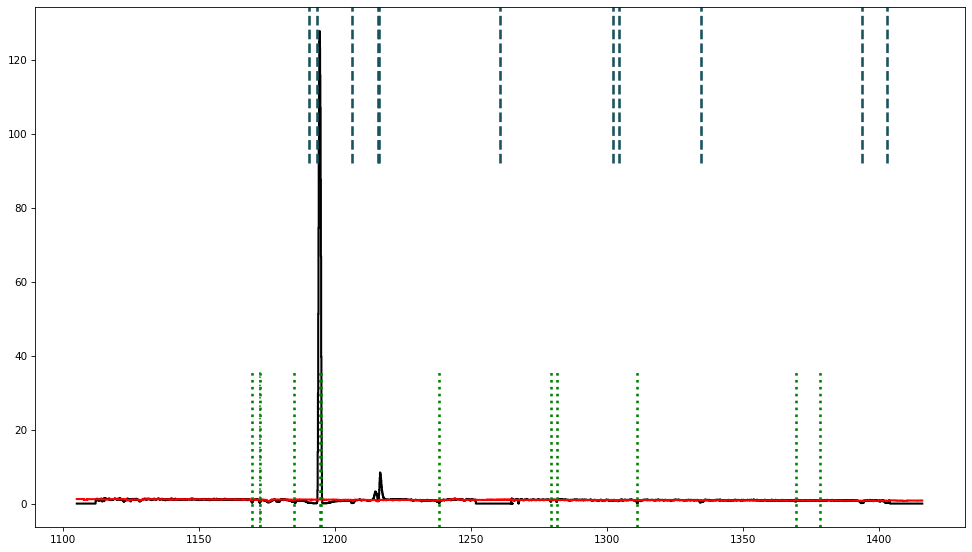

In [ ]:
[error,flux,wave,cont ]= [Shoc22_master[3],Shoc22_master[0],Shoc22_master[1],Shoc22_master[2]]
txt_size2 = 20
fig = plt.figure(figsize=(16,9))
plt.plot(wave, flux,drawstyle = 'steps-mid', color = 'black', label = 'Flux', linewidth = 2)
plt.plot(wave, cont,drawstyle = 'steps-mid', color='red', label = 'Continuum Fit', linewidth = 2)
#Bottom
def ArrowPlot(ln_num,edgeCOL,faceCOL,Location):
  plt.text((lines[ln_num]),Location,LineLabels[ln_num], fontsize = txt_size2, rotation='vertical',
             bbox=dict(boxstyle="larrow,pad=0.3", fc= faceCOL, ec=edgeCOL, lw=2))



for MW in MWlines:
    plt.axvline(x=MW, color='green', ymin=0, ymax=0.3, linewidth = 2.5, linestyle = 'dotted')
    #plt.text(MW - 1.5,.01,int(MW), fontsize = txt_size2, rotation='vertical',
             ##bbox=dict(boxstyle="rarrow,pad=0.3", fc="#CD5C5C", ec="r", lw=2))
plt.axvline(x=MWlines[1], color='green', ymin=0, ymax=0.3, label = 'Milky Way Lines', linestyle = 'dotted')
top =2.4
arrowtop = top-.25
#TOP
for VEL in lines:
    plt.axvline(x=VEL, color=toplinecolor, ymin = 0.7, ymax = 1, linewidth = 2.5, linestyle = 'dashed')
plt.axvline(x=lines[1], color=toplinecolor, ymin = 0.8, ymax = 1, Label = 'Target Galaxy Lines', linestyle = 'dashed')
#Dumb way to do it, but this is for the Vel Lines
#########################################################################################################################################################

stagger_top = 1.8
#Si II
ArrowPlot(2,toplinecolor,topedgecolor,arrowtop)


legsize = 16
plt.xlim(wave.min()+10,wave.max()-10)
plt.ylim(-0.4,top)
axis_fontszfig1 = 50
plt.xlabel(r'Rest Wavelength [$\AA$] ', fontsize = axis_fontszfig1)
plt.ylabel( 'Normalized Flux', fontsize = axis_fontszfig1)
plt.yticks(fontsize=ticksz+4)
plt.xticks(fontsize=ticksz+4)
#plt.legend()
leg = plt.legend(prop={"size":legsize-2}, loc = 0)


#images_dir = '/content/gdrive/MyDrive/Project'
#plt.savefig("/content/gdrive/MyDrive/Project")

#plt.savefig(f"{images_dir}/Fig1 shoc22.png", dpi = 500)


plt.show()

1.7900e+00
4.5864e-01
(-0.79588, 7.2)


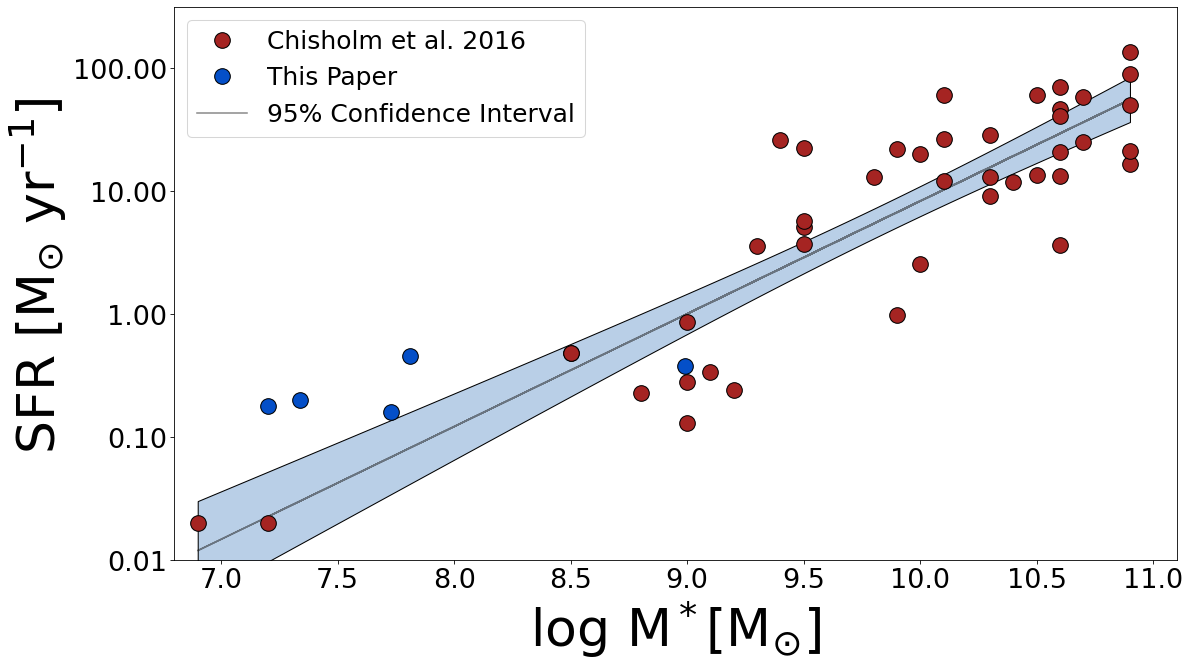

In [ ]:

fig = plt.figure(figsize=(16,9))
width = np.ptp(mydata_massarr)
height = np.ptp(mydata_sfrarr)
print (width)
print (height)
print ((np.min(mydata_sfrarr), np.min(mydata_massarr)))
np.min(mydata_sfrarr)
mksize = 30

ax1=fig.add_subplot(1,1,1)

ax1.plot(johnmasstot,truejohnsfr ,  '.', markersize= mksize
         ,label = "Chisholm et al. 2016 ",color = JohnGalColor, markeredgecolor=('black'), zorder = 3)

plt.ylabel(' SFR [M$_{\odot}$ yr$^{-1}}$]', fontsize= axis_fontszfig1)
plt.xlabel('log M$^*$[M$_{\odot}$]', fontsize= axis_fontszfig1)


ax1.set_xlim([6.8,11.1])
ax1.set_ylim(-2,2.5)
plt.yticks(fontsize=ticksz+8)
plt.xticks(fontsize=ticksz+8)
ax1.set_yticks([-2, -1, 0,1,2])
labelz = ('0.01','0.10','1.00','10.00', '100.00')
ax1.set_yticklabels(labelz)

ax1.plot(mydata_massarr, mydata_sfrarr,  '.', markersize= mksize
         ,label = "This Paper ",color = myGalColor, markeredgecolor=('black'), zorder = 3)



x = johnmasstot
y = truejohnsfr
p, cov = np.polyfit(x, y, 1, cov=True)                     # parameters and covariance from of the fit of 1-D polynom.
y_model = equation(p, x)                                   # model using the fit parameters; NOTE: parameters here are coefficients

# Statistics
n = truejohnsfr.size                                           # number of observations
m = p.size                                                 # number of parameters
dof = n - m                                                # degrees of freedom
t = stats.t.ppf(0.95, n - m)                              # t-statistic; used for CI and PI bands

# Estimates of Error in Data/Model
resid = y - y_model                                        # residuals; diff. actual data from predicted values
chi2 = np.sum((resid / y_model)**2)                        # chi-squared; estimates error in data
chi2_red = chi2 / dof                                      # reduced chi-squared; measures goodness of fit
s_err = np.sqrt(np.sum(resid**2) / dof)                    # standard deviation of the error

#ax.plot(
#    x, y, "o", color="#b9cfe7", markersize=8,
#    markeredgewidth=1, markeredgecolor="b", markerfacecolor="None"
#)

# Fit
ax1.plot(x, y_model, "-", color="0.1", linewidth=1.5, alpha=0.5, label="95% Confidence Interval")

x2 = np.linspace(np.min(x), np.max(x), 100)
y2 = equation(p, x2)

# Confidence Interval (select one)
plot_ci_manual(t, s_err, n, x, x2, y2)
#plot_ci_bootstrap(x, y, resid, ax=ax)



#plt.axhline (np.mean(mydata_sfrarr), color = '#e07a5f', linewidth = 3, zorder = 2,label = "Avg SFR & Mass")
#plt.axvline (np.mean(mydata_massarr),color = '#e07a5f', linewidth = 3, zorder = 2)




leg = ax1.legend(prop={"size":legsize+8}, loc = 2)


plt.tight_layout()
plt.savefig(f"{images_dir}/Fig2MassSFR.png", dpi = 300)

plt.show()

# Figure 3 and 4: Velocity of 1 gal and multiple gal


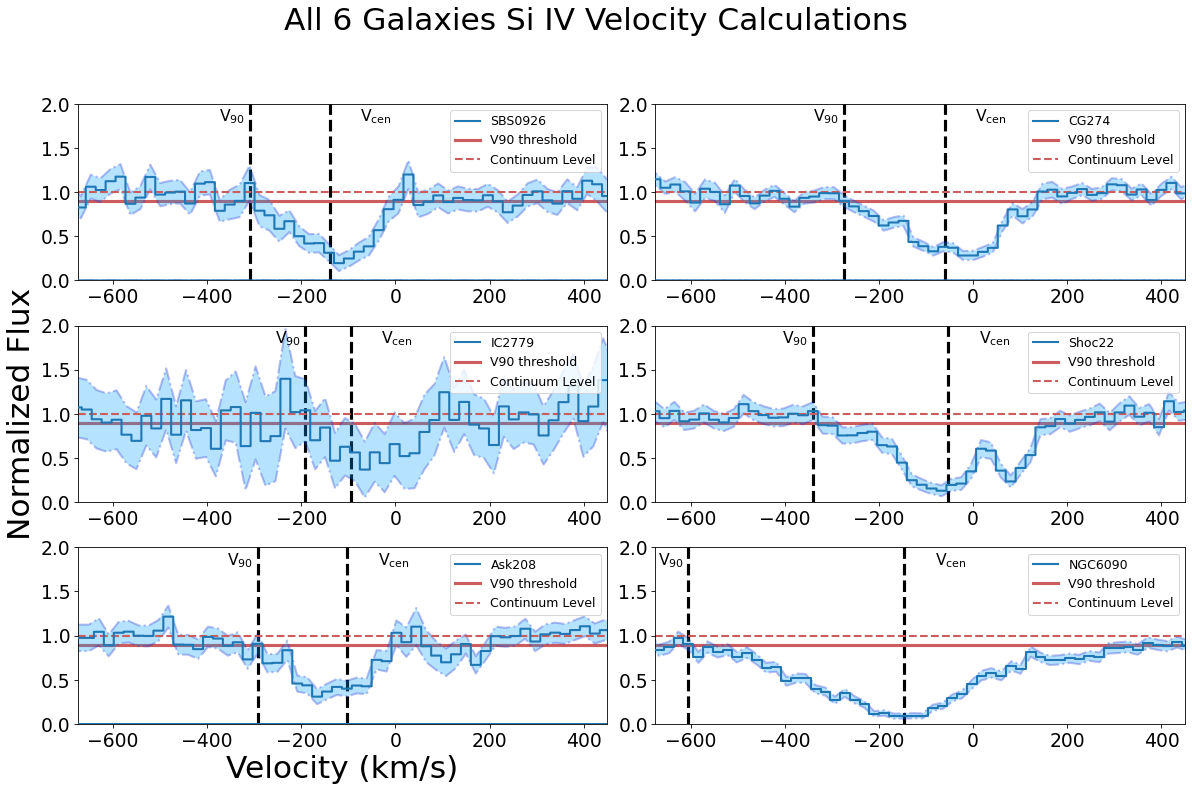

In [ ]:
#allfiles = ( SBS0926_master,CG274_master, IC2779_master,Shoc22_master,Ask208_master, NGC6090_master)

fig = plt.figure(figsize=(16,10))
#fig.suptitle('Velocity (km/s)', fontsize=30, y = 0)
fig.suptitle('All 6 Galaxies Si IV Velocity Calculations', fontsize=30, y = 1.05)

#spline_siIVrange_CG274
allarr = (SBS0926_SiIVrange,siIVrange_CG274,siIVrange_IC2779,siIVrange_Shoc22,siIVrange_ASK208)

toplotgalname = ('SBS0926','CG274','IC2779','Shoc22','Ask208','NGC6090')

for i in range (len(allfiles)):
    #print (i)
    currentgal = allfiles[i]
    error = currentgal[3]
    flux = currentgal[0]
    wave = currentgal[1]
    cont = currentgal[2]

    FC = flux/cont

    #the next 3 paramaters (Redshift, transition, and splinerange) need their own loading in
    #the main reason is because they do not take up as many rows as the other data
    #Z = pd.DataFrame(output, columns= ['Z'])
    #Transitions = pd.DataFrame(output, columns= ['Transitions'])
    #SplineRanges = pd.DataFrame(output, columns= ['SplineRanges'])

    #SplineRanges1=pd.DataFrame.to_numpy(SplineRanges)
    #print (splinefit(cutoffs))

# Spline Fitting
    z = i+1
    ax=fig.add_subplot(3,2,z)


#Velocity Calculations
    line = (x0)
    vel = c*(wave-line)/line
    #print (len(vel))


    title = (toplotgalname[i])
    if i <5:
        cutoff= (allarr[i])
        flux_cont = splinefit(cutoff)
        SiIV_calc = v90calc(wave,flux_cont,x0,(200,-400))
        xaxis,yaxis = vel,flux_cont
        ax.plot(xaxis, yaxis, label = title ,drawstyle = 'steps-mid', linewidth= 2, zorder = 3)

    #print (i)
    if i ==5:
        #print (len(flux))
        #print (len(cont))
        flux_cont = flux/cont
        SiIV_calc = v90calc(wave,flux_cont,x0,(430,-680))
        xaxis,yaxis = vel,flux_cont
        ax.plot(xaxis, yaxis, label = title ,drawstyle = 'steps-mid', linewidth= 2, zorder = 3)




    #ax.plot(xaxis, yaxis, label = title ,drawstyle = 'steps-mid', linewidth= 5.0, zorder = 3)
    ax.axhline (y=.9,color = '#CD5C5C', label = 'V90 threshold', linewidth = 3, zorder = 1)

    #print (SiIV_calc[0])
    vel90_line = SiIV_calc[0]
    velcen_line = SiIV_calc[1]
    #ax.axvline (x= velcen_line, color = '#77BA99', linewidth = '4.5', label= r'$\rm V_{\rm cen}$', zorder = 2)
    #ax.axvline (x=vel90_line, color = '#A96DA3', linewidth = '4.5', label= r'$\rm V_{\rm 90}$', zorder = 2)

    #Velocity vertical lines
    ax.axvline (x= vel90_line, color = 'black', linewidth = '3', zorder = 0, linestyle='--')
    ax.axvline (x=velcen_line, color = 'black', linewidth = '3',  zorder = 0, linestyle='--')
    plt.text(velcen_line +65,1.8,r'$\rm V_{\rm cen}$', fontsize = txt_size)
    plt.text(vel90_line - 65,1.8,r'$\rm V_{\rm 90}$', fontsize = txt_size)

    #error ribbons
    plt.fill_between(xaxis, yaxis-error, yaxis+error,
    alpha=0.3, edgecolor='#1B2ACC', facecolor='#089FFF',
    linewidth=2, linestyle='dashdot', antialiased=True)

    #axis titles
    if i == 2:
        ax.set_ylabel("Normalized Flux", fontsize = 30)
    if i == 4:
        #ax.xaxis.set_label_position('bottom')
        ax.set_xlabel("Velocity (km/s)", fontsize = 30)
    yticks = np.arange(0,2.5,.5)
    ax.set_xlim([-675,450])
    ax.set_ylim([.0,2])
    ax.axhline(y=1, color = '#CD5C5C', linestyle = 'dashed', label = "Continuum Level", linewidth = 2)
    plt.yticks(yticks,fontsize=ticksz)
    plt.xticks(fontsize=ticksz)
    #ax.set_ylabel("Normalized Flux", fontsize = 35)
    leg = ax.legend(prop={"size":12}, loc = 1,bbox_to_anchor=(1, 1) )
    #ax.set_title(title, fontsize =40)

plt.tight_layout()
#plt.savefig(f"{images_dir}/Figure4AllGal.png", dpi = 500)

#plt.tight_layout()
plt.show()

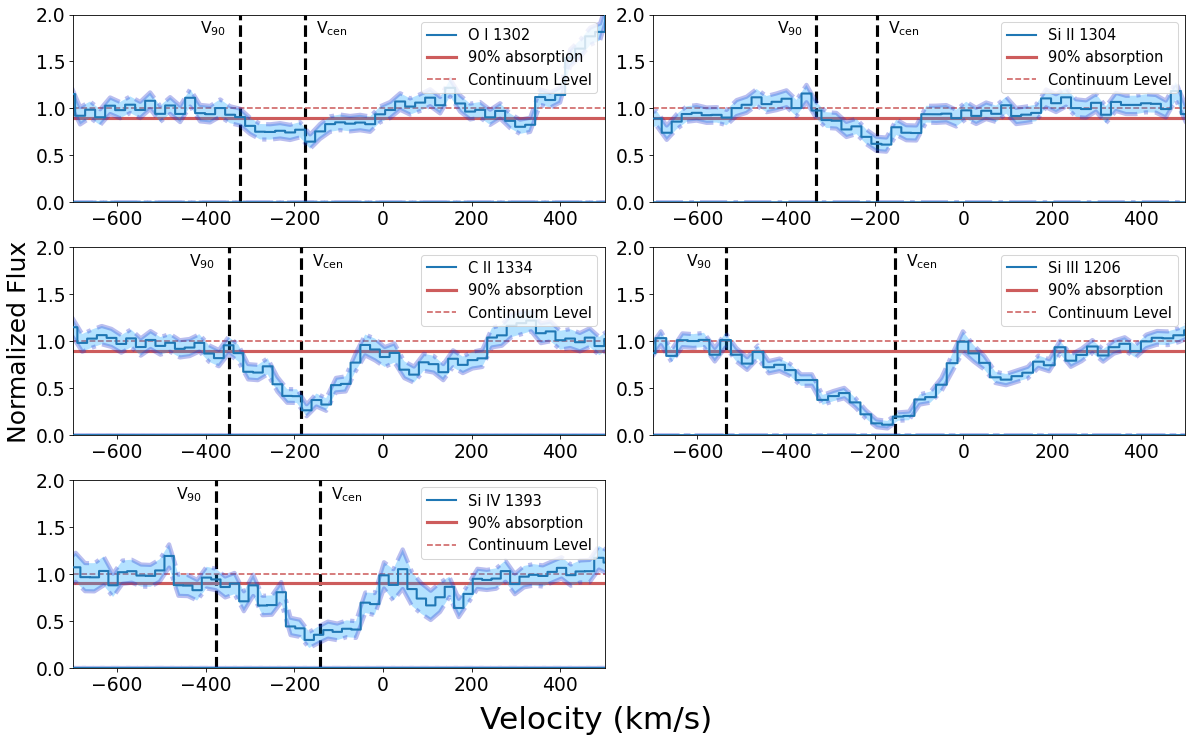

In [ ]:
small_line = ([1302.168,"O I 1302",5.2e-2],[1304.37,"Si II 1304",.797],
              [1334.532,"C II 1334",.129],[1206.51,"Si III 1206",1.67],
              [1393.76,"Si IV 1393",.513])

siIIIrange = (1200,1204,1208,1211)
#siIIrange  = (1190.8,1192.25,1194,1196)
siIIrange = (1301.8,1302.75,1304.2,1308.2)
siIVrange  = (1385,1391,1395,1398)
OIrange    = (1298,1300.6,1302,1304)
CIrange    = (1322.5,1333,1335.8,1338)
toplot = (OIrange,siIIrange ,siIIIrange    ,CIrange,siIVrange   )

toplotname = ('OI_range'   ,'siII_range'  ,'CII_range' ,'siIII_range','siIV_range'  )


error = Ask208_master[3]
flux = Ask208_master[0]
wave = Ask208_master[1]
cont = Ask208_master[2]
FC = flux/cont


fig = plt.figure(figsize=(16,10))
#fig.suptitle('Velocity (km/s)', fontsize=axis_fontsz, y = 0)
fig.suptitle('Velocity (km/s)', fontsize=30, y = 0)


spline_siIIIrange = splinefit(siIIIrange)
spline_siIIrange  = splinefit(siIIrange )
spline_siIVrange= splinefit(siIVrange )
spline_OIrange= splinefit(OIrange)
spline_CIrange= splinefit(CIrange)

SiIV_calc = v90calc(wave,spline_siIVrange,x0,(100,-400))
#print ("SiIV V90,Wvel,EW",SiIV_calc)
CI_calc = v90calc(wave,spline_CIrange,x4,(20,-400))
#print ("Carbon 1334 V90,Wvel,EW:", CI_calc)

SiII_calc = v90calc(wave,spline_siIIrange,x3,(-85,-400))
#print ("Si II 1304 v90:",SiII_calc)

O_calc = v90calc(wave,spline_OIrange,x7,(0,-400) )
#print ("Oxygen 1302 v90:",O_calc)

SiIII_calc = v90calc(wave,spline_siIIIrange,x8,(600,-700))
#print ("SiIII 1206 v90:",SiIII_calc)

small_props = [O_calc,SiII_calc,CI_calc,SiIII_calc,SiIV_calc]
small_flux = [spline_OIrange,spline_siIIrange,spline_CIrange,spline_siIIIrange,spline_siIVrange]




for i in range(len(small_line)):
    line = (small_line[i][0])
    vel = c*(wave-line)/line
    xaxis,yaxis = vel,small_flux[i]
    z = i+1
    title = (small_line[i][1])
    #print (title)
    ax=fig.add_subplot(3,2,z)
    ax.plot(xaxis, yaxis, label = title ,drawstyle = 'steps-mid', linewidth= 2, zorder = 3)

    plt.fill_between(xaxis, yaxis-error, yaxis+error,
    alpha=0.3, edgecolor='#1B2ACC', facecolor='#089FFF',
    linewidth=4, linestyle='dashdot', antialiased=True)

    ax.axvline (x= small_props[i][0], color = 'black', linewidth = '3', zorder = 0, linestyle='--')
    ax.axvline (x=small_props[i][1], color = 'black', linewidth = '3',  zorder = 0, linestyle='--')
    plt.text(small_props[i][1] +25,1.8,r'$\rm V_{\rm cen}$', fontsize = txt_size)
    plt.text(small_props[i][0] - 90,1.8,r'$\rm V_{\rm 90}$', fontsize = txt_size)
    if i == 2:
        ax.set_ylabel("Normalized Flux", fontsize = axis_fontsz)
        #plt.text(1,-3.5,'Velocity km/s', fontsize = 20)

    plt.yticks(yticks,fontsize=ticksz)
    plt.xticks(fontsize=ticksz)
    ax.set_xlim([-700,500])
    ax.set_ylim([.0,2])
    ax.axhline (y=.9,color = '#CD5C5C', label = '90% absorption ', linewidth = 3, zorder = 0)
    ax.axhline(y=1, color = '#CD5C5C', linestyle = 'dashed', label = "Continuum Level", zorder = 0)
    leg = ax.legend(prop={"size":legsize}, loc = 1)
    #ax.set_title(title, fontsize =35)
    plt.tight_layout()
plt.savefig("Figure3 All Vel for 1 Gal")
plt.show()

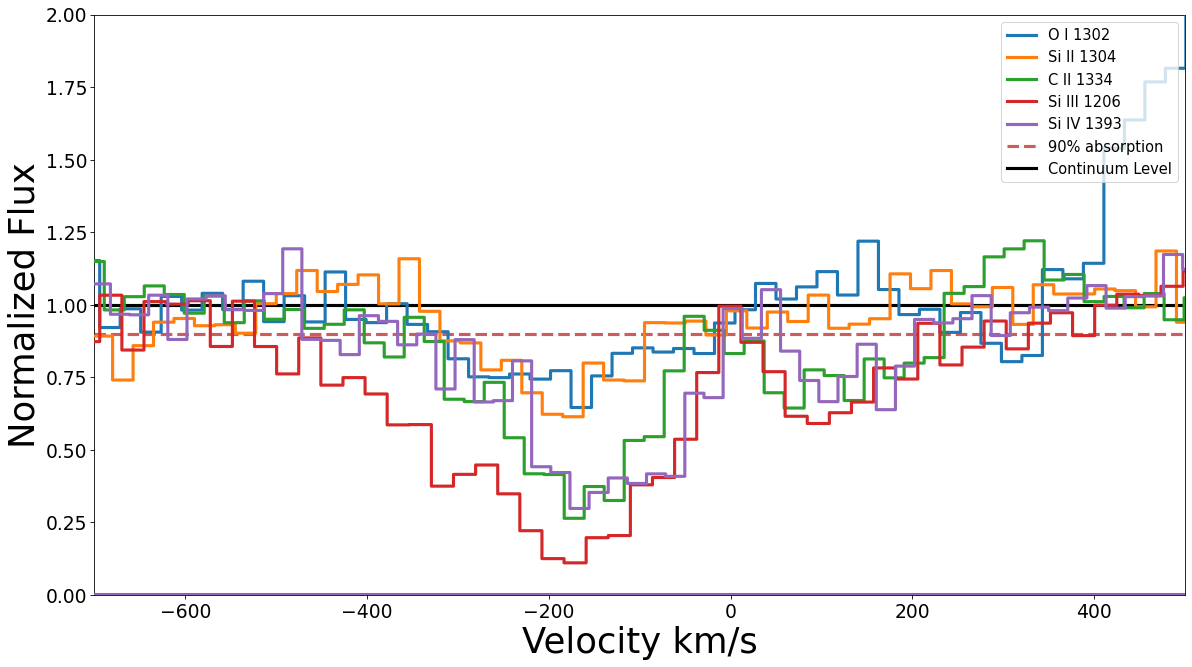

In [ ]:
small_line = ([1302.168,"O I 1302",5.2e-2],[1304.37,"Si II 1304",.797],
              [1334.532,"C II 1334",.129],[1206.51,"Si III 1206",1.67],
              [1393.76,"Si IV 1393",.513])

siIIIrange = (1200,1204,1208,1211)
#siIIrange  = (1190.8,1192.25,1194,1196)
siIIrange = (1301.8,1302.75,1304.2,1308.2)
siIVrange  = (1385,1391,1395,1398)
OIrange    = (1298,1300.6,1302,1304)
CIrange    = (1322.5,1333,1335.8,1338)
toplot = (OIrange,siIIrange ,siIIIrange    ,CIrange,siIVrange   )

toplotname = ('OI_range'   ,'siII_range'  ,'CII_range' ,'siIII_range','siIV_range'  )


error = Ask208_master[3]
flux = Ask208_master[0]
wave = Ask208_master[1]
cont = Ask208_master[2]
FC = flux/cont


fig = plt.figure(figsize=(16,9))
#fig.suptitle('Velocity (km/s)', fontsize=axis_fontsz, y = 0)



spline_siIIIrange = splinefit(siIIIrange)
spline_siIIrange  = splinefit(siIIrange )
spline_siIVrange= splinefit(siIVrange )
spline_OIrange= splinefit(OIrange)
spline_CIrange= splinefit(CIrange)

SiIV_calc = v90calc(wave,spline_siIVrange,x0,(100,-400))
#print ("SiIV V90,Wvel,EW",SiIV_calc)
CI_calc = v90calc(wave,spline_CIrange,x4,(20,-400))
#print ("Carbon 1334 V90,Wvel,EW:", CI_calc)

SiII_calc = v90calc(wave,spline_siIIrange,x3,(-85,-400))
#print ("Si II 1304 v90:",SiII_calc)

O_calc = v90calc(wave,spline_OIrange,x7,(0,-400) )
#print ("Oxygen 1302 v90:",O_calc)

SiIII_calc = v90calc(wave,spline_siIIIrange,x8,(600,-700))
#print ("SiIII 1206 v90:",SiIII_calc)

small_props = [O_calc,SiII_calc,CI_calc,SiIII_calc,SiIV_calc]
small_flux = [spline_OIrange,spline_siIIrange,spline_CIrange,spline_siIIIrange,spline_siIVrange]
ax=fig.add_subplot(1,1,1)

for i in range (len(small_props)):
  line = (small_line[i][0])
  vel = c*(wave-line)/line
  xaxis,yaxis = vel,small_flux[i]
  z = i+1
  title = (small_line[i][1])

  ax.plot(xaxis, yaxis, label = title ,drawstyle = 'steps-mid', linewidth= 3, zorder = 3 )


ax.set_ylabel("Normalized Flux", fontsize = 34)
ax.set_xlabel('Velocity km/s', fontsize = 34)
plt.yticks(fontsize=ticksz)
plt.xticks(fontsize=ticksz)
ax.set_xlim([-700,500])

ax.set_ylim([.0,2])
ax.axhline (y=.9,color = '#CD5C5C', label = '90% absorption ', linewidth = 3, linestyle = 'dashed' ,zorder = 0)
ax.axhline(y=1, color = 'k', label = "Continuum Level", zorder = 0, linewidth = 3)
leg = ax.legend(prop={"size":legsize}, loc = 1)


plt.tight_layout()
plt.show()

# 4 Panel Paper Plotting


In [ ]:
#print (mydata_v90err[0])

 Si IV 0.145 & 1.248 & 0.132 & 1.376
Si III 0.124 & 1.608 & 0.135 & 1.497


ValueError: ignored

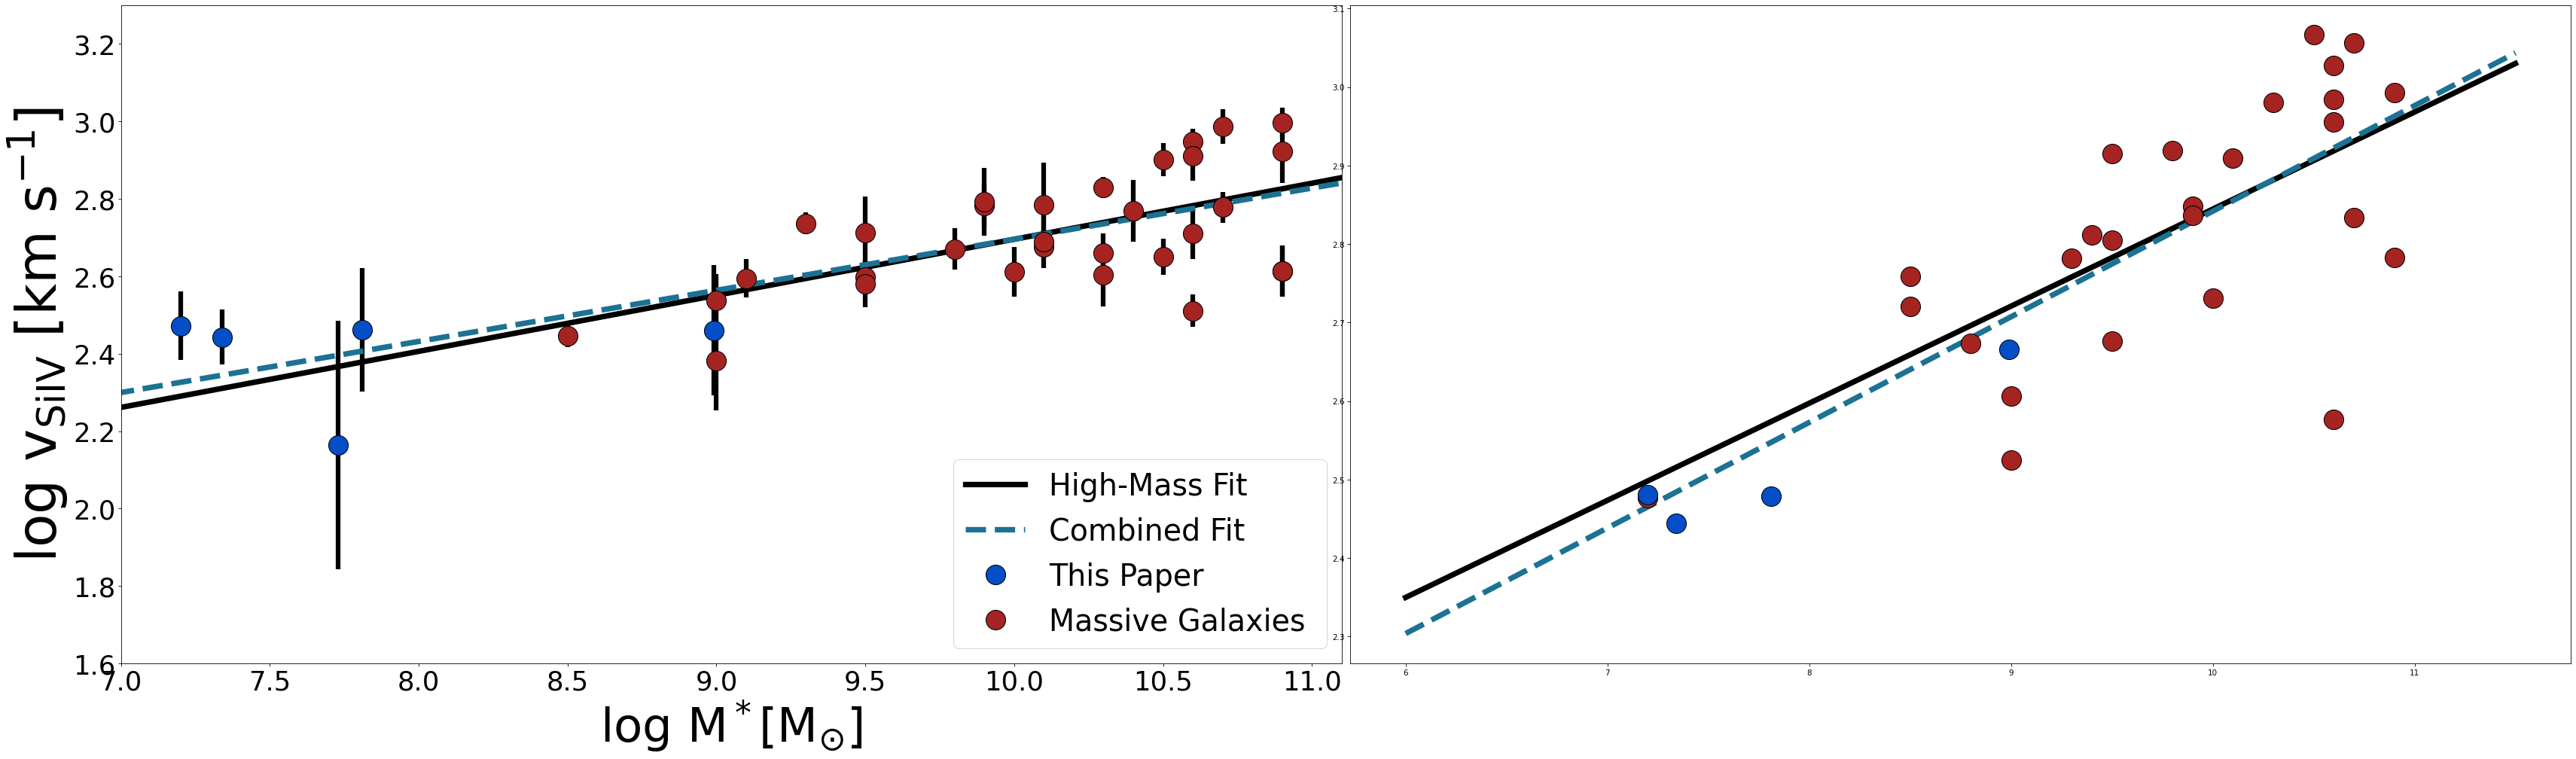

In [ ]:

yaxistitle = [r'log v$_{\rm Si IV}$ [km s$^{-1}$]',r'log v$_{\rm Si III}$ [km s$^{-1}$]',r'log v$_{\rm Si II}$ [km s$^{-1}$]',r'log v$_{\rm O I}$ [km s$^{-1}$]']
yaxistitle1 = [r'W$_{\rm Si IV}$ [$\AA$]',r'W$_{\rm Si III}$ [$\AA$]',r'W$_{\rm Si II}$ [$\AA$]',r' W$_{\rm O I}$ [$\AA$]']

#this is just for overleaf
yaxistitle2 = [' Si IV','Si III','Si II',' O I']


fig = plt.figure(figsize=(44,24))
#fig.suptitle('Mass vs V90', fontsize=46, y =1)
for i in range (4):
    z = i+1
    z1 = i-1
    ax=fig.add_subplot(2,2,z)
    mksize = 50

    if i==1:
        ydata = mydata_v90arr[i]
        xaxis = mydata_massarr
        errplot = mydata_v90err[i]
        ystart = ydata[:-1]
        xaxis = xaxis[:-1]
        errplot = errplot[:-1]
        addedmass = np.append(johndata_mass[i],mydata_massarr[:-1])
        addedvel = np.append( johndata_v90[i],mydata_v90arr[i][:-1])
    else :
        ystart = mydata_v90arr[i]
        xaxis = mydata_massarr
        errplot = mydata_v90err[i]
        addedmass = np.append(johndata_mass[i],mydata_massarr)
        addedvel = np.append( johndata_v90[i],mydata_v90arr[i])

    #fit to John's data
    a, b = np.polyfit(johndata_mass[i], johndata_v90[i], 1)
    #print (johndata_v90[i])
    #print (z23, y23)
    plotarray = np.arange(6.0,12.0,.5)
    #fit to both
    z23, y23 = np.polyfit(addedmass, addedvel, 1)
    CombinedSigma = testMassandV90[i][-1]
    OrigSigma = testMassandV90[i][-2]
    zshort = (format(CombinedSigma, ".3f"))
    ashort = (format(OrigSigma, ".3f"))

    #Instead of Zshort make some other variable that will show the fit for botht he OG value and the new one
    # this can be from trendgetter3 i think, just have it make the 5th value a zscore/sigma?



    OGfit = "High-Mass Fit"
    TPfit = "Combined Fit"

    #print ("slope",a*plotarray,"intercept:",b)
    ax.plot(plotarray, a*plotarray+b, label = OGfit, zorder = 2, color = replationline, linewidth = 7)
    ax.plot(plotarray, z23*plotarray+y23, label = TPfit,
             linestyle = 'dashed', color = secrelationline, linewidth = 7, zorder = 2)

    #Paste this under every ax.plot for the slope and intercept into overleaf%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    print (yaxistitle2[i],format(a,".3f"),"&",  format(b, ".3f"),"&",format(z23,".3f"),"&",format(y23,".3f"))
    #print ("New Slope:",format(a, ".3f"), "intercept:", format(b, ".3f"))


    #ax.plot(xaxis,ystart, '.', color=galclr, markersize =

    if i == 2:
        xaxis1 = [xaxis[0],xaxis[1],xaxis[-1]]
        yaxis1 = [ystart[0],ystart[1],ystart[-1]]
        xaxis2 = xaxis[2:4]
        yaxis2 =ystart[2:4]
        ax.plot(xaxis2,yaxis2, 's', color=myGalColor, markersize =  mksize-20, label = "Si II 1304"
            , markeredgecolor=('black'), zorder = 4)
        ax.plot(xaxis1,yaxis1, '.', color=myGalColor, markersize =  mksize, label = "This Paper"
            , markeredgecolor=('black'), zorder = 4)
    else:
        ax.plot(xaxis,ystart, '.', color= myGalColor, markersize =  mksize, label = "This Paper"
                , markeredgecolor=('black'), zorder = 4)
    ax.plot(johndata_mass[i], johndata_v90[i],  '.', markersize= mksize
         ,label = "Massive Galaxies ",color = JohnGalColor, markeredgecolor=('black'), zorder = 3)


    plt.errorbar(johndata_mass[i], johndata_v90[i],yerr=johndata_v90err[i], xerr=None,fmt=" " ,color= 'black', elinewidth=6, zorder = 1)
    plt.errorbar(xaxis,ystart,yerr=errplot, xerr=None,fmt=" " ,color= 'black', elinewidth=6, zorder = 1)
    ax.set_xlim([7.0,11.1])
    ax.set_ylim([1.6,3.3])
    plt.tight_layout()
    leg = ax.legend(prop={"size":38}, loc = 4)
    plt.yticks(fontsize=34)
    plt.xticks(fontsize=34)
    plt.ylabel(yaxistitle[i], fontsize= 70)
    plt.xlabel('log M$^*$[M$_{\odot}$]', fontsize= 60)


#plt.savefig("MassV90", dpi = 300)
plt.show()

In [ ]:
fig = plt.figure(figsize=(44,24))
#fig.suptitle('SFR vs V90', fontsize=46, y =1)
for i in range (4):
    z = i+1
    z1 = i-1
    ax=fig.add_subplot(2,2,z)
    mksize = 50
    if i==1:
        ydata = mydata_v90arr[i]
        xaxis = mydata_sfrarr
        errplot = mydata_v90err[i]
        ystart = ydata[:-1]
        xaxis = xaxis[:-1]
        errplot = errplot[:-1]
        addedsfr = np.append(johndata_sfr[i],mydata_sfrarr[:-1])
        addedvel = np.append( johndata_v90[i],mydata_v90arr[i][:-1])
    else :
        ystart = mydata_v90arr[i]
        xaxis = mydata_sfrarr
        errplot = mydata_v90err[i]
        addedsfr = np.append(johndata_sfr[i],mydata_sfrarr)
        addedvel = np.append( johndata_v90[i],mydata_v90arr[i])
    #ystart = mydata_v90arr[i]
    #xaxis = mydata_sfrarr
    #errplot = mydata_v90err[i]

    #fit to John's data
    a, b = np.polyfit(johndata_sfr[i], johndata_v90[i], 1)

    plotarray = np.arange(-1,5,.5)
    #fit to both
    z23, y23 = np.polyfit(addedsfr, addedvel, 1)
    CombinedSigma = testSFRandV90[i][-1]
    OrigSigma = testSFRandV90[i][-2]
    zshort = (format(CombinedSigma, ".3f"))
    ashort = (format(OrigSigma, ".3f"))

    OGfit = "Original \u03C3 = (" + str(ashort) + ")"
    TPfit = "Combined \u03C3 = (" + str(zshort)+ ")"
    if i == 2:
        xaxis1 = [xaxis[0],xaxis[1],xaxis[-1]]
        yaxis1 = [ystart[0],ystart[1],ystart[-1]]
        xaxis2 = xaxis[2:4]
        yaxis2 =ystart[2:4]
        ax.plot(xaxis2,yaxis2, 's', color=myGalColor, markersize =  mksize-20, label = "Si II 1304"
            , markeredgecolor=('black'), zorder = 4)
        ax.plot(xaxis1,yaxis1, '.', color=myGalColor, markersize =  mksize, label = "This Paper"
            , markeredgecolor=('black'), zorder = 4)
    else:
        ax.plot(xaxis,ystart, '.', color=myGalColor, markersize =  mksize, label = "This Paper"
                , markeredgecolor=('black'), zorder = 4)






    ax.plot(plotarray, a*plotarray+b, label = OGfit, zorder = 2, color =replationline, linewidth = 7)
    ax.plot(plotarray, z23*plotarray+y23, label = TPfit,
             linestyle = 'dashed', color = secrelationline, linewidth = 7, zorder = 2)
    #ax.plot(xaxis,ystart, '.', color='#e07a5f', markersize =  mksize, label = "This Paper", markeredgecolor=('black'))
    ax.plot(johndata_sfr[i], johndata_v90[i],  '.', markersize= mksize
         ,label = "Chisholm et al. 2016 ",color = JohnGalColor, markeredgecolor=('black'), zorder = 3)
    plt.errorbar(johndata_sfr[i], johndata_v90[i],yerr=johndata_v90err[i], xerr=None,fmt=" " ,color= 'black', elinewidth=3, zorder = 1)
    plt.errorbar(xaxis,ystart,yerr=errplot, xerr=None,fmt=" " ,color= 'black', elinewidth=3, zorder = 1)

    plt.tight_layout()
    leg = ax.legend(prop={"size":38}, loc = 4)
    plt.yticks(fontsize=34)
    plt.xticks(fontsize=34)
    ax.set_xlim([-1,2.5])
    ax.set_ylim([1.4,3.4])
    plt.ylabel(yaxistitle[i], fontsize= 55)
    plt.xlabel('log  SFR [M$_{\odot}$ yr$^{-1}}$]', fontsize= 50)

#plt.savefig("Test SFR5", dpi = 50)
plt.show()

In [ ]:
fig = plt.figure(figsize=(44,24))
#fig.suptitle('SFR vs EW', fontsize=46, y =1)
for i in range (4):
    z = i+1
    z1 = i-1
    ax=fig.add_subplot(2,2,z)
    mksize = 50
    if i==1:
        ydata = mydata_ewarr[i]
        xaxis = mydata_sfrarr
        errplot = mydata_ewerr[i]
        ystart = ydata[:-1]
        xaxis = xaxis[:-1]
        errplot = errplot[:-1]
        addedsfr = np.append(johndata_sfr[i],mydata_sfrarr[:-1])
        addedvel = np.append( johndata_EW[i],mydata_ewarr[i][:-1])
    else :
        ystart = mydata_ewarr[i]
        xaxis = mydata_sfrarr
        errplot = mydata_ewerr[i]
        addedsfr = np.append(johndata_sfr[i],mydata_sfrarr)
        addedvel = np.append( johndata_EW[i],mydata_ewarr[i])


    addedsfr = np.append(johndata_sfr[i],mydata_sfrarr)
    addedEW = np.append( johndata_EW[i],mydata_ewarr[i])
    #fit to John's data
    a, b = np.polyfit(johndata_sfr[i], johndata_EW[i], 1)
    plotarray = np.arange(-2,5,.5)
    #fit to both
    z23, y23 = np.polyfit(addedsfr, addedEW, 1)
    #print ("z23:", z23)
    CombinedSigma = testSFRandEW[i][-1]
    OrigSigma = testSFRandEW[i][-2]
    zshort = (format(CombinedSigma, ".3f"))
    ashort = (format(OrigSigma, ".3f"))

    OGfit = "Original \u03C3 = (" + str(ashort) + ")"
    TPfit = "Combined \u03C3 = (" + str(zshort)+ ")"
    #ax.plot(xaxis,ystart, '.', color=galclr, markersize =  mksize, label = "This Paper", markeredgecolor=('black'))
    if i == 2:
        xaxis1 = [xaxis[0],xaxis[1],xaxis[-1]]
        yaxis1 = [ystart[0],ystart[1],ystart[-1]]
        xaxis2 = xaxis[2:4]
        yaxis2 =ystart[2:4]
        ax.plot(xaxis2,yaxis2, 's', color=myGalColor, markersize =  mksize-20, label = "Si II 1304"
            , markeredgecolor=('black'), zorder = 4)
        ax.plot(xaxis1,yaxis1, '.', color=myGalColor, markersize =  mksize, label = "This Paper"
            , markeredgecolor=('black'), zorder = 4)
    else:
        ax.plot(xaxis,ystart, '.', color=myGalColor, markersize =  mksize, label = "This Paper"
                , markeredgecolor=('black'), zorder = 4)

    ax.plot(johndata_sfr[i], johndata_EW[i],  '.', markersize= mksize
         ,label = "Chisholm et al. 2016 ",color = JohnGalColor, markeredgecolor=('black'), zorder = 3)



    ax.plot(plotarray, a*plotarray+b, label = OGfit, zorder = 2, color = replationline, linewidth = 7)
    print (a,b)
    ax.plot(plotarray, z23*plotarray+y23, label =  TPfit , linestyle = (0, (5, 10)),
         linewidth = 9, color = secrelationline, zorder = 2)

    plt.errorbar(johndata_sfr[i], johndata_EW[i],yerr=johndata_EWerr[i], xerr=None,fmt=" " ,color= 'black', elinewidth=3, zorder = 1)
    plt.errorbar(xaxis,ystart,yerr=errplot, xerr=None,fmt=" " ,color= 'black', elinewidth=3, zorder = 1)

    plt.tight_layout()
    leg = ax.legend(prop={"size":38}, loc = 0)
    plt.yticks(fontsize=50)
    plt.xticks(fontsize=50)
    xlowbound = np.min(addedsfr)
    xhighbound = np.max(addedsfr)
    ax.set_xlim([xlowbound-.25,xhighbound+.25])
    #ax.set_ylim([0,3.4])
    plt.ylabel(yaxistitle1[i], fontsize= 55)
    plt.xlabel('log  SFR [M$_{\odot}$ yr$^{-1}}$]', fontsize= 50)
plt.tight_layout()

#plt.savefig("EW and SFR", dpi = 50)
plt.show()

In [ ]:
fig = plt.figure(figsize=(44,24))
#fig.suptitle('Mass vs EW', fontsize=46, y =1)
for i in range (4):
    z = i+1
    z1 = i-1
    ax=fig.add_subplot(2,2,z)
    mksize = 50
    ystart = mydata_ewarr[i]
    xaxis = mydata_massarr
    errplot = mydata_ewerr[i]
    addedmass = np.append(johndata_mass[i],mydata_massarr)
    addedEW = np.append( johndata_EW[i],mydata_ewarr[i])
    #fit to John's data
    a, b = np.polyfit(johndata_mass[i], johndata_EW[i], 1)

    plotarray = np.arange(7,12,.5)
    #fit to both
    z23, y23 = np.polyfit(addedmass, addedEW, 1)
    if i==1:
        ydata = mydata_ewarr[i]
        xaxis = mydata_massarr
        errplot = mydata_ewerr[i]
        ystart = ydata[:-1]
        xaxis = xaxis[:-1]
        errplot = errplot[:-1]
        addedsfr = np.append(johndata_mass[i],mydata_massarr[:-1])
        addedvel = np.append(johndata_EW[i],mydata_ewarr[i][:-1])
    else :
        ystart = mydata_ewarr[i]
        xaxis = mydata_massarr
        errplot = mydata_ewerr[i]
        addedsfr = np.append(johndata_sfr[i],mydata_sfrarr)
        addedvel = np.append( johndata_EW[i],mydata_ewarr[i])

    #ax.plot(xaxis,ystart, '.', color=galclr, markersize =  mksize, label = "This Paper", markeredgecolor=('black'))
    ax.plot(johndata_mass[i], johndata_EW[i],  '.', markersize= mksize
         ,label = "Massive Galaxies ",color = JohnGalColor, markeredgecolor=('black'), zorder = 3)
    if i == 2:
        xaxis1 = [xaxis[0],xaxis[1],xaxis[-1]]
        yaxis1 = [ystart[0],ystart[1],ystart[-1]]
        xaxis2 = xaxis[2:4]
        yaxis2 =ystart[2:4]
        ax.plot(xaxis2,yaxis2, 's', color=myGalColor, markersize =  mksize-25, label = "Si II 1304"
            , markeredgecolor=('black'), zorder = 4)
        ax.plot(xaxis1,yaxis1, '.', color=myGalColor, markersize =  mksize, label = "This Paper"
            , markeredgecolor=('black'), zorder = 4)

    else:
        ax.plot(xaxis,ystart, '.', color=myGalColor, markersize =  mksize, label = "This Paper"
                , markeredgecolor=('black'), zorder = 4)

    #print (addedvel)
    CombinedSigma = testMassandEW[i][-1]
    OrigSigma = testMassandEW[i][-2]
    zshort = (format(CombinedSigma, ".3f"))
    ashort = (format(OrigSigma, ".3f"))

    OGfit = "High-Mass Fit"
    TPfit = "Combined Fit"
    ax.plot(plotarray, a*plotarray+b, label = OGfit, zorder = 2, color = replationline, linewidth = 7)
    ax.plot(plotarray, z23*plotarray+y23, label = TPfit , linestyle = (0, (5, 10)),
         linewidth = 9, color = secrelationline, zorder = 2)



    print ("Slope chisholm 16:",format(10**a, ".1f"), "intercept:", format(b, ".3f"))
    #print ("Combined Slope:", z23, "intercept:", y23)

    plt.errorbar(johndata_mass[i], johndata_EW[i],yerr=johndata_EWerr[i], xerr=None,fmt=" " ,color= 'black', elinewidth=3, zorder = 2)
    plt.errorbar(xaxis,ystart,yerr=errplot, xerr=None,fmt=" " ,color= 'black', elinewidth=3, zorder = 3)

    plt.tight_layout()
    leg = ax.legend(prop={"size":38}, loc = 0)
    plt.yticks(fontsize=34)
    plt.xticks(fontsize=34)
    xlowbound = np.min(addedmass)
    xhighbound = np.max(addedmass)
    ax.set_xlim([xlowbound-.1,xhighbound+.1])
    #ax.set_xlim([6,13])
    #print (len(addedEW))

    plt.ylabel(yaxistitle1[i], fontsize= 55)
    plt.xlabel('log M$^*$[M$_{\odot}$]', fontsize= 50)
plt.tight_layout()

#plt.savefig("LastFig M EW", dpi = 300)
plt.show()




In [ ]:
#print (10**johndata_mass[3])
print (10**johndata_sfr[1])

#SFR/M 4 panel plots


-6.9897e-01
-7.4473e-01
-3.3724e-01
-4.2000e-01
-7.9588e-01
3.7239e-04 2.7126e+00
9.1517e-02 3.6396e+00


ValueError: ignored

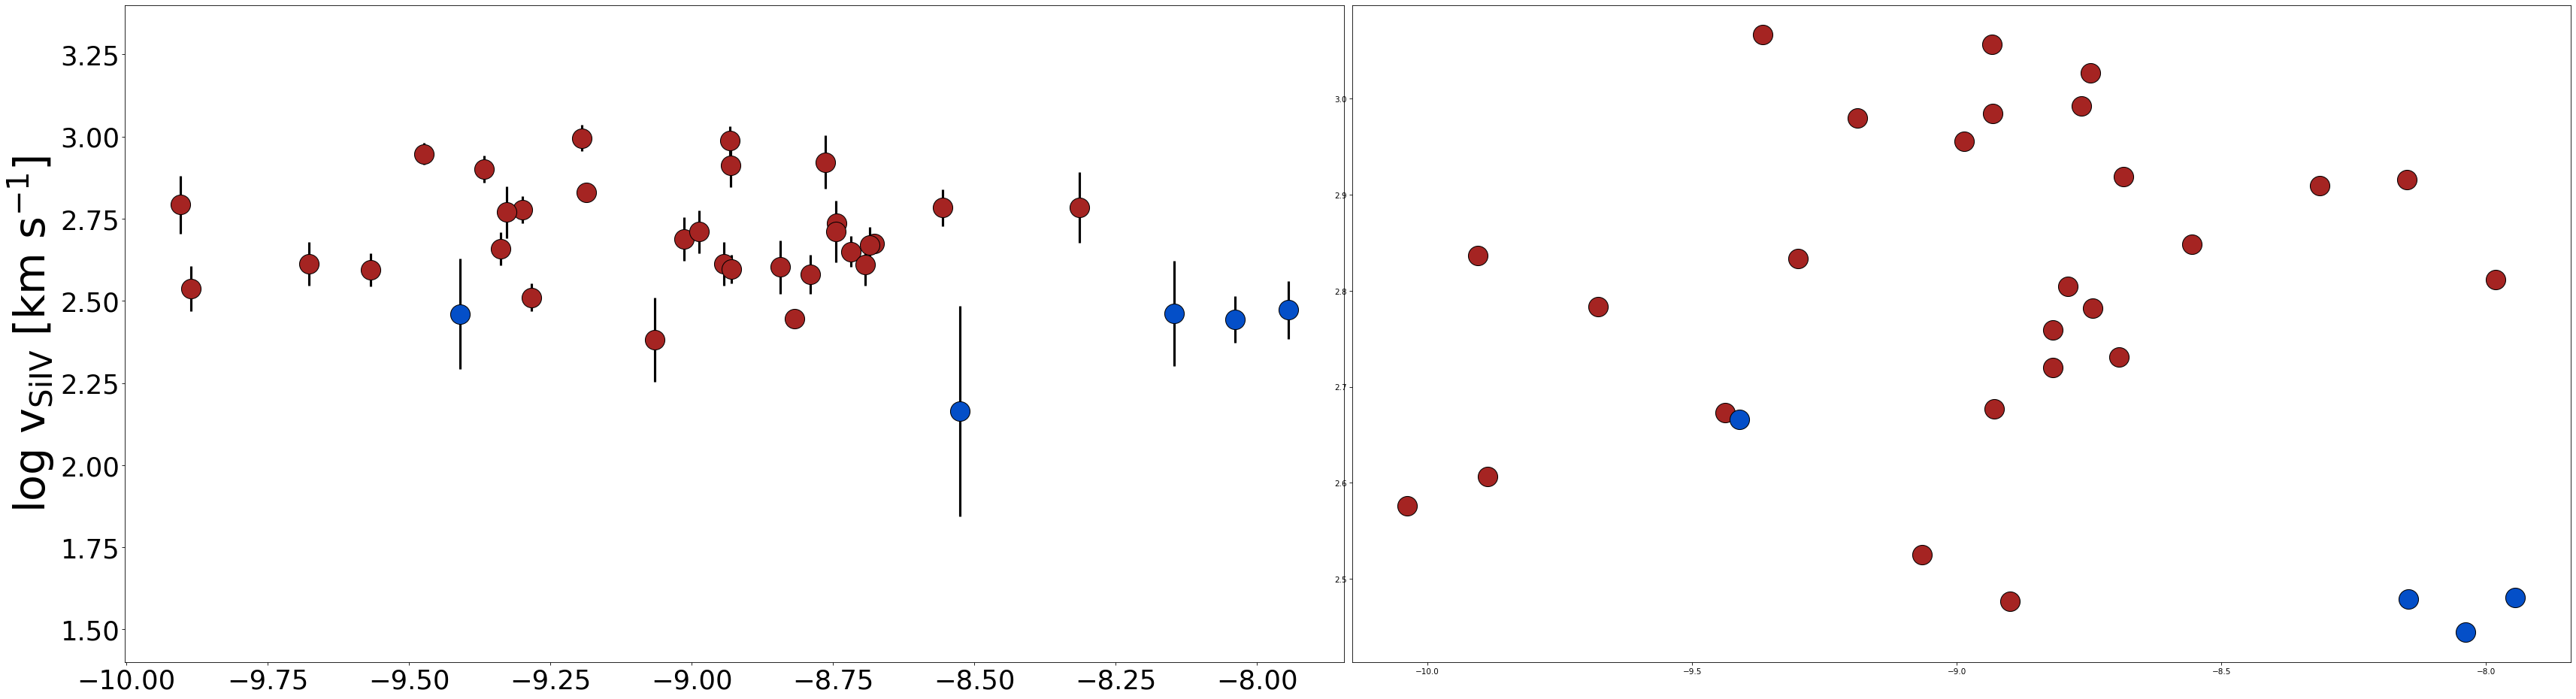

In [ ]:
fig = plt.figure(figsize=(44,24))
#fig.suptitle('SFR vs V90', fontsize=46, y =1)

   #     ydata = mydata_v90arr[i]
   #     xaxis = mydata_massarr
   #     errplot = mydata_v90err[i]
   #     ystart = ydata[:-1]
   #     xaxis = xaxis[:-1]
   #     errplot = errplot[:-1]
   #     addedmass = np.append(johndata_mass[i],mydata_massarr[:-1])
   #     addedvel = np.append( johndata_v90[i],mydata_v90arr[i][:-1])
SFRdivM = []
Linear_Mass =[]

for i in range (len (mydata_sfrarr_lin)):

  SFRLinTest = (mydata_sfrarr[i])
  #SFRLinTest2 = 10**SFRLinTest
  print (SFRLinTest)
  #print (mydata_sfrarr_lin[i])
  LinearMass =(10**mydata_massarr[i])
  Linear_Mass.append(LinearMass)
  #print (LinearMass)
  SFRdivM1 = np.log10(mydata_sfrarr_lin[i]/(10**mydata_massarr[i]))
  SFRdivM.append(SFRdivM1)
#print ()
#rint (SFRdivM)


for i in range (4):
    z = i+1
    z1 = i-1
    ax=fig.add_subplot(2,2,z)
    mksize = 50
    if i==1:
        ydata = mydata_v90arr[i]

        xaxis = SFRdivM
        errplot = mydata_v90err[i]
        ystart = ydata[:-1]
        xaxis = xaxis[:-1]
        errplot = errplot[:-1]

        addedsfr = np.append(10**johndata_sfr[i],mydata_sfrarr_lin[:-1])
        addedmass = np.append(10**johndata_mass[i],Linear_Mass[:-1])
        addedTot = addedsfr/addedmass
        addedvel = np.append( johndata_v90[i],mydata_v90arr[i][:-1])
    else :
        ystart = mydata_v90arr[i]

        xaxis =SFRdivM
        errplot = mydata_v90err[i]
        addedmass = np.append(10**johndata_mass[i],Linear_Mass)
        addedsfr = np.append(10**johndata_sfr[i],mydata_sfrarr_lin)
        addedTot = addedsfr/addedmass
        addedvel = np.append( johndata_v90[i],mydata_v90arr[i])

    #fit to John's data
    divjohn = np.log10(10**johndata_sfr[i]/10**johndata_mass[i])
    a, b = np.polyfit(divjohn, johndata_v90[i], 1)
    print (a,b)
    plotarray = np.arange(-1,5,.5)
    #fit to both
    z23, y23 = np.polyfit(addedTot, addedvel, 1)
    zshort = (format(z23, ".1f"))
    ashort = (format(a, ".1f"))
    OGfit = "Original fit (" + str(ashort) + ")"
    TPfit = "Combined Data Fit (" + str(zshort)+ ")"
    if i == 2:
        xaxis1 = [xaxis[0],xaxis[1],xaxis[-1]]
        yaxis1 = [ystart[0],ystart[1],ystart[-1]]
        xaxis2 = xaxis[2:4]
        yaxis2 =ystart[2:4]
        ax.plot((xaxis2),yaxis2, 's', color=myGalColor, markersize =  mksize-20, label = "Si 1334"
            , markeredgecolor=('black'), zorder = 4)
        ax.plot((xaxis1),yaxis1, '.', color=myGalColor, markersize =  mksize, label = "This Paper"
            , markeredgecolor=('black'), zorder = 4)
    else:
        ax.plot((xaxis),ystart, '.', color=myGalColor, markersize =  mksize, label = "This Paper"
                , markeredgecolor=('black'), zorder = 4)

    #ax.plot(plotarray, a*plotarray+b, label = OGfit, zorder = 2, color = myGalColor, linewidth = 7)
    #ax.plot(plotarray, z23*plotarray+y23, label = TPfit,
    #         linestyle = 'dashed', color =secrelationline, linewidth = 7, zorder = 2)
    #ax.plot(xaxis,ystart, '.', color='#e07a5f', markersize =  mksize, label = "This Paper", markeredgecolor=('black'))
    ax.plot((divjohn), johndata_v90[i],  '.', markersize= mksize
         ,label = "Chisholm et al. 2016 ",color = JohnGalColor, markeredgecolor=('black'), zorder = 3)
    plt.errorbar((divjohn), johndata_v90[i],yerr=johndata_v90err[i], xerr=None,fmt=" " ,color= 'black', elinewidth=3, zorder = 1)
    plt.errorbar((xaxis),ystart,yerr=errplot, xerr=None,fmt=" " ,color= 'black', elinewidth=3, zorder = 1)

    plt.tight_layout()
    #leg = ax.legend(prop={"size":38}, loc = 4)
    plt.yticks(fontsize=34)
    plt.xticks(fontsize=34)
    #ax.set_xlim([-.00000001,.00000001])
    ax.set_ylim([1.4,3.4])
    plt.ylabel(yaxistitle[i], fontsize= 55)
    #plt.xlabel(' SFR [M$_{\odot}$ yr$^{-1}}$]/M$^*$[M$_{\odot}$]', fontsize= 50)

#plt.savefig("Test SFR5", dpi = 120)
plt.show()

In [ ]:
fig = plt.figure(figsize=(16,9))
SFRdivM = []
Linear_Mass =[]

for i in range (len (mydata_sfrarr_lin)):
  LinearMass =(10**mydata_massarr[i])
  #print (LinearMass)
  Linear_Mass.append(LinearMass)
  #print (LinearMass)
  #print ("SFR",mydata_sfrarr_lin[i])
  SFRdivM1 = np.log10(mydata_sfrarr_lin[i]/(10**mydata_massarr[i]))
  SFRdivM.append(SFRdivM1)
#print ()
#print (SFRdivM)



print (10**(-.42))





In [ ]:
fig = plt.figure(figsize=(44,24))

for i in range (4):
    z = i+1
    z1 = i-1
    ax=fig.add_subplot(2,2,z)
    mksize = 50
    if i==1:
        ydata = mydata_ewarr[i]

        xaxis = SFRdivM
        errplot = mydata_ewerr[i]
        ystart = ydata[:-1]
        xaxis = xaxis[:-1]
        errplot = errplot[:-1]

        addedsfr = np.append(10**johndata_sfr[i],mydata_sfrarr_lin[:-1])
        addedmass = np.append(10**johndata_mass[i],Linear_Mass[:-1])
        addedTot = addedsfr/addedmass
        addedEW = np.append(johndata_EW[i],mydata_ewarr[i][:-1])
    else :
        ystart = mydata_ewarr[i]

        xaxis =SFRdivM
        errplot = mydata_ewerr[i]
        addedmass = np.append(10**johndata_mass[i],Linear_Mass)
        addedsfr = np.append(10**johndata_sfr[i],mydata_sfrarr_lin)
        addedTot = addedsfr/addedmass

        addedEW = np.append( johndata_EW[i],mydata_ewarr[i])
    #print (addedEW)
    #fit to John's data
    divjohn = np.log10(10**johndata_sfr[i]/10**johndata_mass[i])
    #print ((divjohn))
    a, b = np.polyfit(divjohn, johndata_EW[i], 1)
    plotarray = np.arange(-1,5,.5)


    #fit to both
    #print (len(addedEW))
    #print (addedEW)
    z23, y23 = np.polyfit(addedTot, addedEW, 1)
    zshort = (format(z23, ".3f"))
    ashort = (format(a, ".3f"))
    OGfit = "Original fit (" + str(ashort) + ")"
    TPfit = "Combined Data Fit (" + str(zshort)+ ")"
    if i == 2:
        xaxis1 = [xaxis[0],xaxis[1],xaxis[-1]]
        yaxis1 = [ystart[0],ystart[1],ystart[-1]]
        #print (ystart[0],ystart[1],ystart[-1])
        #print (yaxis1)
        xaxis2 = xaxis[2:4]
        yaxis2 =ystart[2:4]
        ax.plot(xaxis2,yaxis2, 's', color=myGalColor, markersize =  mksize-20, label = "Si 1334"
            , markeredgecolor=('black'), zorder = 4)
        ax.plot(xaxis1,yaxis1, '.', color=myGalColor, markersize =  mksize, label = "This Paper"
            , markeredgecolor=('black'), zorder = 4)
    else:
        ax.plot(xaxis,ystart, '.', color=myGalColor, markersize =  mksize, label = "This Paper"
                , markeredgecolor=('black'), zorder = 4)





   # ax.plot(plotarray, a*plotarray+b, label = OGfit, zorder = 2, color = secrelationline, linewidth = 7)
   # ax.plot(plotarray, z23*plotarray+y23, label = TPfit,
   #          linestyle = 'dashed', color = '#CD5C5C', linewidth = 7, zorder = 2)
    #ax.plot(xaxis,ystart, '.', color='#e07a5f', markersize =  mksize, label = "This Paper", markeredgecolor=('black'))
    ax.plot(divjohn, johndata_EW[i],  '.', markersize= mksize
         ,label = "Chisholm et al. 2016 ",color = JohnGalColor, markeredgecolor=('black'), zorder = 3)
    plt.errorbar(divjohn, johndata_EW[i],yerr=johndata_EWerr[i], xerr=None,fmt=" " ,color= 'black', elinewidth=3, zorder = 1)
    plt.errorbar(xaxis,ystart,yerr=errplot, xerr=None,fmt=" " ,color= 'black', elinewidth=3, zorder = 1)


    leg = ax.legend(prop={"size":38}, loc = 0)
    plt.yticks(fontsize=34)
    plt.xticks(fontsize=34)
    #ax.set_xlim([-1,1])
    #ax.set_ylim([0,3.4])
    plt.ylabel(yaxistitle1[i], fontsize= 55)
    plt.xlabel('log  SFR [M$_{\odot}$ yr$^{-1}}$]/M$^*$[M$_{\odot}$]', fontsize= 50)
plt.tight_layout()
#plt.savefig("Test SFR", dpi = 120)
plt.show()

# Archive/Old data that might be good to keep around


In [ ]:

#all go SiIV,SiIII,SiII,OI
#mydata_v90arr= ([2.46828328414056,2.559075581600843,2.4848442939584783,2.482653073570177,2.1446416887194983],
#[2.437305597128694,2.4897886084448566,2.468151671856164,2.697155866540623,0],
#[1.9491493152946835,2.5316750633023473,2.062237773481849,2.425306164636625,2.4113550785669013],
#[1.8280814688655809,2.450437197249682,2.2106705758334515,2.5077577591251754,2.1242202058021786])

#mydata_ewarr = ([1.062477299356093,1.0594243620424029,1.1751367050214085,1.2237955313390796, 1.830819407443409],
#[0.9357476456424124,0.8264665651510738,1.0473652979863888,1.584972799265881,0],
##[0.32848544364860904,0.6764915127318141,0.30502148721726235,0.24536073471316755,0.6539606957466794],
#[0.3548198768285488,0.6459328824177812,0.1329217439628512,0.48084461604676626,0.9175743653537995 ])


#mydata_v90err= ([0.03100382947243202,0.03122636455273096,0.05085807666982781,0.1772998243959951,0.31238573385297286],
#[0.02543447344625701,0.03870721395258282,0.05584074650489546,0.035108701868757,0],
#[ 0.18110708580454246,0.0626516567253306,0.016398176398884228,0.11359642482383615,0.07887904078940368],
#[0.2927791799234856,0.11822908367773582,0.15802927247032078,0.10827987930192734,0.2723084303653065])

#print (mydata_v90arr)
#mydata_ewerr = ([0.08537719455378218,0.10312647983900716,0.046915480067240244,0.1112612248018764,0.23122472924371645],
#[0.07933355115965729,0.10540262439067338,0.02015765298286995,0.09625722894201048,0],
#[0.10614202960387353,0.10098645319232878,0.05706418578632869,0.03853034720838537,0.10430580447639343],
#[0.1010527488799768,0.10240226148585654,0.05256123222982394,0.07504444171693184,0.14523040749921085])
#----------------------Loading in my data--------------------------
CG274_sfr = -0.69897
CG274_M0 = 7.34

CG274_v90_SiII = 1.9491493152946835
CG274_v90_SiIII = 2.437305597128694
CG274_v90_SiIV = 2.46828328414056
CG274_v90_OI = 1.8280814688655809

CG274_v90_SiIIerr = 0.18110708580454246
CG274_v90_SiIIIerr = 0.02543447344625701
CG274_v90_SiIVerr = 0.03100382947243202
CG274_v90_OIerr = 0.2927791799234856

CG274_EW_SiIV = 1.062477299356093
CG274_EW_OI = 0.3548198768285488
CG274_EW_SiII = 0.32848544364860904
CG274_EW_SiIII = 0.9357476456424124

CG274_EW_SiIVerr = 0.08537719455378218
CG274_EW_OIerr = 0.1010527488799768
CG274_EW_SiIIerr = 0.10614202960387353
CG274_EW_SiIIIerr = 0.07933355115965729

#######SBS data
USEOIIMC= 2.450437197249682
USE_SiIII_MC= 2.4897886084448566
USESIIVMC= 2.559075581600843
USE_SiII_MC= 2.5316750633023473
OIIMC= 0.11822908367773582
SiIIIMC= 0.03870721395258282
SiIIMC= 0.0626516567253306
SiIVMC= 0.03122636455273096
ew_results_OIerr= 0.10240226148585654
ew_results_siIIerr= 0.10098645319232878
ew_results_siIIIerr= 0.10540262439067338
ew_results_siIVerr= 0.10312647983900716
ew_results_OI= 0.6459328824177812
ew_results_siII= 0.6764915127318141
ew_results_siIII= 0.8264665651510738
ew_results_siIV= 1.0594243620424029
sbs0926_M0 = 7.2
sbs0926_sfr = np.log10(.18)
#print (sbs0926_sfr)
#####shocc 22 data
shoc22_M0 = 7.81
shoc22_sfr = np.log10(.46)
#shoc22_sfr


# Stats Bar Chart and Slope Analysis


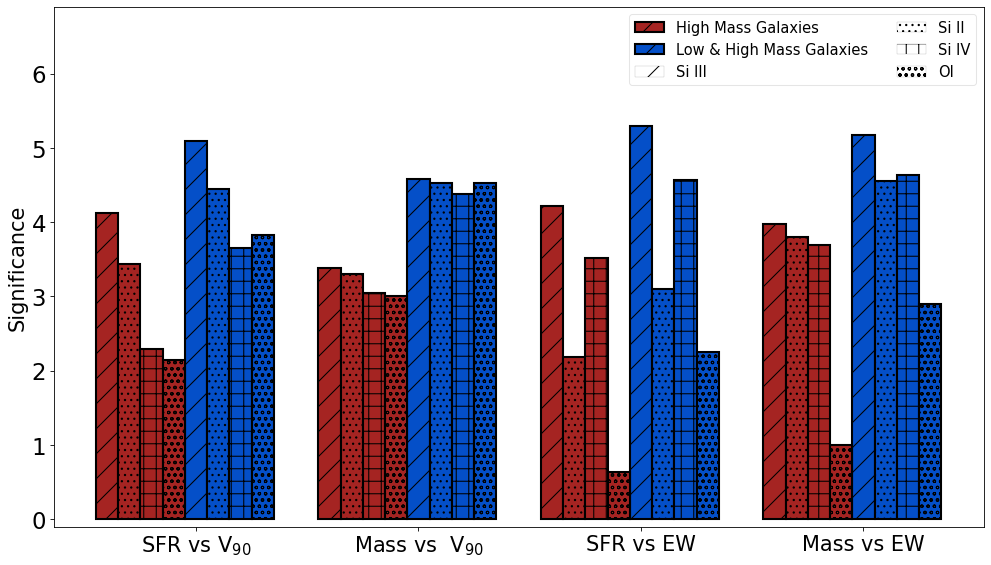

In [ ]:
# set width of bar
barWidth = 0.4
fig = plt.subplots(figsize =(16, 9))


# set height of bar

# Set position of bar on X axis
br1 = np.arange(len(Orig))
br2 = [x + barWidth/4 for x in br1]
br3 = [x + barWidth/4 for x in br2]
br4 = [x + barWidth/4 for x in br3]
br5 = [x + barWidth/4 for x in br4]
br6 = [x + barWidth/4 for x in br5]
br7 = [x + barWidth/4 for x in br6]
br8 = [x + barWidth/4 for x in br7]
# Make the plot
plt.bar(br1, Orig, color =JohnGalColor, width = barWidth/4, hatch='/',
        edgecolor ='k', label ='High Mass Galaxies', linewidth = 2,zorder = 2)
plt.bar(br2, Orig1, color =JohnGalColor, width = barWidth/4, hatch='..',zorder = 2,
        edgecolor ='k', linewidth = 2)
plt.bar(br3, Orig3, color =JohnGalColor, width = barWidth/4, hatch='+',zorder = 2,
        edgecolor ='k', linewidth = 2)
plt.bar(br4, Orig2, color =JohnGalColor, width = barWidth/4, hatch='oo',zorder = 2,
        edgecolor ='k', linewidth = 2)



plt.bar(br5, Combined, color =myGalColor, hatch='/', width = barWidth/4,
        edgecolor ='k', label ='Low & High Mass Galaxies', linewidth = 2)
plt.bar(br6, Combined1, color =myGalColor, width = barWidth/4, hatch='..',
        edgecolor ='k', linewidth = 2)
plt.bar(br7, Combined3, color =myGalColor, width = barWidth/4, hatch='+',
        edgecolor ='k', linewidth = 2)
plt.bar(br8, Combined2, color =myGalColor, width = barWidth/4, hatch='oo',
        edgecolor ='k', linewidth = 2)



#Here I am being very sneaky and feeding the axis labels
plt.bar(br1, Orig, color ='White', width = barWidth/4, hatch='/',
        edgecolor ='k' , linewidth = .1, zorder = 1, label ="Si III")
plt.bar(br2, Orig1, color ='White', width = barWidth/4, hatch='..', zorder = 1, label ="Si II",
        edgecolor ='k', linewidth = .1)
plt.bar(br3, Orig3, color ='White', width = barWidth/4, hatch='+', zorder = 1, label ="Si IV",
        edgecolor ='k', linewidth =.1 )
plt.bar(br4, Orig2, color ='White', width = barWidth/4, hatch='oo', zorder = 1, label ="OI",
        edgecolor ='k', linewidth = .1)

plt.ylim(-0.1,6.9)
r'log v$_{\rm Si IV}$ [km s$^{-1}$]'

# Adding Xticks
#plt.xlabel('Parameter', fontweight ='bold', fontsize = 15)
plt.ylabel('Significance', fontsize = 20)
plt.xticks([r + barWidth for r in range(len(Orig))],
        [r'SFR vs V$_{\rm 90}$',r'Mass vs  V$_{\rm 90}$',  'SFR vs EW', 'Mass vs EW'], fontsize = 20)
plt.yticks(fontsize=ticksz+4)
#plt.legend()


leg = plt.legend(prop={"size":legsize},fontsize = 18,ncol=2, framealpha=0.1, edgecolor="black")
#plt.legend(fancybox=True,fontsize = 18,ncol=2, framealpha=0.1, edgecolor="black")
#plt.savefig("Barplot", dpi = 200
plt.show()

In [ ]:
print (transorder[0])
print ((testSFRandV90[0][-2]))
print ((testMassandV90[0][-2]))
print ((testSFRandEW[0][-2]))
print ((testMassandEW[0][-2]))
print (transorder[1])

print ((testSFRandV90[1][-2]))
print ((testMassandV90[1][-2]))
print ((testSFRandEW[1][-2]))
print ((testMassandEW[1][-2]))
print (transorder[2])

print ((testSFRandV90[2][-2]))
print ((testMassandV90[2][-2]))
print ((testSFRandEW[2][-2]))
print ((testMassandEW[2][-2]))
print (transorder[3])
print ((testSFRandV90[3][-2]))
print ((testMassandV90[3][-2]))
print ((testSFRandEW[3][-2]))
print ((testMassandEW[3][-2]))



Si IV
2.2981e+00
3.0421e+00
3.5120e+00
3.6905e+00
Si III
4.1201e+00
3.3776e+00
4.2113e+00
3.9773e+00
Si II
3.4405e+00
3.3014e+00
2.1854e+00
3.7950e+00
OI
2.1490e+00
2.9995e+00
6.3529e-01
9.9985e-01


In [ ]:
print (transorder[0])
print ((testSFRandV90[0][-1]))
print ((testMassandV90[0][-1]))
print ((testSFRandEW[0][-1]))
print ((testMassandEW[0][-1]))
print (transorder[1])



print ((testSFRandV90[1][-1]))
print ((testMassandV90[1][-1]))
print ((testSFRandEW[1][-1]))
print ((testMassandEW[1][-1]))
print (transorder[2])

print ((testSFRandV90[2][-1]))
print ((testMassandV90[2][-1]))
print ((testSFRandEW[2][-1]))
print ((testMassandEW[2][-1]))
print (transorder[3])
print ((testSFRandV90[3][-1]))
print ((testMassandV90[3][-1]))
print ((testSFRandEW[3][-1]))
print ((testMassandEW[3][-1]))

Si IV
3.6536e+00
4.3736e+00
4.5729e+00
4.6296e+00
Si III
5.0895e+00
4.5782e+00
5.2982e+00
5.1727e+00
Si II
4.4492e+00
4.5271e+00
3.0951e+00
4.5495e+00
OI
3.8263e+00
4.5344e+00
2.2505e+00
2.9010e+00


In [ ]:
#\begin{table*}
#	\centering
#	\caption{the Equivelent Width of the various transitions}
#	\label{tab:Table 1}
#	\begin{tabular}{lccccr} % four columns, alignment for each
#		\hline
#		Galaxy Name & OI  &  Si II &  Si III  & Si IV &  C IV \\
#		\hline
#		CG 274 & 0.331 ± 0.099 & 0.473 ± 0.075 & 0.973 ± 0.121 & 0.947 ± 0.087 & 0.571 ± 0.097	\\
# 		SBS0926+606A &  0.331± 0.100 & 0.471 ± 0.0768 & 0.966 ± 0.121 & 0.949 ± 0.089 & 0.570 ± 0.0963	\\
# 		Shoc22 &  0.322 ± 0.057 & 0.257 ± 0.088 & 1.033 ± 0.039 & 0.976 ± 0.045 & 0.823 ± 0.046	\\
# 		ASK208606 & 0.488 ± 0.093 & 0.464 ± 0.056 & 1.126 ± 0.05 & 0.895 ± 0.082 & 0.93 ± 0.057 \\
# 		IC2779 &0.905 ± 0.144 & 1.486 ± 0.131 & 0.837 ± 0.03 & 1.24 ± 0.21 & 1.21 ± 0.137\\
#	NGC 6090 &1.285 ± 0.091 & 1.821 ± 0.033 & 2.325 ± 0.049 & 1.88 ± 0.066 & 2.861 ± 0.026\\
#		\hline
#	\end{tabular}
#\end{table*}



def print(*args):
    __builtins__.print(*("%.4e" % a if isinstance(a, float) else a
                         for a in args))
transorder = ["Si IV", "Si III", "Si II","OI"]

print ("Transtion & P Initial & P Combined & Sigma Initial & Sigma Combined")
print ("SFR and V90")
#print ("Transition,"&",P_Initial,"&",P_Combined,"&",SigmaInital,"&",SigmaComb")
testSFRandV90= TrendGetter4(johndata_sfr,johndata_v90,mydata_sfrarr,mydata_v90arr)

print ("Mass and V90")
#print (r"Transition,"&",P_Initial,"&",P_Combined,"&",SigmaInital,"&",SigmaComb")
testMassandV90 = TrendGetter4(johndata_mass,johndata_v90,mydata_massarr,mydata_v90arr)


print ("SFR and EW")
#print (r"Transition,"&",P_Initial,"&",P_Combined,"&",SigmaInital,"&",SigmaComb")
testSFRandEW = TrendGetter4(johndata_sfr,johndata_EW,mydata_sfrarr,mydata_ewarr)
print ("Mass and EW")

#print (r"Transition "&",P_Initial,"&",P_Combined,"&",SigmaInital,"&",SigmaComb")
testMassandEW = TrendGetter4(johndata_mass,johndata_EW,mydata_massarr,mydata_ewarr)


print (" ")
print ("Z score relationships")
print (" ")
print (" ")
print (" ")
print (r"Transition & Initial Z Score &  Combined Z Score ")


print ("SFR and V90")
testSFRandV90_5 = TrendGetter5(johndata_sfr,johndata_v90,mydata_sfrarr,mydata_v90arr)

print ("Mass and V90")
print (r"Transition & Initial Z Score &  Combined Z Score ")
testMassandV90_5 = TrendGetter5(johndata_mass,johndata_v90,mydata_massarr,mydata_v90arr)



print ("SFR and EW")
print (r"Transition & Initial Z Score &  Combined Z Score ")
testSFRandEW_5 = TrendGetter5(johndata_sfr,johndata_EW,mydata_sfrarr,mydata_ewarr)
print ("Mass and EW")

print (r"Transition & Initial Z Score &  Combined Z Score ")
testMassandEW_5 = TrendGetter5(johndata_mass,johndata_EW,mydata_massarr,mydata_ewarr)

Transtion & P Initial & P Combined & Sigma Initial & Sigma Combined
SFR and V90
Mass and V90
SFR and EW
Mass and EW
 
Z score relationships
 
 
 
Transition & Initial Z Score &  Combined Z Score 
SFR and V90
Si IV & -2.2981e+00 & -3.6536e+00
Si III & -4.1201e+00 & -5.0895e+00
Si II & -3.4405e+00 & -4.4492e+00
OI & -2.1490e+00 & -3.8263e+00
Mass and V90
Transition & Initial Z Score &  Combined Z Score 
Si IV & -3.0421e+00 & -4.3736e+00
Si III & -3.3776e+00 & -4.5782e+00
Si II & -3.3014e+00 & -4.5271e+00
OI & -2.9995e+00 & -4.5344e+00
SFR and EW
Transition & Initial Z Score &  Combined Z Score 
Si IV & -3.5120e+00 & -4.5729e+00
Si III & -4.2113e+00 & -5.2982e+00
Si II & -2.1854e+00 & -3.0951e+00
OI & -6.3529e-01 & -2.2505e+00
Mass and EW
Transition & Initial Z Score &  Combined Z Score 
Si IV & -3.6905e+00 & -4.6296e+00
Si III & -3.9773e+00 & -5.1727e+00
Si II & -3.7950e+00 & -4.5495e+00
OI & -9.9985e-01 & -2.9010e+00


# Just Slopes

In [ ]:
# Finally pulling the slope values

OverleafTransition = ("\ion{Si}{iv}","\ion{Si}{iii}","\ion{Si}{ii}","\ion{O}{i}")
def TrendGetter6(GalParam,OutflowParam,MyGalParam,MyOutParam):
  for i in range (len(transorder)):

          #From the 4 given arrays add the newly calculated values to the old data.
          #galparam is the host galaxy paramater while outflowparam is the outflow property (v90 or W) we are examining
          #the last factor is the division coefficient, it normalizes the sfr of M* the same as in chisholm 16
          high_mass_data = GalParam[i]

          addedGalParam = np.append(high_mass_data,MyGalParam)
          addedOutflowParam= np.append(OutflowParam[i],MyOutParam[i])

          #Below we generate fits that give us the original slope and original intercept from the high-mass sample then get the slope of the combined data.
          #Slopes

          #result = linregress(x, y)

          #origslope,origint, r1, p1, se1=linregress((high_mass_data), OutflowParam[i])
          #newslope,newint, r_comb, p_comb, se_comb = linregress((addedGalParam), addedOutflowParam)

          Chisholm16 = linregress((high_mass_data), OutflowParam[i])
          Combined23 = linregress((addedGalParam), addedOutflowParam)
          #print(Chisholm16.intercept, Chisholm16.intercept_stderr)




          deltaslope = Chisholm16.slope-Combined23.slope
          error_deltaslope =(np.sqrt(((Combined23.stderr**2))+((Chisholm16.stderr**2))))
          #here I do the error propogation to make sure everything works nicely (:




          #n = len(x)
          #x_bar = np.mean(x)
          #y_bar = np.mean(y)

          # Compute the slope and intercept of the linear regression
          #m, b = np.polyfit(x, y, 1)

          # Calculate the sum of the squared residuals
          #ss_res = np.sum((y - (m * x + b))**2)

          # Calculate the variance of the residuals
          #sigma_res2 = ss_res / (n - 2)

          # Calculate the variance of the slope
          #sigma_m2 = sigma_res2 / np.sum((x - x_bar)**2)

          # Calculate the error in the slope
          #m_err = np.sqrt(sigma_m2)



          print(OverleafTransition[i],"&",(format(Chisholm16.slope, ".3f")),u"\u00B1",(format(Chisholm16.stderr, ".3f")),"&",(format(Chisholm16.intercept, ".3f")),u"\u00B1", (format(Chisholm16.intercept_stderr, ".3f")),
                "&",(format(Combined23.slope, ".3f")),u"\u00B1",(format(Combined23.stderr, ".3f")),"&",(format(Combined23.intercept, ".3f")),u"\u00B1",(format(Combined23.intercept_stderr, ".3f")),
                "&", (format(deltaslope, ".3f")) ,u"\u00B1",(format(error_deltaslope,".3f")))
          #print (datacomb)





#testSFRandV90_6 = TrendGetter6(johndata_sfr,johndata_v90,mydata_sfrarr,mydata_v90arr)
#testMassandV90_6 = TrendGetter6(johndata_mass,johndata_v90,mydata_massarr,mydata_v90arr)
#testSFRandEW_6 = TrendGetter6(johndata_sfr,johndata_EW,mydata_sfrarr,mydata_ewarr)
#testMassandEW_6 = TrendGetter6(johndata_mass,johndata_EW,mydata_massarr,mydata_ewarr)
FullyNormalized_SFR = []
for i in range (len (johndata_sfr)):
  currentSFR = johndata_sfr[i]
  #print (johndata_sfr[i])
  normalizedSFR_John = currentSFR*.1
  np.append(FullyNormalized_SFR,normalizedSFR_John)







In [ ]:
#print ((10**johndata_sfr[0])/10)
#print ((10**johndata_sfr[1])/10)
#print ((10**johndata_sfr[2])/10)
#print ((10**johndata_sfr[3])/10)






mydata_sfrarr = np.array([-0.69897,-0.744727494896694,-0.3372421683184259,-.42,-.79588])
lowSFR_Norm = (((10**mydata_sfrarr)/10))
SFR_Norm_log = [np.log10((10**johndata_sfr[0])/10),np.log10((10**johndata_sfr[1])/10),np.log10((10**johndata_sfr[2])/10),np.log10((10**johndata_sfr[3])/10)]
lowSFR_Norm_log = (np.log10(lowSFR_Norm))

mydata_massarr = np.array([7.34,7.2,7.81,8.99,7.73])
##print (mydata_sfrarr)
#print (10**mydata_sfrarr)
#print (lowSFR_Norm)
#print (lowSFR_Norm_log)





Mass_Norm_log = [np.log10(((10**johndata_mass[0])/(10**10))),np.log10((10**johndata_mass[1])/(10**10)),np.log10((10**johndata_mass[2])/(10**10)),np.log10(((10**johndata_mass[3])/(10**10)))]
lowMass_Norm = (((10**mydata_massarr)/(10**10)))
lowMass_Norm_log = (np.log10(lowMass_Norm))
#print (10**mydata_massarr)
#print (mydata_massarr)

#print (lowMass_Norm)
#print (lowMass_Norm_log)
#print ("High Mass:", Mass_Norm_log)
#print ("Low Mass:", lowMass_Norm_log)
#So far, does not work
#print (NormV90)
NormEW = np.array([np.log10(johndata_EW[0]),np.log10(johndata_EW[1]),np.log10(johndata_EW[2]),np.log10(johndata_EW[3])])





#These ones Work
print ("SFR and V90")
testSFRandV90_6 = TrendGetter6(SFR_Norm_log,johndata_v90,lowSFR_Norm_log,mydata_v90arr)
print ("Mass and V90")
testMassandV90_6 = TrendGetter6(Mass_Norm_log,johndata_v90,lowMass_Norm_log,mydata_v90arr)

print ("SFR and EW")
testSFRandEW_6 = TrendGetter6(SFR_Norm_log,NormEW,lowSFR_Norm_log,mydata_ewarr)


print ("Mass and EW")
testMassandEW_6 = TrendGetter6(Mass_Norm_log,NormEW,lowMass_Norm_log,mydata_ewarr)




SFR and V90
\ion{Si}{iv} & 0.112 ± 0.033 & 2.704 ± 0.024 & 0.145 ± 0.025 & 2.693 ± 0.023 & -0.033 ± 0.041
\ion{Si}{iii} & 0.134 ± 0.021 & 2.845 ± 0.020 & 0.158 ± 0.019 & 2.834 ± 0.021 & -0.024 ± 0.028
\ion{Si}{ii} & 0.131 ± 0.024 & 2.730 ± 0.024 & 0.167 ± 0.025 & 2.711 ± 0.027 & -0.036 ± 0.035
\ion{O}{i} & 0.123 ± 0.043 & 2.674 ± 0.036 & 0.206 ± 0.038 & 2.646 ± 0.039 & -0.084 ± 0.057
Mass and V90
\ion{Si}{iv} & 0.145 ± 0.035 & 2.695 ± 0.023 & 0.132 ± 0.021 & 2.695 ± 0.022 & 0.013 ± 0.041
\ion{Si}{iii} & 0.124 ± 0.027 & 2.844 ± 0.024 & 0.139 ± 0.018 & 2.841 ± 0.022 & -0.015 ± 0.032
\ion{Si}{ii} & 0.135 ± 0.024 & 2.725 ± 0.024 & 0.160 ± 0.020 & 2.713 ± 0.025 & -0.026 ± 0.032
\ion{O}{i} & 0.187 ± 0.043 & 2.643 ± 0.030 & 0.201 ± 0.021 & 2.636 ± 0.026 & -0.014 ± 0.048
SFR and EW
\ion{Si}{iv} & 0.109 ± 0.025 & 0.165 ± 0.018 & -0.144 ± 0.055 & 0.256 ± 0.049 & 0.252 ± 0.060
\ion{Si}{iii} & 0.191 ± 0.026 & 0.332 ± 0.025 & 0.021 ± 0.058 & 0.410 ± 0.064 & 0.170 ± 0.064
\ion{Si}{ii} & 0.129 ± 0.03

<ipython-input-74-00329ebbe54f>:38: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  NormEW = np.array([np.log10(johndata_EW[0]),np.log10(johndata_EW[1]),np.log10(johndata_EW[2]),np.log10(johndata_EW[3])])


In [ ]:
#print ("SiIV logV90,   Mass")

for i in range (len(johndata_v90[0])):
  velocityZZ = johndata_v90[0]
  massZZ = Mass_Norm_log[0]

 ## print ((format(10**velocityZZ[i], ".3f")),(format(massZZ[i], ".3f") ))


# Overleaf Tables


In [ ]:
 (int(testO_I[0]), u"\u00B1",int(testO_I[1]),"&",
       int(testSi_II[0]), u"\u00B1",int(testSi_II[1]),"&",
       int(testSi_III[0]), u"\u00B1",int(testSi_III[1]),"&",
       int(testSi_IV[0]), u"\u00B1",int(testSi_IV[1]),"&",
       int(testCI[0]), u"\u00B1",int(testCI[1]))
 (int(testO_I[0]), u"\u00B1",int(testO_I[1]),"&",
       int(testSi_II[0]), u"\u00B1",int(testSi_II[1]),"&",
       int(testSi_III[0]), u"\u00B1",int(testSi_III[1]),"&",
       int(testSi_IV[0]), u"\u00B1",int(testSi_IV[1]),"&",
       int(testCI[0]), u"\u00B1",int(testCI[1]))
 (np.round(testO_I[4],decimals = 3), u"\u00B1",(np.round(testO_I[5],decimals = 3)),"&",
       (np.round(testSi_II[4],decimals = 3)), u"\u00B1",(np.round(testSi_II[5],decimals = 3)),"&",
       (np.round(testSi_III[4],decimals = 3)), u"\u00B1",(np.round(testSi_III[5],decimals = 3)),"&",
       (np.round(testSi_IV[4],decimals = 3)), u"\u00B1",(np.round(testSi_IV[5],decimals = 3)),"&",
       (np.round(testCI[4],decimals = 3)), u"\u00B1",(np.round(testCI[5],decimals = 3)))
 ("&", errorpropdiv(testSi_II[4],testO_I[4],testSi_II[5],testO_I[5]),
                         "&" ,errorpropdiv(testSi_IV[4],testO_I[4],testSi_IV[5],testO_I[5]),
                         "&",errorpropdiv(testSi_IV[4],testSi_II[4],testSi_IV[5],testSi_II[5]),
                         "&",errorpropdiv(testSi_IV[4],testSi_III[4],testSi_IV[5],testSi_III[5]))

AllGalV90 = [CG_OverV90,SBS_OverV90,Shoc22_OverV90,Ask208_OverV90,IC_OverV90, NGC6090_OverV90]
AllGalVCen = [CG_OverVcen,SBS_OverVcen,Shoc22_OverVcen,Ask208_OverVcen,IC_OverVcen, NGC6090_OverVcen]
AllGalEW = [CG_OverEW,SBS_OverEW,Shoc22_OverEW,Ask208_OverEW,IC_OverEW, NGC6090_OverEW]
AllGalEW_Ratios = [CG_EWratio,SBS0926_EWratio ,Shoc22_EWratio,Ask208_EWratio,IC_EWratio, NGC6090_EWratio]
GalName6 = ["CG274","SBS 0926", "Shoc22", "Ask208","IC2779", "NGC6090"]

print ("V90 Overleaf Table")
Tablemaker(GalName6,AllGalV90)
print ("")
print ("V-Cen Overleaf Table")
Tablemaker(GalName6,AllGalVCen)
print ("")
print ("EW Overleaf Table")
Tablemaker(GalName6,AllGalEW)
print ("")
print ("EW Ratios Overleaf Table")
Tablemaker(GalName6,AllGalEW_Ratios)

V90 Overleaf Table
CG274 & -114 ± 25 & -131 ± 26 & -278 ± 16 & -277 ± 19 & -298 ± 28
SBS 0926 & -160 ± 28 & -199 ± 32 & -302 ± 27 & -296 ± 26 & -240 ± 23
Shoc22 & -132 ± 30 & -133 ± 20 & -301 ± 27 & -289 ± 46 & -268 ± 29
Ask208 & -244 ± 128 & -190 ± 116 & -463 ± 32 & -288 ± 48 & -360 ± 35
IC2779 & -126 ± 30 & -269 ± 48 & -278 ± 16 & -146 ± 46 & -190 ± 53
NGC6090 & -397 ± 11 & -630 ± 53 & -712 ± 13 & -493 ± 27 & -647 ± 56

V-Cen Overleaf Table
CG274 & -114 ± 25 & -131 ± 26 & -278 ± 16 & -277 ± 19 & -298 ± 28
SBS 0926 & -160 ± 28 & -199 ± 32 & -302 ± 27 & -296 ± 26 & -240 ± 23
Shoc22 & -132 ± 30 & -133 ± 20 & -301 ± 27 & -289 ± 46 & -268 ± 29
Ask208 & -244 ± 128 & -190 ± 116 & -463 ± 32 & -288 ± 48 & -360 ± 35
IC2779 & -126 ± 30 & -269 ± 48 & -278 ± 16 & -146 ± 46 & -190 ± 53
NGC6090 & -397 ± 11 & -630 ± 53 & -712 ± 13 & -493 ± 27 & -647 ± 56

EW Overleaf Table
CG274 & 2.2400e-01 ± 4.9000e-02 & 2.6900e-01 ± 6.8000e-02 & 8.3600e-01 ± 2.9000e-02 & 8.6600e-01 ± 4.2000e-02 & 5.6900e-01 ± 3.8

In [ ]:
#Here we take the values of V-M* (etc.) and see how the slope & intercept changes by making an overleaf style table so that data can be loaded into the results section of the paper
#\ion{O}{i} &  1302 & 1193 &  1206 &1393  & 1334	\\
#\ion{Si}{ii}&  1302 & 1193 &  1206 &1393  & 1334	\\
#\ion{Si}{iii}&  1302 & 1304 &  1206 &1393  & 1334	\\
#\ion{Si}{iv}&  1302 & 1304 &  1206 &1393  & 1334	\\


slope = [1,2,3,4]
print ("Original slope values")

print ("\ion{O}{i}", u"\u00B1",slope[0])
print ("\ion{Si}{ii}", u"\u00B1",slope[1])
print ("\ion{Si}{iii}", u"\u00B1",slope[2])
print ("\ion{Si}{iv}", u"\u00B1",slope[3])

Original slope values
\ion{O}{i} ± 1
\ion{Si}{ii} ± 2
\ion{Si}{iii} ± 3
\ion{Si}{iv} ± 4


In [ ]:
#This will take the inital galaxy properties (SFR or Stellar Mass) and correlate them between two samples
#The outflow (both init and combined) paramater will be velocity, vcen, or EW Returns array with these paramaters





addedmass = np.append(johndata_mass[i],mydata_massarr[:-1])
addedvel = np.append( johndata_v90[i],mydata_v90arr[i][:-1])

addedmass1 = np.append(johndata_mass[1],mydata_massarr)
addedvel1 = np.append( johndata_v90[1],mydata_v90arr[1])

addedSFR4 = np.append(johndata_mass[3],mydata_massarr)
addedvel4 = np.append( johndata_v90[3],mydata_v90arr[3])

#print ((addedmass1))
#print ((addedvel1))
#print (type(johndata_sfr[1]))
#print (type(johndata_v90[1]))
#print (type(addedmass))
#print (type(addedvel))


#print (SFRV90Relations)